# Machine Learning Assignment
## Pattern Recognition for biometric devices

#### A project done and compiled by Smrithi(f20180071) and Rohit(f20180010)

###### First step is to import the packages.

In [1]:
import librosa 
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split 

import tensorflow.keras as keras

import tensorflow as tf
import matplotlib.pyplot as plt



In [9]:
dataset_path="speech_commands"
json_path="data.json"
Samples_to_consider=22050 # 1sec worth of sound (22050)

In [10]:
def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= Samples_to_consider:

                    # ensure consistency of the length of the signal
                    signal = signal[:Samples_to_consider]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)

                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    preprocess_dataset(dataset_path, json_path)


Processing: 'speech_commands\bed'
speech_commands\bed\00176480_nohash_0.wav: 0
speech_commands\bed\004ae714_nohash_0.wav: 0
speech_commands\bed\00f0204f_nohash_0.wav: 0
speech_commands\bed\00f0204f_nohash_1.wav: 0
speech_commands\bed\012c8314_nohash_0.wav: 0
speech_commands\bed\012c8314_nohash_1.wav: 0
speech_commands\bed\0132a06d_nohash_0.wav: 0
speech_commands\bed\0135f3f2_nohash_0.wav: 0
speech_commands\bed\0137b3f4_nohash_0.wav: 0
speech_commands\bed\01648c51_nohash_0.wav: 0
speech_commands\bed\01648c51_nohash_1.wav: 0
speech_commands\bed\016e2c6d_nohash_0.wav: 0
speech_commands\bed\01b4757a_nohash_0.wav: 0
speech_commands\bed\01bcfc0c_nohash_0.wav: 0
speech_commands\bed\026290a7_nohash_0.wav: 0
speech_commands\bed\02746d24_nohash_0.wav: 0
speech_commands\bed\035de8fe_nohash_0.wav: 0
speech_commands\bed\0362539c_nohash_0.wav: 0
speech_commands\bed\037c445a_nohash_0.wav: 0
speech_commands\bed\0397ecda_nohash_0.wav: 0
speech_commands\bed\03c96658_nohash_0.wav: 0
speech_commands\bed\

speech_commands\bed\460f2bad_nohash_0.wav: 0
speech_commands\bed\46114b4e_nohash_0.wav: 0
speech_commands\bed\46114b4e_nohash_1.wav: 0
speech_commands\bed\46114b4e_nohash_2.wav: 0
speech_commands\bed\4620dc14_nohash_0.wav: 0
speech_commands\bed\462e1919_nohash_0.wav: 0
speech_commands\bed\462e1919_nohash_1.wav: 0
speech_commands\bed\46a153d8_nohash_0.wav: 0
speech_commands\bed\471a0925_nohash_0.wav: 0
speech_commands\bed\479e64cc_nohash_0.wav: 0
speech_commands\bed\479e64cc_nohash_1.wav: 0
speech_commands\bed\47d01978_nohash_0.wav: 0
speech_commands\bed\4845bb10_nohash_0.wav: 0
speech_commands\bed\48463cbc_nohash_0.wav: 0
speech_commands\bed\48463cbc_nohash_1.wav: 0
speech_commands\bed\48463cbc_nohash_2.wav: 0
speech_commands\bed\48a9f771_nohash_0.wav: 0
speech_commands\bed\48a9f771_nohash_1.wav: 0
speech_commands\bed\48bdc11c_nohash_0.wav: 0
speech_commands\bed\48e8b82a_nohash_0.wav: 0
speech_commands\bed\493392c6_nohash_0.wav: 0
speech_commands\bed\493392c6_nohash_1.wav: 0
speech_com

speech_commands\bed\837f7378_nohash_0.wav: 0
speech_commands\bed\83c9e7e6_nohash_0.wav: 0
speech_commands\bed\83c9e7e6_nohash_1.wav: 0
speech_commands\bed\83c9e7e6_nohash_2.wav: 0
speech_commands\bed\83f9c4ab_nohash_0.wav: 0
speech_commands\bed\83f9c4ab_nohash_1.wav: 0
speech_commands\bed\840eab5a_nohash_0.wav: 0
speech_commands\bed\8442ea62_nohash_0.wav: 0
speech_commands\bed\8442ea62_nohash_1.wav: 0
speech_commands\bed\84bf12ff_nohash_0.wav: 0
speech_commands\bed\84d1e469_nohash_0.wav: 0
speech_commands\bed\84d1e469_nohash_1.wav: 0
speech_commands\bed\8523766b_nohash_0.wav: 0
speech_commands\bed\8523766b_nohash_1.wav: 0
speech_commands\bed\857366dd_nohash_0.wav: 0
speech_commands\bed\857366dd_nohash_1.wav: 0
speech_commands\bed\85b877b5_nohash_0.wav: 0
speech_commands\bed\863880b7_nohash_0.wav: 0
speech_commands\bed\86402da1_nohash_0.wav: 0
speech_commands\bed\86402da1_nohash_1.wav: 0
speech_commands\bed\86648261_nohash_0.wav: 0
speech_commands\bed\86648261_nohash_1.wav: 0
speech_com

speech_commands\bed\bf4af1af_nohash_1.wav: 0
speech_commands\bed\bf4af1af_nohash_2.wav: 0
speech_commands\bed\bf5d409d_nohash_0.wav: 0
speech_commands\bed\bf5d409d_nohash_1.wav: 0
speech_commands\bed\bf70feda_nohash_0.wav: 0
speech_commands\bed\bf90a57a_nohash_0.wav: 0
speech_commands\bed\bfa63751_nohash_0.wav: 0
speech_commands\bed\bfb10243_nohash_0.wav: 0
speech_commands\bed\c0445658_nohash_0.wav: 0
speech_commands\bed\c08585c1_nohash_0.wav: 0
speech_commands\bed\c08e5058_nohash_0.wav: 0
speech_commands\bed\c099668c_nohash_0.wav: 0
speech_commands\bed\c099668c_nohash_1.wav: 0
speech_commands\bed\c099668c_nohash_2.wav: 0
speech_commands\bed\c099668c_nohash_3.wav: 0
speech_commands\bed\c0c701f1_nohash_0.wav: 0
speech_commands\bed\c0c701f1_nohash_1.wav: 0
speech_commands\bed\c0e0f834_nohash_0.wav: 0
speech_commands\bed\c0e0f834_nohash_1.wav: 0
speech_commands\bed\c0e0f834_nohash_2.wav: 0
speech_commands\bed\c0f8f4df_nohash_0.wav: 0
speech_commands\bed\c0fb6812_nohash_0.wav: 0
speech_com

speech_commands\bed\f9f9751d_nohash_0.wav: 0
speech_commands\bed\fa446c16_nohash_2.wav: 0
speech_commands\bed\fa44fcf5_nohash_0.wav: 0
speech_commands\bed\fa7895de_nohash_0.wav: 0
speech_commands\bed\fac7deca_nohash_0.wav: 0
speech_commands\bed\fac7deca_nohash_1.wav: 0
speech_commands\bed\fad7a69a_nohash_0.wav: 0
speech_commands\bed\fafe8101_nohash_0.wav: 0
speech_commands\bed\fb01a182_nohash_0.wav: 0
speech_commands\bed\fb24c826_nohash_0.wav: 0
speech_commands\bed\fb2f3242_nohash_0.wav: 0
speech_commands\bed\fb7c9b3b_nohash_0.wav: 0
speech_commands\bed\fb7c9b3b_nohash_1.wav: 0
speech_commands\bed\fb7c9b3b_nohash_2.wav: 0
speech_commands\bed\fbf3dd31_nohash_0.wav: 0
speech_commands\bed\fbf3dd31_nohash_1.wav: 0
speech_commands\bed\fc94edb0_nohash_0.wav: 0
speech_commands\bed\fc94edb0_nohash_1.wav: 0
speech_commands\bed\fce65496_nohash_0.wav: 0
speech_commands\bed\fce96bac_nohash_0.wav: 0
speech_commands\bed\fd32732a_nohash_0.wav: 0
speech_commands\bed\fd395b74_nohash_0.wav: 0
speech_com

speech_commands\bird\3bfd30e6_nohash_0.wav: 1
speech_commands\bird\3c257192_nohash_0.wav: 1
speech_commands\bird\3c8836dc_nohash_0.wav: 1
speech_commands\bird\3ca784ec_nohash_0.wav: 1
speech_commands\bird\3ca784ec_nohash_1.wav: 1
speech_commands\bird\3d53244b_nohash_0.wav: 1
speech_commands\bird\3d6bee47_nohash_0.wav: 1
speech_commands\bird\3df9a3d4_nohash_0.wav: 1
speech_commands\bird\3e2ba5f7_nohash_0.wav: 1
speech_commands\bird\3e31dffe_nohash_0.wav: 1
speech_commands\bird\3e3b65eb_nohash_0.wav: 1
speech_commands\bird\3e549219_nohash_0.wav: 1
speech_commands\bird\3e549219_nohash_1.wav: 1
speech_commands\bird\3e7124ba_nohash_0.wav: 1
speech_commands\bird\3ec05c3d_nohash_0.wav: 1
speech_commands\bird\3efa7ec4_nohash_0.wav: 1
speech_commands\bird\3f2b358d_nohash_0.wav: 1
speech_commands\bird\3fb8c268_nohash_0.wav: 1
speech_commands\bird\3fb8c268_nohash_1.wav: 1
speech_commands\bird\3fb8c268_nohash_2.wav: 1
speech_commands\bird\3fdafe25_nohash_0.wav: 1
speech_commands\bird\40115b19_noha

speech_commands\bird\7846fd85_nohash_0.wav: 1
speech_commands\bird\78622c2b_nohash_0.wav: 1
speech_commands\bird\789e4ee7_nohash_0.wav: 1
speech_commands\bird\7910d292_nohash_0.wav: 1
speech_commands\bird\7910d292_nohash_1.wav: 1
speech_commands\bird\7910d292_nohash_2.wav: 1
speech_commands\bird\7910d292_nohash_3.wav: 1
speech_commands\bird\798f702a_nohash_0.wav: 1
speech_commands\bird\798f702a_nohash_1.wav: 1
speech_commands\bird\7a5530c9_nohash_0.wav: 1
speech_commands\bird\7ab5b8f7_nohash_0.wav: 1
speech_commands\bird\7b2e879e_nohash_0.wav: 1
speech_commands\bird\7b2e879e_nohash_1.wav: 1
speech_commands\bird\7bae88ed_nohash_0.wav: 1
speech_commands\bird\7bae88ed_nohash_1.wav: 1
speech_commands\bird\7bf801d1_nohash_0.wav: 1
speech_commands\bird\7c1d8533_nohash_0.wav: 1
speech_commands\bird\7c75a504_nohash_0.wav: 1
speech_commands\bird\7c9b43f0_nohash_0.wav: 1
speech_commands\bird\7ca023e2_nohash_0.wav: 1
speech_commands\bird\7cb5c0b7_nohash_0.wav: 1
speech_commands\bird\7cfb1618_noha

speech_commands\bird\b59fa113_nohash_0.wav: 1
speech_commands\bird\b59fe16d_nohash_0.wav: 1
speech_commands\bird\b6091c84_nohash_0.wav: 1
speech_commands\bird\b6091c84_nohash_1.wav: 1
speech_commands\bird\b63fea9e_nohash_0.wav: 1
speech_commands\bird\b65f6015_nohash_0.wav: 1
speech_commands\bird\b665723d_nohash_0.wav: 1
speech_commands\bird\b7016c27_nohash_0.wav: 1
speech_commands\bird\b7016c27_nohash_1.wav: 1
speech_commands\bird\b71ebf79_nohash_0.wav: 1
speech_commands\bird\b71ebf79_nohash_1.wav: 1
speech_commands\bird\b72e58c9_nohash_0.wav: 1
speech_commands\bird\b7669804_nohash_0.wav: 1
speech_commands\bird\b7a0754f_nohash_0.wav: 1
speech_commands\bird\b80d6c5e_nohash_0.wav: 1
speech_commands\bird\b83c1acf_nohash_0.wav: 1
speech_commands\bird\b843de62_nohash_0.wav: 1
speech_commands\bird\b843de62_nohash_1.wav: 1
speech_commands\bird\b84f83d2_nohash_0.wav: 1
speech_commands\bird\b84f83d2_nohash_1.wav: 1
speech_commands\bird\b87bdb22_nohash_0.wav: 1
speech_commands\bird\b8897f1c_noha

speech_commands\bird\ec545975_nohash_0.wav: 1
speech_commands\bird\ec545975_nohash_1.wav: 1
speech_commands\bird\ec545975_nohash_2.wav: 1
speech_commands\bird\ec545975_nohash_3.wav: 1
speech_commands\bird\ec5ab5d5_nohash_0.wav: 1
speech_commands\bird\ec7d1151_nohash_0.wav: 1
speech_commands\bird\ecbd8d66_nohash_0.wav: 1
speech_commands\bird\ece1a95a_nohash_0.wav: 1
speech_commands\bird\ecef25ba_nohash_0.wav: 1
speech_commands\bird\ed0720f1_nohash_0.wav: 1
speech_commands\bird\ed3c2d05_nohash_0.wav: 1
speech_commands\bird\edd8bfe3_nohash_0.wav: 1
speech_commands\bird\ee07dcb9_nohash_1.wav: 1
speech_commands\bird\ee483d85_nohash_0.wav: 1
speech_commands\bird\ee4a907f_nohash_0.wav: 1
speech_commands\bird\ee4a907f_nohash_1.wav: 1
speech_commands\bird\eee9b9e2_nohash_0.wav: 1
speech_commands\bird\eefd26f3_nohash_0.wav: 1
speech_commands\bird\eefd26f3_nohash_1.wav: 1
speech_commands\bird\ef2578c0_nohash_0.wav: 1
speech_commands\bird\ef2578c0_nohash_1.wav: 1
speech_commands\bird\efa16ffd_noha

speech_commands\cat\2aec99ec_nohash_0.wav: 2
speech_commands\cat\2b42e7a2_nohash_0.wav: 2
speech_commands\cat\2b715941_nohash_0.wav: 2
speech_commands\cat\2bdbe5f7_nohash_0.wav: 2
speech_commands\cat\2c6446f7_nohash_0.wav: 2
speech_commands\cat\2c6d3924_nohash_0.wav: 2
speech_commands\cat\2c7c33e8_nohash_0.wav: 2
speech_commands\cat\2c7c33e8_nohash_1.wav: 2
speech_commands\cat\2cec1d47_nohash_0.wav: 2
speech_commands\cat\2cec1d47_nohash_1.wav: 2
speech_commands\cat\2cec1d47_nohash_2.wav: 2
speech_commands\cat\2d056836_nohash_0.wav: 2
speech_commands\cat\2d82a556_nohash_0.wav: 2
speech_commands\cat\2d92f18b_nohash_0.wav: 2
speech_commands\cat\2da58b32_nohash_0.wav: 2
speech_commands\cat\2dcb6848_nohash_0.wav: 2
speech_commands\cat\2dce72b3_nohash_0.wav: 2
speech_commands\cat\2e0d80f7_nohash_0.wav: 2
speech_commands\cat\2e73212b_nohash_0.wav: 2
speech_commands\cat\2e73212b_nohash_1.wav: 2
speech_commands\cat\2f666bb2_nohash_0.wav: 2
speech_commands\cat\300384f0_nohash_0.wav: 2
speech_com

speech_commands\cat\6e2ef3d5_nohash_0.wav: 2
speech_commands\cat\6e2ef3d5_nohash_1.wav: 2
speech_commands\cat\6e2ef3d5_nohash_2.wav: 2
speech_commands\cat\6e2ef3d5_nohash_3.wav: 2
speech_commands\cat\6e41a77e_nohash_0.wav: 2
speech_commands\cat\6ef76186_nohash_0.wav: 2
speech_commands\cat\6f1ffef6_nohash_0.wav: 2
speech_commands\cat\6f2f57c1_nohash_0.wav: 2
speech_commands\cat\6f342826_nohash_0.wav: 2
speech_commands\cat\6f342826_nohash_1.wav: 2
speech_commands\cat\6f5eea74_nohash_0.wav: 2
speech_commands\cat\6f689791_nohash_0.wav: 2
speech_commands\cat\6f7724f5_nohash_0.wav: 2
speech_commands\cat\6f7724f5_nohash_1.wav: 2
speech_commands\cat\7081436f_nohash_0.wav: 2
speech_commands\cat\7081436f_nohash_1.wav: 2
speech_commands\cat\708a9569_nohash_0.wav: 2
speech_commands\cat\708b8d51_nohash_0.wav: 2
speech_commands\cat\7096522d_nohash_0.wav: 2
speech_commands\cat\7096522d_nohash_1.wav: 2
speech_commands\cat\7096522d_nohash_2.wav: 2
speech_commands\cat\70a00e98_nohash_0.wav: 2
speech_com

speech_commands\cat\a8f45bdc_nohash_3.wav: 2
speech_commands\cat\a902ce9b_nohash_0.wav: 2
speech_commands\cat\a97017df_nohash_0.wav: 2
speech_commands\cat\a9abc695_nohash_0.wav: 2
speech_commands\cat\a9abc695_nohash_1.wav: 2
speech_commands\cat\a9abc695_nohash_2.wav: 2
speech_commands\cat\aa233654_nohash_0.wav: 2
speech_commands\cat\aa233654_nohash_1.wav: 2
speech_commands\cat\aa48c94a_nohash_0.wav: 2
speech_commands\cat\aa62fdad_nohash_0.wav: 2
speech_commands\cat\aa62fdad_nohash_1.wav: 2
speech_commands\cat\aa62fdad_nohash_2.wav: 2
speech_commands\cat\aa753bb9_nohash_0.wav: 2
speech_commands\cat\aac5b7c1_nohash_0.wav: 2
speech_commands\cat\ab1299bb_nohash_0.wav: 2
speech_commands\cat\ab353673_nohash_0.wav: 2
speech_commands\cat\ab353673_nohash_1.wav: 2
speech_commands\cat\ab353673_nohash_2.wav: 2
speech_commands\cat\ab5ae445_nohash_0.wav: 2
speech_commands\cat\ab5ae445_nohash_1.wav: 2
speech_commands\cat\ab5b211a_nohash_0.wav: 2
speech_commands\cat\ab7b5acd_nohash_0.wav: 2
speech_com

speech_commands\cat\e14d3db8_nohash_0.wav: 2
speech_commands\cat\e14d3db8_nohash_1.wav: 2
speech_commands\cat\e14d3db8_nohash_2.wav: 2
speech_commands\cat\e2008f39_nohash_0.wav: 2
speech_commands\cat\e2008f39_nohash_1.wav: 2
speech_commands\cat\e20be42a_nohash_0.wav: 2
speech_commands\cat\e2286c18_nohash_0.wav: 2
speech_commands\cat\e2362167_nohash_0.wav: 2
speech_commands\cat\e269bac0_nohash_0.wav: 2
speech_commands\cat\e32ff49d_nohash_0.wav: 2
speech_commands\cat\e32ff49d_nohash_1.wav: 2
speech_commands\cat\e3411931_nohash_0.wav: 2
speech_commands\cat\e3411931_nohash_1.wav: 2
speech_commands\cat\e3e49931_nohash_0.wav: 2
speech_commands\cat\e41a903b_nohash_0.wav: 2
speech_commands\cat\e41e41f7_nohash_0.wav: 2
speech_commands\cat\e53139ad_nohash_0.wav: 2
speech_commands\cat\e54a0f16_nohash_0.wav: 2
speech_commands\cat\e57abea3_nohash_0.wav: 2
speech_commands\cat\e57abea3_nohash_1.wav: 2
speech_commands\cat\e5afa9b0_nohash_0.wav: 2
speech_commands\cat\e5afa9b0_nohash_1.wav: 2
speech_com

speech_commands\dog\1bb574f9_nohash_0.wav: 3
speech_commands\dog\1c1060b1_nohash_0.wav: 3
speech_commands\dog\1c3f4fac_nohash_0.wav: 3
speech_commands\dog\1c3f4fac_nohash_1.wav: 3
speech_commands\dog\1c3f4fac_nohash_2.wav: 3
speech_commands\dog\1c3f50ad_nohash_0.wav: 3
speech_commands\dog\1c3f50ad_nohash_1.wav: 3
speech_commands\dog\1c3f50ad_nohash_2.wav: 3
speech_commands\dog\1c45ceb2_nohash_0.wav: 3
speech_commands\dog\1cbcc7a7_nohash_0.wav: 3
speech_commands\dog\1cbcc7a7_nohash_1.wav: 3
speech_commands\dog\1cc80e39_nohash_0.wav: 3
speech_commands\dog\1cec8d71_nohash_0.wav: 3
speech_commands\dog\1d1fe0a0_nohash_0.wav: 3
speech_commands\dog\1d919a90_nohash_0.wav: 3
speech_commands\dog\1d919a90_nohash_1.wav: 3
speech_commands\dog\1daa5ada_nohash_0.wav: 3
speech_commands\dog\1e31353f_nohash_0.wav: 3
speech_commands\dog\1e412fac_nohash_0.wav: 3
speech_commands\dog\1ecfb537_nohash_0.wav: 3
speech_commands\dog\1ed557b9_nohash_0.wav: 3
speech_commands\dog\1ed557b9_nohash_1.wav: 3
speech_com

speech_commands\dog\5af0ca83_nohash_0.wav: 3
speech_commands\dog\5b09db89_nohash_0.wav: 3
speech_commands\dog\5b26c81b_nohash_0.wav: 3
speech_commands\dog\5ba724a7_nohash_0.wav: 3
speech_commands\dog\5be23def_nohash_0.wav: 3
speech_commands\dog\5c237956_nohash_0.wav: 3
speech_commands\dog\5c237956_nohash_1.wav: 3
speech_commands\dog\5c39594f_nohash_0.wav: 3
speech_commands\dog\5c8af87a_nohash_0.wav: 3
speech_commands\dog\5db0e146_nohash_0.wav: 3
speech_commands\dog\5e3dde6b_nohash_0.wav: 3
speech_commands\dog\5f47fdf9_nohash_0.wav: 3
speech_commands\dog\5f8e50a0_nohash_0.wav: 3
speech_commands\dog\5fadb538_nohash_0.wav: 3
speech_commands\dog\5fb88f4c_nohash_0.wav: 3
speech_commands\dog\5fc3ed24_nohash_0.wav: 3
speech_commands\dog\5ff3f9a1_nohash_0.wav: 3
speech_commands\dog\5ff3f9a1_nohash_2.wav: 3
speech_commands\dog\6021f08b_nohash_0.wav: 3
speech_commands\dog\605ed0ff_nohash_0.wav: 3
speech_commands\dog\6078eb0d_nohash_0.wav: 3
speech_commands\dog\6094340e_nohash_0.wav: 3
speech_com

speech_commands\dog\9beccfc8_nohash_0.wav: 3
speech_commands\dog\9beccfc8_nohash_1.wav: 3
speech_commands\dog\9cde5de8_nohash_0.wav: 3
speech_commands\dog\9ce7a419_nohash_0.wav: 3
speech_commands\dog\9ce7a419_nohash_1.wav: 3
speech_commands\dog\9d050657_nohash_0.wav: 3
speech_commands\dog\9d32f10a_nohash_0.wav: 3
speech_commands\dog\9d32f10a_nohash_1.wav: 3
speech_commands\dog\9d4bab4f_nohash_0.wav: 3
speech_commands\dog\9d4bab4f_nohash_1.wav: 3
speech_commands\dog\9db2bfe9_nohash_0.wav: 3
speech_commands\dog\9dcfba4b_nohash_0.wav: 3
speech_commands\dog\9e2ce5e3_nohash_0.wav: 3
speech_commands\dog\9e2ce5e3_nohash_1.wav: 3
speech_commands\dog\9e2ce5e3_nohash_2.wav: 3
speech_commands\dog\9e42ae25_nohash_0.wav: 3
speech_commands\dog\9e6bb505_nohash_0.wav: 3
speech_commands\dog\9f4098cb_nohash_0.wav: 3
speech_commands\dog\9f4098cb_nohash_1.wav: 3
speech_commands\dog\9f63152b_nohash_0.wav: 3
speech_commands\dog\9f6fbdb4_nohash_0.wav: 3
speech_commands\dog\9f7079fe_nohash_0.wav: 3
speech_com

speech_commands\dog\d6b155a5_nohash_1.wav: 3
speech_commands\dog\d71ad617_nohash_0.wav: 3
speech_commands\dog\d71ad617_nohash_1.wav: 3
speech_commands\dog\d71ad617_nohash_2.wav: 3
speech_commands\dog\d7467392_nohash_1.wav: 3
speech_commands\dog\d7529c0c_nohash_0.wav: 3
speech_commands\dog\d7a58714_nohash_0.wav: 3
speech_commands\dog\d7a58714_nohash_1.wav: 3
speech_commands\dog\d7a58714_nohash_2.wav: 3
speech_commands\dog\d7ca14ef_nohash_0.wav: 3
speech_commands\dog\d7ca14ef_nohash_1.wav: 3
speech_commands\dog\d84829e0_nohash_0.wav: 3
speech_commands\dog\d8521ea0_nohash_0.wav: 3
speech_commands\dog\d85270c1_nohash_0.wav: 3
speech_commands\dog\d874a786_nohash_0.wav: 3
speech_commands\dog\d874a786_nohash_1.wav: 3
speech_commands\dog\d8c314c0_nohash_0.wav: 3
speech_commands\dog\d8c314c0_nohash_1.wav: 3
speech_commands\dog\d8c52371_nohash_0.wav: 3
speech_commands\dog\d8ed3745_nohash_0.wav: 3
speech_commands\dog\d8ed3745_nohash_1.wav: 3
speech_commands\dog\d90b4138_nohash_0.wav: 3
speech_com

speech_commands\down\0ea0e2f4_nohash_0.wav: 4
speech_commands\down\0f250098_nohash_0.wav: 4
speech_commands\down\0f250098_nohash_1.wav: 4
speech_commands\down\0f3f64d5_nohash_0.wav: 4
speech_commands\down\0f3f64d5_nohash_1.wav: 4
speech_commands\down\0f3f64d5_nohash_2.wav: 4
speech_commands\down\0f7205ef_nohash_0.wav: 4
speech_commands\down\0f7205ef_nohash_1.wav: 4
speech_commands\down\0fa1e7a9_nohash_0.wav: 4
speech_commands\down\0ff728b5_nohash_0.wav: 4
speech_commands\down\0ff728b5_nohash_1.wav: 4
speech_commands\down\0ff728b5_nohash_2.wav: 4
speech_commands\down\0ff728b5_nohash_3.wav: 4
speech_commands\down\0ff728b5_nohash_4.wav: 4
speech_commands\down\102192fd_nohash_0.wav: 4
speech_commands\down\10467b06_nohash_0.wav: 4
speech_commands\down\105e72bb_nohash_0.wav: 4
speech_commands\down\105e72bb_nohash_1.wav: 4
speech_commands\down\10627519_nohash_0.wav: 4
speech_commands\down\106a6183_nohash_0.wav: 4
speech_commands\down\106a6183_nohash_1.wav: 4
speech_commands\down\106a6183_noha

speech_commands\down\37fc5d97_nohash_0.wav: 4
speech_commands\down\380abbad_nohash_0.wav: 4
speech_commands\down\380abbad_nohash_1.wav: 4
speech_commands\down\3847619e_nohash_0.wav: 4
speech_commands\down\3847619e_nohash_1.wav: 4
speech_commands\down\3852fca2_nohash_0.wav: 4
speech_commands\down\38c388bc_nohash_0.wav: 4
speech_commands\down\38c388bc_nohash_1.wav: 4
speech_commands\down\38d78313_nohash_0.wav: 4
speech_commands\down\38d78313_nohash_1.wav: 4
speech_commands\down\38d78313_nohash_2.wav: 4
speech_commands\down\38d78313_nohash_3.wav: 4
speech_commands\down\38d78313_nohash_4.wav: 4
speech_commands\down\3903b558_nohash_0.wav: 4
speech_commands\down\39543cfd_nohash_0.wav: 4
speech_commands\down\39543cfd_nohash_1.wav: 4
speech_commands\down\39a12648_nohash_0.wav: 4
speech_commands\down\39a12648_nohash_1.wav: 4
speech_commands\down\39a12648_nohash_2.wav: 4
speech_commands\down\39a12648_nohash_3.wav: 4
speech_commands\down\39a12648_nohash_4.wav: 4
speech_commands\down\39a45230_noha

speech_commands\down\6727b579_nohash_1.wav: 4
speech_commands\down\6727b579_nohash_2.wav: 4
speech_commands\down\6727b579_nohash_3.wav: 4
speech_commands\down\6727b579_nohash_4.wav: 4
speech_commands\down\6736bc64_nohash_0.wav: 4
speech_commands\down\6794a793_nohash_0.wav: 4
speech_commands\down\67961766_nohash_0.wav: 4
speech_commands\down\67c7fecb_nohash_0.wav: 4
speech_commands\down\67c7fecb_nohash_1.wav: 4
speech_commands\down\67fcdb05_nohash_0.wav: 4
speech_commands\down\6823565f_nohash_0.wav: 4
speech_commands\down\6846af18_nohash_0.wav: 4
speech_commands\down\686d030b_nohash_0.wav: 4
speech_commands\down\686d030b_nohash_1.wav: 4
speech_commands\down\686d030b_nohash_2.wav: 4
speech_commands\down\686d030b_nohash_3.wav: 4
speech_commands\down\686d030b_nohash_4.wav: 4
speech_commands\down\68c2a1bf_nohash_0.wav: 4
speech_commands\down\68dd409e_nohash_0.wav: 4
speech_commands\down\68effe85_nohash_0.wav: 4
speech_commands\down\692a88e6_nohash_0.wav: 4
speech_commands\down\692a88e6_noha

speech_commands\down\9190045a_nohash_0.wav: 4
speech_commands\down\924c1a04_nohash_0.wav: 4
speech_commands\down\924c1a04_nohash_1.wav: 4
speech_commands\down\92a9c5e6_nohash_0.wav: 4
speech_commands\down\92a9c5e6_nohash_1.wav: 4
speech_commands\down\92a9c5e6_nohash_2.wav: 4
speech_commands\down\92a9c5e6_nohash_3.wav: 4
speech_commands\down\92a9c5e6_nohash_4.wav: 4
speech_commands\down\92b0a735_nohash_0.wav: 4
speech_commands\down\92e17cc4_nohash_0.wav: 4
speech_commands\down\9385508d_nohash_0.wav: 4
speech_commands\down\94b5b397_nohash_0.wav: 4
speech_commands\down\94de6a6a_nohash_0.wav: 4
speech_commands\down\94de6a6a_nohash_1.wav: 4
speech_commands\down\94de6a6a_nohash_2.wav: 4
speech_commands\down\94de6a6a_nohash_3.wav: 4
speech_commands\down\94de6a6a_nohash_4.wav: 4
speech_commands\down\94e6864f_nohash_0.wav: 4
speech_commands\down\951cac20_nohash_0.wav: 4
speech_commands\down\95218ce8_nohash_0.wav: 4
speech_commands\down\95299b6c_nohash_0.wav: 4
speech_commands\down\953fe1ad_noha

speech_commands\down\b9cccd01_nohash_0.wav: 4
speech_commands\down\b9db6e42_nohash_0.wav: 4
speech_commands\down\b9f46737_nohash_0.wav: 4
speech_commands\down\b9f46737_nohash_1.wav: 4
speech_commands\down\b9f46737_nohash_2.wav: 4
speech_commands\down\b9f46737_nohash_3.wav: 4
speech_commands\down\b9f46737_nohash_4.wav: 4
speech_commands\down\ba676390_nohash_0.wav: 4
speech_commands\down\bab36420_nohash_0.wav: 4
speech_commands\down\bab36420_nohash_1.wav: 4
speech_commands\down\bab36420_nohash_2.wav: 4
speech_commands\down\bab36420_nohash_3.wav: 4
speech_commands\down\bab36420_nohash_4.wav: 4
speech_commands\down\baeac2ba_nohash_0.wav: 4
speech_commands\down\baf01c1f_nohash_0.wav: 4
speech_commands\down\bb31b82b_nohash_0.wav: 4
speech_commands\down\bbbf4fbd_nohash_0.wav: 4
speech_commands\down\bbd0bbd0_nohash_0.wav: 4
speech_commands\down\bbd0bbd0_nohash_1.wav: 4
speech_commands\down\bbd0bbd0_nohash_2.wav: 4
speech_commands\down\bbd0bbd0_nohash_3.wav: 4
speech_commands\down\bbd0bbd0_noha

speech_commands\down\dc2222d7_nohash_0.wav: 4
speech_commands\down\dc2222d7_nohash_1.wav: 4
speech_commands\down\dca2797e_nohash_0.wav: 4
speech_commands\down\dca2797e_nohash_1.wav: 4
speech_commands\down\dca2797e_nohash_2.wav: 4
speech_commands\down\dca2797e_nohash_3.wav: 4
speech_commands\down\dca2797e_nohash_4.wav: 4
speech_commands\down\dcc012ec_nohash_0.wav: 4
speech_commands\down\dce05676_nohash_0.wav: 4
speech_commands\down\dce5041a_nohash_0.wav: 4
speech_commands\down\de040337_nohash_0.wav: 4
speech_commands\down\de08912f_nohash_0.wav: 4
speech_commands\down\de4f7798_nohash_0.wav: 4
speech_commands\down\de4f7798_nohash_1.wav: 4
speech_commands\down\de6eb27c_nohash_0.wav: 4
speech_commands\down\de6eb27c_nohash_1.wav: 4
speech_commands\down\dea820ce_nohash_0.wav: 4
speech_commands\down\dea820ce_nohash_1.wav: 4
speech_commands\down\dea820ce_nohash_2.wav: 4
speech_commands\down\dea820ce_nohash_3.wav: 4
speech_commands\down\dea820ce_nohash_4.wav: 4
speech_commands\down\dec73123_noha

speech_commands\eight\08ab8082_nohash_0.wav: 5
speech_commands\eight\090efdc4_nohash_0.wav: 5
speech_commands\eight\096456f9_nohash_0.wav: 5
speech_commands\eight\099d52ad_nohash_0.wav: 5
speech_commands\eight\099d52ad_nohash_1.wav: 5
speech_commands\eight\099d52ad_nohash_2.wav: 5
speech_commands\eight\099d52ad_nohash_3.wav: 5
speech_commands\eight\099d52ad_nohash_4.wav: 5
speech_commands\eight\0ab3b47d_nohash_0.wav: 5
speech_commands\eight\0ab3b47d_nohash_1.wav: 5
speech_commands\eight\0b40aa8e_nohash_0.wav: 5
speech_commands\eight\0b77ee66_nohash_0.wav: 5
speech_commands\eight\0bde966a_nohash_0.wav: 5
speech_commands\eight\0bde966a_nohash_2.wav: 5
speech_commands\eight\0c40e715_nohash_0.wav: 5
speech_commands\eight\0d2bcf9d_nohash_0.wav: 5
speech_commands\eight\0d2bcf9d_nohash_1.wav: 5
speech_commands\eight\0d2bcf9d_nohash_2.wav: 5
speech_commands\eight\0d393936_nohash_0.wav: 5
speech_commands\eight\0d393936_nohash_1.wav: 5
speech_commands\eight\0e17f595_nohash_0.wav: 5
speech_comman

speech_commands\eight\37dca74f_nohash_1.wav: 5
speech_commands\eight\37dca74f_nohash_2.wav: 5
speech_commands\eight\37dca74f_nohash_3.wav: 5
speech_commands\eight\37dca74f_nohash_4.wav: 5
speech_commands\eight\37fc5d97_nohash_0.wav: 5
speech_commands\eight\3847619e_nohash_0.wav: 5
speech_commands\eight\3847619e_nohash_1.wav: 5
speech_commands\eight\3847619e_nohash_2.wav: 5
speech_commands\eight\3852fca2_nohash_0.wav: 5
speech_commands\eight\3852fca2_nohash_1.wav: 5
speech_commands\eight\38c388bc_nohash_0.wav: 5
speech_commands\eight\38d78313_nohash_0.wav: 5
speech_commands\eight\38d78313_nohash_1.wav: 5
speech_commands\eight\38d78313_nohash_2.wav: 5
speech_commands\eight\38d78313_nohash_3.wav: 5
speech_commands\eight\38d78313_nohash_4.wav: 5
speech_commands\eight\3903b558_nohash_0.wav: 5
speech_commands\eight\39543cfd_nohash_0.wav: 5
speech_commands\eight\39a12648_nohash_0.wav: 5
speech_commands\eight\39a12648_nohash_1.wav: 5
speech_commands\eight\39a12648_nohash_2.wav: 5
speech_comman

speech_commands\eight\651d108f_nohash_2.wav: 5
speech_commands\eight\656e8bb3_nohash_0.wav: 5
speech_commands\eight\656e8bb3_nohash_1.wav: 5
speech_commands\eight\65c73b55_nohash_0.wav: 5
speech_commands\eight\65d14087_nohash_0.wav: 5
speech_commands\eight\65d844fc_nohash_0.wav: 5
speech_commands\eight\65d844fc_nohash_1.wav: 5
speech_commands\eight\65ec06e5_nohash_0.wav: 5
speech_commands\eight\65f2531f_nohash_0.wav: 5
speech_commands\eight\66276b0e_nohash_0.wav: 5
speech_commands\eight\66774579_nohash_0.wav: 5
speech_commands\eight\66aa0f29_nohash_0.wav: 5
speech_commands\eight\66cbe2b3_nohash_0.wav: 5
speech_commands\eight\66cff190_nohash_0.wav: 5
speech_commands\eight\6727b579_nohash_0.wav: 5
speech_commands\eight\6727b579_nohash_1.wav: 5
speech_commands\eight\6727b579_nohash_2.wav: 5
speech_commands\eight\6727b579_nohash_3.wav: 5
speech_commands\eight\6727b579_nohash_4.wav: 5
speech_commands\eight\6794a793_nohash_0.wav: 5
speech_commands\eight\6794a793_nohash_1.wav: 5
speech_comman

speech_commands\eight\888a0c49_nohash_4.wav: 5
speech_commands\eight\88a487ce_nohash_0.wav: 5
speech_commands\eight\88f3719f_nohash_0.wav: 5
speech_commands\eight\88f8a99c_nohash_0.wav: 5
speech_commands\eight\8910e5ef_nohash_0.wav: 5
speech_commands\eight\8910e5ef_nohash_1.wav: 5
speech_commands\eight\8931f494_nohash_0.wav: 5
speech_commands\eight\8931f494_nohash_1.wav: 5
speech_commands\eight\89e59d18_nohash_0.wav: 5
speech_commands\eight\89e59d18_nohash_1.wav: 5
speech_commands\eight\89f3ab7d_nohash_0.wav: 5
speech_commands\eight\89f680f3_nohash_0.wav: 5
speech_commands\eight\8a0457c9_nohash_0.wav: 5
speech_commands\eight\8a325749_nohash_0.wav: 5
speech_commands\eight\8a744054_nohash_0.wav: 5
speech_commands\eight\8aa35b0c_nohash_0.wav: 5
speech_commands\eight\8aa35b0c_nohash_1.wav: 5
speech_commands\eight\8b39e36f_nohash_0.wav: 5
speech_commands\eight\8b39e36f_nohash_1.wav: 5
speech_commands\eight\8b775397_nohash_0.wav: 5
speech_commands\eight\8b775397_nohash_1.wav: 5
speech_comman

speech_commands\eight\b49caed3_nohash_2.wav: 5
speech_commands\eight\b49caed3_nohash_3.wav: 5
speech_commands\eight\b49caed3_nohash_4.wav: 5
speech_commands\eight\b4aa9fef_nohash_0.wav: 5
speech_commands\eight\b4aa9fef_nohash_1.wav: 5
speech_commands\eight\b4aa9fef_nohash_2.wav: 5
speech_commands\eight\b4aa9fef_nohash_3.wav: 5
speech_commands\eight\b4aa9fef_nohash_4.wav: 5
speech_commands\eight\b52bd596_nohash_0.wav: 5
speech_commands\eight\b544d4fd_nohash_0.wav: 5
speech_commands\eight\b5552931_nohash_0.wav: 5
speech_commands\eight\b5552931_nohash_1.wav: 5
speech_commands\eight\b5552931_nohash_2.wav: 5
speech_commands\eight\b5552931_nohash_3.wav: 5
speech_commands\eight\b5552931_nohash_4.wav: 5
speech_commands\eight\b575b5fb_nohash_0.wav: 5
speech_commands\eight\b575b5fb_nohash_1.wav: 5
speech_commands\eight\b59fa113_nohash_0.wav: 5
speech_commands\eight\b5aacf2c_nohash_0.wav: 5
speech_commands\eight\b5aacf2c_nohash_1.wav: 5
speech_commands\eight\b5d1e505_nohash_0.wav: 5
speech_comman

speech_commands\eight\d7ca14ef_nohash_0.wav: 5
speech_commands\eight\d7d733d2_nohash_0.wav: 5
speech_commands\eight\d85270c1_nohash_1.wav: 5
speech_commands\eight\d8c52371_nohash_0.wav: 5
speech_commands\eight\d8c52371_nohash_1.wav: 5
speech_commands\eight\d90b4138_nohash_0.wav: 5
speech_commands\eight\d90b4138_nohash_1.wav: 5
speech_commands\eight\d90b4138_nohash_2.wav: 5
speech_commands\eight\d90b4138_nohash_3.wav: 5
speech_commands\eight\d90b4138_nohash_4.wav: 5
speech_commands\eight\d926bb17_nohash_0.wav: 5
speech_commands\eight\d926bb17_nohash_1.wav: 5
speech_commands\eight\d98f6043_nohash_0.wav: 5
speech_commands\eight\d9ae8983_nohash_0.wav: 5
speech_commands\eight\d9b50b8b_nohash_0.wav: 5
speech_commands\eight\d9d6559e_nohash_0.wav: 5
speech_commands\eight\d9e9f554_nohash_0.wav: 5
speech_commands\eight\da15e796_nohash_0.wav: 5
speech_commands\eight\da2c5f1b_nohash_0.wav: 5
speech_commands\eight\da2c5f1b_nohash_1.wav: 5
speech_commands\eight\da4ef063_nohash_0.wav: 5
speech_comman

speech_commands\five\05d18852_nohash_0.wav: 6
speech_commands\five\05d18852_nohash_1.wav: 6
speech_commands\five\063d48cf_nohash_0.wav: 6
speech_commands\five\063d48cf_nohash_1.wav: 6
speech_commands\five\0685264e_nohash_0.wav: 6
speech_commands\five\070b49af_nohash_0.wav: 6
speech_commands\five\07363607_nohash_0.wav: 6
speech_commands\five\079d1020_nohash_0.wav: 6
speech_commands\five\07c5129e_nohash_0.wav: 6
speech_commands\five\07c5129e_nohash_1.wav: 6
speech_commands\five\08ab8082_nohash_0.wav: 6
speech_commands\five\08ab8082_nohash_1.wav: 6
speech_commands\five\093f65a1_nohash_0.wav: 6
speech_commands\five\093f65a1_nohash_1.wav: 6
speech_commands\five\099d52ad_nohash_0.wav: 6
speech_commands\five\099d52ad_nohash_1.wav: 6
speech_commands\five\099d52ad_nohash_2.wav: 6
speech_commands\five\099d52ad_nohash_3.wav: 6
speech_commands\five\099d52ad_nohash_4.wav: 6
speech_commands\five\09bcdc9d_nohash_0.wav: 6
speech_commands\five\0a9f9af7_nohash_1.wav: 6
speech_commands\five\0b40aa8e_noha

speech_commands\five\3402e488_nohash_0.wav: 6
speech_commands\five\3402e488_nohash_1.wav: 6
speech_commands\five\3402e488_nohash_2.wav: 6
speech_commands\five\3402e488_nohash_3.wav: 6
speech_commands\five\340c8b10_nohash_0.wav: 6
speech_commands\five\34805883_nohash_0.wav: 6
speech_commands\five\34881b10_nohash_0.wav: 6
speech_commands\five\34881b10_nohash_1.wav: 6
speech_commands\five\34881b10_nohash_2.wav: 6
speech_commands\five\34881b10_nohash_3.wav: 6
speech_commands\five\353b4d33_nohash_0.wav: 6
speech_commands\five\35c8fa78_nohash_0.wav: 6
speech_commands\five\35c8fa78_nohash_1.wav: 6
speech_commands\five\35c8fa78_nohash_2.wav: 6
speech_commands\five\35d1b6ee_nohash_0.wav: 6
speech_commands\five\35d1b6ee_nohash_1.wav: 6
speech_commands\five\35d1b6ee_nohash_2.wav: 6
speech_commands\five\35d1b6ee_nohash_3.wav: 6
speech_commands\five\35d1b6ee_nohash_4.wav: 6
speech_commands\five\36050ef3_nohash_0.wav: 6
speech_commands\five\36050ef3_nohash_1.wav: 6
speech_commands\five\36050ef3_noha

speech_commands\five\5fadb538_nohash_4.wav: 6
speech_commands\five\5fc3ed24_nohash_0.wav: 6
speech_commands\five\5ff3f9a1_nohash_0.wav: 6
speech_commands\five\60472d26_nohash_0.wav: 6
speech_commands\five\6071a214_nohash_0.wav: 6
speech_commands\five\6094340e_nohash_0.wav: 6
speech_commands\five\611d2b50_nohash_0.wav: 6
speech_commands\five\611d2b50_nohash_1.wav: 6
speech_commands\five\611d2b50_nohash_2.wav: 6
speech_commands\five\611d2b50_nohash_3.wav: 6
speech_commands\five\611d2b50_nohash_4.wav: 6
speech_commands\five\617de221_nohash_0.wav: 6
speech_commands\five\617de221_nohash_1.wav: 6
speech_commands\five\617de221_nohash_2.wav: 6
speech_commands\five\617de221_nohash_3.wav: 6
speech_commands\five\617de221_nohash_4.wav: 6
speech_commands\five\61a0d340_nohash_0.wav: 6
speech_commands\five\61a0d340_nohash_1.wav: 6
speech_commands\five\61a9f72a_nohash_0.wav: 6
speech_commands\five\61bcb275_nohash_0.wav: 6
speech_commands\five\61e50f62_nohash_0.wav: 6
speech_commands\five\61e50f62_noha

speech_commands\five\863880b7_nohash_0.wav: 6
speech_commands\five\86402da1_nohash_0.wav: 6
speech_commands\five\86648261_nohash_0.wav: 6
speech_commands\five\86648261_nohash_1.wav: 6
speech_commands\five\86b89661_nohash_0.wav: 6
speech_commands\five\86b89661_nohash_1.wav: 6
speech_commands\five\86b89661_nohash_2.wav: 6
speech_commands\five\86cb59b2_nohash_0.wav: 6
speech_commands\five\86f12ac0_nohash_0.wav: 6
speech_commands\five\86fa2dcd_nohash_0.wav: 6
speech_commands\five\87014d40_nohash_0.wav: 6
speech_commands\five\8781f4c1_nohash_0.wav: 6
speech_commands\five\8781f4c1_nohash_1.wav: 6
speech_commands\five\87c62767_nohash_1.wav: 6
speech_commands\five\88120683_nohash_0.wav: 6
speech_commands\five\881583a6_nohash_0.wav: 6
speech_commands\five\8830e17f_nohash_0.wav: 6
speech_commands\five\8830e17f_nohash_1.wav: 6
speech_commands\five\8830e17f_nohash_2.wav: 6
speech_commands\five\8830e17f_nohash_3.wav: 6
speech_commands\five\8830e17f_nohash_4.wav: 6
speech_commands\five\884ae8e1_noha

speech_commands\five\b11a05d2_nohash_1.wav: 6
speech_commands\five\b12bef84_nohash_0.wav: 6
speech_commands\five\b12bef84_nohash_1.wav: 6
speech_commands\five\b12bef84_nohash_2.wav: 6
speech_commands\five\b1426003_nohash_0.wav: 6
speech_commands\five\b15fc37d_nohash_0.wav: 6
speech_commands\five\b16f2d0d_nohash_0.wav: 6
speech_commands\five\b16f2d0d_nohash_1.wav: 6
speech_commands\five\b16f2d0d_nohash_2.wav: 6
speech_commands\five\b1f8326d_nohash_0.wav: 6
speech_commands\five\b26343e9_nohash_0.wav: 6
speech_commands\five\b2fbe484_nohash_0.wav: 6
speech_commands\five\b31ad508_nohash_0.wav: 6
speech_commands\five\b36c27c2_nohash_0.wav: 6
speech_commands\five\b3849d6e_nohash_0.wav: 6
speech_commands\five\b3849d6e_nohash_1.wav: 6
speech_commands\five\b3849d6e_nohash_2.wav: 6
speech_commands\five\b3849d6e_nohash_3.wav: 6
speech_commands\five\b3bb4dd6_nohash_0.wav: 6
speech_commands\five\b3bdded5_nohash_0.wav: 6
speech_commands\five\b41a92a3_nohash_0.wav: 6
speech_commands\five\b41a92a3_noha

speech_commands\five\d7ca14ef_nohash_1.wav: 6
speech_commands\five\d7d733d2_nohash_0.wav: 6
speech_commands\five\d84829e0_nohash_0.wav: 6
speech_commands\five\d8521ea0_nohash_0.wav: 6
speech_commands\five\d8521ea0_nohash_1.wav: 6
speech_commands\five\d85270c1_nohash_1.wav: 6
speech_commands\five\d874a786_nohash_1.wav: 6
speech_commands\five\d8c314c0_nohash_0.wav: 6
speech_commands\five\d8c52371_nohash_0.wav: 6
speech_commands\five\d8ed3745_nohash_0.wav: 6
speech_commands\five\d8ed3745_nohash_1.wav: 6
speech_commands\five\d8ee4734_nohash_0.wav: 6
speech_commands\five\d90b4138_nohash_0.wav: 6
speech_commands\five\d90b4138_nohash_1.wav: 6
speech_commands\five\d90b4138_nohash_2.wav: 6
speech_commands\five\d90b4138_nohash_3.wav: 6
speech_commands\five\d90b4138_nohash_4.wav: 6
speech_commands\five\d91a159e_nohash_0.wav: 6
speech_commands\five\d91a159e_nohash_1.wav: 6
speech_commands\five\d91a159e_nohash_2.wav: 6
speech_commands\five\d94eb94f_nohash_0.wav: 6
speech_commands\five\d98f6043_noha

speech_commands\four\0137b3f4_nohash_3.wav: 7
speech_commands\four\0137b3f4_nohash_4.wav: 7
speech_commands\four\019fa366_nohash_0.wav: 7
speech_commands\four\019fa366_nohash_1.wav: 7
speech_commands\four\01bb6a2a_nohash_0.wav: 7
speech_commands\four\01bb6a2a_nohash_1.wav: 7
speech_commands\four\01bb6a2a_nohash_2.wav: 7
speech_commands\four\01bb6a2a_nohash_3.wav: 7
speech_commands\four\01bb6a2a_nohash_4.wav: 7
speech_commands\four\01d22d03_nohash_0.wav: 7
speech_commands\four\01d22d03_nohash_1.wav: 7
speech_commands\four\023808be_nohash_0.wav: 7
speech_commands\four\023a61ad_nohash_0.wav: 7
speech_commands\four\026290a7_nohash_0.wav: 7
speech_commands\four\026290a7_nohash_1.wav: 7
speech_commands\four\02e85b60_nohash_0.wav: 7
speech_commands\four\02e85b60_nohash_1.wav: 7
speech_commands\four\02fcd241_nohash_0.wav: 7
speech_commands\four\030ec18b_nohash_0.wav: 7
speech_commands\four\035de8fe_nohash_0.wav: 7
speech_commands\four\03c96658_nohash_0.wav: 7
speech_commands\four\03c96658_noha

speech_commands\four\30f31e42_nohash_0.wav: 7
speech_commands\four\31270cb2_nohash_0.wav: 7
speech_commands\four\3143fdff_nohash_0.wav: 7
speech_commands\four\31d68957_nohash_0.wav: 7
speech_commands\four\31e686d2_nohash_0.wav: 7
speech_commands\four\324210dd_nohash_0.wav: 7
speech_commands\four\324210dd_nohash_1.wav: 7
speech_commands\four\324210dd_nohash_2.wav: 7
speech_commands\four\324210dd_nohash_3.wav: 7
speech_commands\four\324210dd_nohash_4.wav: 7
speech_commands\four\325a0c39_nohash_0.wav: 7
speech_commands\four\327289eb_nohash_0.wav: 7
speech_commands\four\329eab8a_nohash_0.wav: 7
speech_commands\four\33246bc2_nohash_0.wav: 7
speech_commands\four\333784b7_nohash_0.wav: 7
speech_commands\four\333784b7_nohash_1.wav: 7
speech_commands\four\333784b7_nohash_2.wav: 7
speech_commands\four\333784b7_nohash_3.wav: 7
speech_commands\four\333784b7_nohash_4.wav: 7
speech_commands\four\3367cff6_nohash_0.wav: 7
speech_commands\four\338dacf5_nohash_0.wav: 7
speech_commands\four\338dacf5_noha

speech_commands\four\5db0e146_nohash_0.wav: 7
speech_commands\four\5e033479_nohash_0.wav: 7
speech_commands\four\5e1b34a6_nohash_0.wav: 7
speech_commands\four\5e3b7a84_nohash_0.wav: 7
speech_commands\four\5e3b7a84_nohash_1.wav: 7
speech_commands\four\5e3dde6b_nohash_0.wav: 7
speech_commands\four\5e3dde6b_nohash_1.wav: 7
speech_commands\four\5e3dde6b_nohash_2.wav: 7
speech_commands\four\5e3dde6b_nohash_3.wav: 7
speech_commands\four\5e3dde6b_nohash_4.wav: 7
speech_commands\four\5efb758c_nohash_0.wav: 7
speech_commands\four\5efb758c_nohash_1.wav: 7
speech_commands\four\5f1b1051_nohash_0.wav: 7
speech_commands\four\5f47fdf9_nohash_0.wav: 7
speech_commands\four\5f814c23_nohash_0.wav: 7
speech_commands\four\5f8e50a0_nohash_0.wav: 7
speech_commands\four\5f8e50a0_nohash_1.wav: 7
speech_commands\four\5fadb538_nohash_0.wav: 7
speech_commands\four\5fadb538_nohash_1.wav: 7
speech_commands\four\5fadb538_nohash_2.wav: 7
speech_commands\four\5fadb538_nohash_3.wav: 7
speech_commands\four\5fadb538_noha

speech_commands\four\8281a2a8_nohash_0.wav: 7
speech_commands\four\8281a2a8_nohash_1.wav: 7
speech_commands\four\8281a2a8_nohash_2.wav: 7
speech_commands\four\8281a2a8_nohash_3.wav: 7
speech_commands\four\8281a2a8_nohash_4.wav: 7
speech_commands\four\82e7204d_nohash_0.wav: 7
speech_commands\four\8335f893_nohash_0.wav: 7
speech_commands\four\833a0279_nohash_0.wav: 7
speech_commands\four\834f03fe_nohash_0.wav: 7
speech_commands\four\834f03fe_nohash_1.wav: 7
speech_commands\four\834f03fe_nohash_2.wav: 7
speech_commands\four\834f03fe_nohash_3.wav: 7
speech_commands\four\834f03fe_nohash_4.wav: 7
speech_commands\four\83c9e7e6_nohash_0.wav: 7
speech_commands\four\83f9c4ab_nohash_0.wav: 7
speech_commands\four\840c366d_nohash_0.wav: 7
speech_commands\four\8442ea62_nohash_0.wav: 7
speech_commands\four\8442ea62_nohash_1.wav: 7
speech_commands\four\8494fba8_nohash_0.wav: 7
speech_commands\four\84bf12ff_nohash_0.wav: 7
speech_commands\four\84bf12ff_nohash_1.wav: 7
speech_commands\four\84bf12ff_noha

speech_commands\four\adec6a94_nohash_0.wav: 7
speech_commands\four\ae927455_nohash_0.wav: 7
speech_commands\four\ae927455_nohash_1.wav: 7
speech_commands\four\aeb99b1c_nohash_0.wav: 7
speech_commands\four\aef8dcf5_nohash_0.wav: 7
speech_commands\four\aef8dcf5_nohash_1.wav: 7
speech_commands\four\af130f12_nohash_0.wav: 7
speech_commands\four\af130f12_nohash_1.wav: 7
speech_commands\four\af130f12_nohash_2.wav: 7
speech_commands\four\af30314d_nohash_0.wav: 7
speech_commands\four\af7a8296_nohash_0.wav: 7
speech_commands\four\af7a8296_nohash_1.wav: 7
speech_commands\four\af8b2f2c_nohash_0.wav: 7
speech_commands\four\af8b2f2c_nohash_1.wav: 7
speech_commands\four\afabfa0e_nohash_0.wav: 7
speech_commands\four\afb9e62e_nohash_0.wav: 7
speech_commands\four\afd53389_nohash_0.wav: 7
speech_commands\four\aff582a1_nohash_0.wav: 7
speech_commands\four\aff582a1_nohash_1.wav: 7
speech_commands\four\aff582a1_nohash_2.wav: 7
speech_commands\four\aff582a1_nohash_3.wav: 7
speech_commands\four\aff582a1_noha

speech_commands\four\d0faf7e4_nohash_2.wav: 7
speech_commands\four\d0faf7e4_nohash_3.wav: 7
speech_commands\four\d0faf7e4_nohash_4.wav: 7
speech_commands\four\d107dc42_nohash_0.wav: 7
speech_commands\four\d1214f15_nohash_0.wav: 7
speech_commands\four\d1214f15_nohash_1.wav: 7
speech_commands\four\d1453a87_nohash_0.wav: 7
speech_commands\four\d197e3ae_nohash_0.wav: 7
speech_commands\four\d197e3ae_nohash_1.wav: 7
speech_commands\four\d197e3ae_nohash_2.wav: 7
speech_commands\four\d197e3ae_nohash_3.wav: 7
speech_commands\four\d197e3ae_nohash_4.wav: 7
speech_commands\four\d1a17cbe_nohash_0.wav: 7
speech_commands\four\d33df435_nohash_0.wav: 7
speech_commands\four\d37e4bf1_nohash_0.wav: 7
speech_commands\four\d3a18257_nohash_0.wav: 7
speech_commands\four\d3a18257_nohash_1.wav: 7
speech_commands\four\d3badc9a_nohash_0.wav: 7
speech_commands\four\d4082f3e_nohash_0.wav: 7
speech_commands\four\d4082f3e_nohash_1.wav: 7
speech_commands\four\d486fb84_nohash_0.wav: 7
speech_commands\four\d486fb84_noha

speech_commands\four\ff21fb59_nohash_1.wav: 7
speech_commands\four\ffa76c4a_nohash_0.wav: 7
speech_commands\four\ffb86d3c_nohash_0.wav: 7
speech_commands\four\ffb86d3c_nohash_1.wav: 7
speech_commands\four\ffbb695d_nohash_0.wav: 7
speech_commands\four\ffd2ba2f_nohash_0.wav: 7
speech_commands\four\ffd2ba2f_nohash_1.wav: 7
speech_commands\four\ffd2ba2f_nohash_2.wav: 7
speech_commands\four\ffd2ba2f_nohash_3.wav: 7
speech_commands\four\ffd2ba2f_nohash_4.wav: 7
speech_commands\four\fffcabd1_nohash_0.wav: 7

Processing: 'speech_commands\go'
speech_commands\go\00b01445_nohash_0.wav: 8
speech_commands\go\00f0204f_nohash_0.wav: 8
speech_commands\go\00f0204f_nohash_1.wav: 8
speech_commands\go\012c8314_nohash_0.wav: 8
speech_commands\go\012c8314_nohash_1.wav: 8
speech_commands\go\012c8314_nohash_2.wav: 8
speech_commands\go\0132a06d_nohash_0.wav: 8
speech_commands\go\0132a06d_nohash_1.wav: 8
speech_commands\go\0132a06d_nohash_2.wav: 8
speech_commands\go\0132a06d_nohash_3.wav: 8
speech_commands\go\0

speech_commands\go\30a09789_nohash_0.wav: 8
speech_commands\go\30f31e42_nohash_1.wav: 8
speech_commands\go\31270cb2_nohash_0.wav: 8
speech_commands\go\31270cb2_nohash_1.wav: 8
speech_commands\go\3143fdff_nohash_0.wav: 8
speech_commands\go\31583d30_nohash_0.wav: 8
speech_commands\go\31583d30_nohash_1.wav: 8
speech_commands\go\31e686d2_nohash_0.wav: 8
speech_commands\go\31e686d2_nohash_1.wav: 8
speech_commands\go\3209ec42_nohash_0.wav: 8
speech_commands\go\3209ec42_nohash_1.wav: 8
speech_commands\go\3209ec42_nohash_2.wav: 8
speech_commands\go\324210dd_nohash_0.wav: 8
speech_commands\go\324210dd_nohash_1.wav: 8
speech_commands\go\324210dd_nohash_2.wav: 8
speech_commands\go\324210dd_nohash_3.wav: 8
speech_commands\go\324210dd_nohash_4.wav: 8
speech_commands\go\32561e9e_nohash_0.wav: 8
speech_commands\go\325a0c39_nohash_0.wav: 8
speech_commands\go\327289eb_nohash_0.wav: 8
speech_commands\go\329eab8a_nohash_0.wav: 8
speech_commands\go\32a19ecf_nohash_0.wav: 8
speech_commands\go\32a19ecf_noha

speech_commands\go\5fadb538_nohash_3.wav: 8
speech_commands\go\5fadb538_nohash_4.wav: 8
speech_commands\go\5fe4a278_nohash_0.wav: 8
speech_commands\go\5ff3f9a1_nohash_0.wav: 8
speech_commands\go\5ff3f9a1_nohash_1.wav: 8
speech_commands\go\6021f08b_nohash_0.wav: 8
speech_commands\go\6021f08b_nohash_1.wav: 8
speech_commands\go\60472d26_nohash_0.wav: 8
speech_commands\go\60472d26_nohash_1.wav: 8
speech_commands\go\6071a214_nohash_2.wav: 8
speech_commands\go\6078eb0d_nohash_0.wav: 8
speech_commands\go\611d2b50_nohash_0.wav: 8
speech_commands\go\611d2b50_nohash_1.wav: 8
speech_commands\go\611d2b50_nohash_2.wav: 8
speech_commands\go\611d2b50_nohash_3.wav: 8
speech_commands\go\611d2b50_nohash_4.wav: 8
speech_commands\go\6166ae21_nohash_0.wav: 8
speech_commands\go\617de221_nohash_0.wav: 8
speech_commands\go\617de221_nohash_1.wav: 8
speech_commands\go\617de221_nohash_2.wav: 8
speech_commands\go\617de221_nohash_3.wav: 8
speech_commands\go\617de221_nohash_4.wav: 8
speech_commands\go\61d3e51e_noha

speech_commands\go\8f4c551f_nohash_4.wav: 8
speech_commands\go\8fce59ff_nohash_0.wav: 8
speech_commands\go\8ff44869_nohash_0.wav: 8
speech_commands\go\902258bb_nohash_0.wav: 8
speech_commands\go\9080f6d3_nohash_0.wav: 8
speech_commands\go\90b0b91a_nohash_0.wav: 8
speech_commands\go\90b0b91a_nohash_1.wav: 8
speech_commands\go\90b0b91a_nohash_2.wav: 8
speech_commands\go\90b94017_nohash_0.wav: 8
speech_commands\go\91223b83_nohash_0.wav: 8
speech_commands\go\91223b83_nohash_1.wav: 8
speech_commands\go\91223b83_nohash_2.wav: 8
speech_commands\go\918a2473_nohash_0.wav: 8
speech_commands\go\918a2473_nohash_1.wav: 8
speech_commands\go\918a2473_nohash_2.wav: 8
speech_commands\go\918a2473_nohash_3.wav: 8
speech_commands\go\918a2473_nohash_4.wav: 8
speech_commands\go\919d3c0e_nohash_0.wav: 8
speech_commands\go\919d3c0e_nohash_1.wav: 8
speech_commands\go\919d3c0e_nohash_2.wav: 8
speech_commands\go\91bed2e0_nohash_0.wav: 8
speech_commands\go\92037d73_nohash_0.wav: 8
speech_commands\go\92a9c5e6_noha

speech_commands\go\bab36420_nohash_4.wav: 8
speech_commands\go\baeac2ba_nohash_0.wav: 8
speech_commands\go\baeac2ba_nohash_1.wav: 8
speech_commands\go\baeac2ba_nohash_2.wav: 8
speech_commands\go\baf01c1f_nohash_0.wav: 8
speech_commands\go\bbaa7946_nohash_0.wav: 8
speech_commands\go\bbbf4fbd_nohash_0.wav: 8
speech_commands\go\bbd0bbd0_nohash_0.wav: 8
speech_commands\go\bbd0bbd0_nohash_1.wav: 8
speech_commands\go\bbd0bbd0_nohash_2.wav: 8
speech_commands\go\bbd0bbd0_nohash_3.wav: 8
speech_commands\go\bbd0bbd0_nohash_4.wav: 8
speech_commands\go\bc065a17_nohash_0.wav: 8
speech_commands\go\bc065a17_nohash_1.wav: 8
speech_commands\go\bd11c654_nohash_0.wav: 8
speech_commands\go\bd11c654_nohash_1.wav: 8
speech_commands\go\bd2db1a5_nohash_0.wav: 8
speech_commands\go\bd8412df_nohash_0.wav: 8
speech_commands\go\bd8412df_nohash_1.wav: 8
speech_commands\go\bdb90d38_nohash_0.wav: 8
speech_commands\go\bdb90d38_nohash_1.wav: 8
speech_commands\go\bdee441c_nohash_0.wav: 8
speech_commands\go\bdee441c_noha

speech_commands\go\e0315cf6_nohash_0.wav: 8
speech_commands\go\e0315cf6_nohash_1.wav: 8
speech_commands\go\e0315cf6_nohash_2.wav: 8
speech_commands\go\e0315cf6_nohash_3.wav: 8
speech_commands\go\e0315cf6_nohash_4.wav: 8
speech_commands\go\e0344f60_nohash_0.wav: 8
speech_commands\go\e0611c84_nohash_0.wav: 8
speech_commands\go\e07dd7d4_nohash_0.wav: 8
speech_commands\go\e0a7c5a0_nohash_2.wav: 8
speech_commands\go\e10e2cbb_nohash_0.wav: 8
speech_commands\go\e10e2cbb_nohash_1.wav: 8
speech_commands\go\e1469561_nohash_0.wav: 8
speech_commands\go\e1469561_nohash_1.wav: 8
speech_commands\go\e1469561_nohash_2.wav: 8
speech_commands\go\e1469561_nohash_3.wav: 8
speech_commands\go\e1469561_nohash_4.wav: 8
speech_commands\go\e14d3db8_nohash_0.wav: 8
speech_commands\go\e14d3db8_nohash_1.wav: 8
speech_commands\go\e1aa22e4_nohash_0.wav: 8
speech_commands\go\e20be42a_nohash_0.wav: 8
speech_commands\go\e20be42a_nohash_1.wav: 8
speech_commands\go\e2362167_nohash_0.wav: 8
speech_commands\go\e269bac0_noha

speech_commands\happy\1890e5c3_nohash_1.wav: 9
speech_commands\happy\18a1aab9_nohash_1.wav: 9
speech_commands\happy\18a8f03f_nohash_0.wav: 9
speech_commands\happy\18c54a68_nohash_0.wav: 9
speech_commands\happy\190821dc_nohash_0.wav: 9
speech_commands\happy\1942abd7_nohash_0.wav: 9
speech_commands\happy\1942abd7_nohash_1.wav: 9
speech_commands\happy\19785c4e_nohash_0.wav: 9
speech_commands\happy\19785c4e_nohash_1.wav: 9
speech_commands\happy\1993db46_nohash_0.wav: 9
speech_commands\happy\1993db46_nohash_1.wav: 9
speech_commands\happy\1995cf9e_nohash_0.wav: 9
speech_commands\happy\1995cf9e_nohash_1.wav: 9
speech_commands\happy\199da2bf_nohash_0.wav: 9
speech_commands\happy\19b05529_nohash_0.wav: 9
speech_commands\happy\19e246ad_nohash_0.wav: 9
speech_commands\happy\19e98e89_nohash_0.wav: 9
speech_commands\happy\19e98e89_nohash_1.wav: 9
speech_commands\happy\19f9c115_nohash_0.wav: 9
speech_commands\happy\1a073312_nohash_0.wav: 9
speech_commands\happy\1a6eca98_nohash_0.wav: 9
speech_comman

speech_commands\happy\5188de0d_nohash_0.wav: 9
speech_commands\happy\5188de0d_nohash_1.wav: 9
speech_commands\happy\5195f0ec_nohash_0.wav: 9
speech_commands\happy\51995cea_nohash_0.wav: 9
speech_commands\happy\51eefcc6_nohash_0.wav: 9
speech_commands\happy\51f4d5b0_nohash_0.wav: 9
speech_commands\happy\520b2c17_nohash_0.wav: 9
speech_commands\happy\52e228e9_nohash_0.wav: 9
speech_commands\happy\52e228e9_nohash_1.wav: 9
speech_commands\happy\530306f5_nohash_0.wav: 9
speech_commands\happy\531a5b8a_nohash_0.wav: 9
speech_commands\happy\53458368_nohash_0.wav: 9
speech_commands\happy\53458368_nohash_1.wav: 9
speech_commands\happy\53578f4e_nohash_0.wav: 9
speech_commands\happy\53d5b86f_nohash_0.wav: 9
speech_commands\happy\53d5b86f_nohash_1.wav: 9
speech_commands\happy\53eb0a88_nohash_0.wav: 9
speech_commands\happy\53fd1780_nohash_0.wav: 9
speech_commands\happy\53fd1780_nohash_1.wav: 9
speech_commands\happy\53fd1780_nohash_2.wav: 9
speech_commands\happy\541e4079_nohash_0.wav: 9
speech_comman

speech_commands\happy\89e59d18_nohash_0.wav: 9
speech_commands\happy\89e59d18_nohash_1.wav: 9
speech_commands\happy\89ed36ab_nohash_1.wav: 9
speech_commands\happy\89f3ab7d_nohash_0.wav: 9
speech_commands\happy\89f680f3_nohash_0.wav: 9
speech_commands\happy\8a0457c9_nohash_0.wav: 9
speech_commands\happy\8a325749_nohash_0.wav: 9
speech_commands\happy\8a56f36e_nohash_0.wav: 9
speech_commands\happy\8a56f36e_nohash_1.wav: 9
speech_commands\happy\8a5acefd_nohash_0.wav: 9
speech_commands\happy\8a5acefd_nohash_1.wav: 9
speech_commands\happy\8a5acefd_nohash_2.wav: 9
speech_commands\happy\8c3c4715_nohash_0.wav: 9
speech_commands\happy\8c4854bc_nohash_0.wav: 9
speech_commands\happy\8c7c9168_nohash_0.wav: 9
speech_commands\happy\8c7f81df_nohash_0.wav: 9
speech_commands\happy\8d4cdc60_nohash_0.wav: 9
speech_commands\happy\8d5d076d_nohash_0.wav: 9
speech_commands\happy\8d5d076d_nohash_1.wav: 9
speech_commands\happy\8d8d9855_nohash_0.wav: 9
speech_commands\happy\8dc26a15_nohash_0.wav: 9
speech_comman

speech_commands\happy\c120e80e_nohash_0.wav: 9
speech_commands\happy\c120e80e_nohash_1.wav: 9
speech_commands\happy\c120e80e_nohash_2.wav: 9
speech_commands\happy\c137814b_nohash_0.wav: 9
speech_commands\happy\c1b7c224_nohash_0.wav: 9
speech_commands\happy\c1d39ce8_nohash_0.wav: 9
speech_commands\happy\c1d39ce8_nohash_1.wav: 9
speech_commands\happy\c1e0e8e3_nohash_0.wav: 9
speech_commands\happy\c1eebc0b_nohash_0.wav: 9
speech_commands\happy\c205e625_nohash_1.wav: 9
speech_commands\happy\c205e625_nohash_2.wav: 9
speech_commands\happy\c22d3f18_nohash_0.wav: 9
speech_commands\happy\c2aeb59d_nohash_0.wav: 9
speech_commands\happy\c2aeb59d_nohash_1.wav: 9
speech_commands\happy\c2bc4489_nohash_0.wav: 9
speech_commands\happy\c2d15ea5_nohash_0.wav: 9
speech_commands\happy\c2d15ea5_nohash_1.wav: 9
speech_commands\happy\c2df23b2_nohash_0.wav: 9
speech_commands\happy\c2e08f08_nohash_0.wav: 9
speech_commands\happy\c2e08f08_nohash_1.wav: 9
speech_commands\happy\c33682f0_nohash_0.wav: 9
speech_comman

speech_commands\happy\f88f97a7_nohash_0.wav: 9
speech_commands\happy\f8ad3941_nohash_1.wav: 9
speech_commands\happy\f8f60f59_nohash_0.wav: 9
speech_commands\happy\f92e49f3_nohash_0.wav: 9
speech_commands\happy\f9318c93_nohash_0.wav: 9
speech_commands\happy\f953e1af_nohash_0.wav: 9
speech_commands\happy\f9af0887_nohash_0.wav: 9
speech_commands\happy\f9af823e_nohash_0.wav: 9
speech_commands\happy\f9af823e_nohash_1.wav: 9
speech_commands\happy\f9bdf10e_nohash_0.wav: 9
speech_commands\happy\f9ebdba0_nohash_0.wav: 9
speech_commands\happy\f9f9751d_nohash_0.wav: 9
speech_commands\happy\fa7895de_nohash_0.wav: 9
speech_commands\happy\fac74f6a_nohash_0.wav: 9
speech_commands\happy\fac74f6a_nohash_1.wav: 9
speech_commands\happy\fad7a69a_nohash_0.wav: 9
speech_commands\happy\fafe8101_nohash_0.wav: 9
speech_commands\happy\fb01a182_nohash_0.wav: 9
speech_commands\happy\fb24c826_nohash_0.wav: 9
speech_commands\happy\fb7cfe0e_nohash_0.wav: 9
speech_commands\happy\fbdc07bb_nohash_0.wav: 9
speech_comman

speech_commands\house\33f60c62_nohash_0.wav: 10
speech_commands\house\33f60c62_nohash_1.wav: 10
speech_commands\house\3402e488_nohash_0.wav: 10
speech_commands\house\34805883_nohash_0.wav: 10
speech_commands\house\34881b10_nohash_0.wav: 10
speech_commands\house\34ba417a_nohash_0.wav: 10
speech_commands\house\34ba417a_nohash_1.wav: 10
speech_commands\house\34ba417a_nohash_2.wav: 10
speech_commands\house\34ba417a_nohash_3.wav: 10
speech_commands\house\34ba417a_nohash_4.wav: 10
speech_commands\house\34e8c726_nohash_0.wav: 10
speech_commands\house\353b4d33_nohash_0.wav: 10
speech_commands\house\3565ca83_nohash_0.wav: 10
speech_commands\house\35d1b6ee_nohash_0.wav: 10
speech_commands\house\36050ef3_nohash_0.wav: 10
speech_commands\house\363c6bad_nohash_0.wav: 10
speech_commands\house\363c6bad_nohash_1.wav: 10
speech_commands\house\365531e2_nohash_0.wav: 10
speech_commands\house\36de13e1_nohash_0.wav: 10
speech_commands\house\370844f7_nohash_0.wav: 10
speech_commands\house\370844f7_nohash_1.

speech_commands\house\6c6aa323_nohash_0.wav: 10
speech_commands\house\6c968bd9_nohash_0.wav: 10
speech_commands\house\6cb6eee7_nohash_0.wav: 10
speech_commands\house\6cc28ce5_nohash_0.wav: 10
speech_commands\house\6ceeb9aa_nohash_0.wav: 10
speech_commands\house\6d0ad764_nohash_0.wav: 10
speech_commands\house\6dfff95a_nohash_0.wav: 10
speech_commands\house\6dfff95a_nohash_1.wav: 10
speech_commands\house\6e916de8_nohash_0.wav: 10
speech_commands\house\6f1ffef6_nohash_0.wav: 10
speech_commands\house\6f2c6f7e_nohash_0.wav: 10
speech_commands\house\6f2c6f7e_nohash_1.wav: 10
speech_commands\house\6f342826_nohash_0.wav: 10
speech_commands\house\6f342826_nohash_1.wav: 10
speech_commands\house\6f3458b3_nohash_1.wav: 10
speech_commands\house\6f7724f5_nohash_0.wav: 10
speech_commands\house\6f7724f5_nohash_1.wav: 10
speech_commands\house\6f9088d7_nohash_0.wav: 10
speech_commands\house\7061c7d1_nohash_0.wav: 10
speech_commands\house\7061c7d1_nohash_1.wav: 10
speech_commands\house\7081436f_nohash_0.

speech_commands\house\9dcfba4b_nohash_1.wav: 10
speech_commands\house\9e2ce5e3_nohash_0.wav: 10
speech_commands\house\9e42ae25_nohash_0.wav: 10
speech_commands\house\9e42ae25_nohash_1.wav: 10
speech_commands\house\9e42ae25_nohash_2.wav: 10
speech_commands\house\9e46cfa1_nohash_0.wav: 10
speech_commands\house\9e6bb505_nohash_0.wav: 10
speech_commands\house\9e6bb505_nohash_1.wav: 10
speech_commands\house\9e6bb505_nohash_2.wav: 10
speech_commands\house\9f22307d_nohash_0.wav: 10
speech_commands\house\9f22307d_nohash_1.wav: 10
speech_commands\house\9f63152b_nohash_0.wav: 10
speech_commands\house\9f7079fe_nohash_0.wav: 10
speech_commands\house\9f869f70_nohash_0.wav: 10
speech_commands\house\9ff2d2f4_nohash_0.wav: 10
speech_commands\house\a0f93943_nohash_0.wav: 10
speech_commands\house\a108341b_nohash_0.wav: 10
speech_commands\house\a19452d5_nohash_0.wav: 10
speech_commands\house\a19452d5_nohash_1.wav: 10
speech_commands\house\a1a59b72_nohash_0.wav: 10
speech_commands\house\a1cff772_nohash_0.

speech_commands\house\d33df435_nohash_0.wav: 10
speech_commands\house\d3a18257_nohash_0.wav: 10
speech_commands\house\d3a18257_nohash_1.wav: 10
speech_commands\house\d3f22f0e_nohash_1.wav: 10
speech_commands\house\d4082f3e_nohash_0.wav: 10
speech_commands\house\d4082f3e_nohash_1.wav: 10
speech_commands\house\d486fb84_nohash_0.wav: 10
speech_commands\house\d4d898d7_nohash_0.wav: 10
speech_commands\house\d57febf0_nohash_0.wav: 10
speech_commands\house\d5c41d6a_nohash_0.wav: 10
speech_commands\house\d7a58714_nohash_0.wav: 10
speech_commands\house\d7ca14ef_nohash_0.wav: 10
speech_commands\house\d7ca14ef_nohash_1.wav: 10
speech_commands\house\d7d733d2_nohash_0.wav: 10
speech_commands\house\d8521ea0_nohash_0.wav: 10
speech_commands\house\d8521ea0_nohash_1.wav: 10
speech_commands\house\d874a786_nohash_0.wav: 10
speech_commands\house\d874a786_nohash_1.wav: 10
speech_commands\house\d8c314c0_nohash_0.wav: 10
speech_commands\house\d8ed3745_nohash_0.wav: 10
speech_commands\house\d8ed3745_nohash_1.

## Training of the data 


#### This Process is used to train the data that has already been preprocessed

In [28]:
DATA_PATH = "data.json"
learning_rate= 0.0001
EPOCHS=40
BATCH_SIZE=32
SAVED_MODEL_PATH="model.h5"
NUM_KEYWORDS=30
PATIENCE = 5

In [29]:
def load_dataset(data_path):                                                                                                                                                                                                                                                                                                         
    with open (data_path, "r") as fp:
        data=json.load(fp)
    #extract
    X=np.array(data["MFCCs"])
    Y=np.array(data["labels"])
    
    return X, Y

In [30]:
def get_data_splits(data_path, test_size=0.1, test_validation=0.1):
    # load data
    X, Y = load_dataset(data_path)
    # create splits
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, 
                                                                  test_size=test_validation)
    
    # convert 2D to 3D arrays
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
    #return
    return X_train, X_validation, X_test, Y_train, Y_validation, Y_test

In [31]:
def build_model(input_shape, learning_rate, error= "sparse_categorical_crossentropy"):
    # build network
    model= keras.Sequential()
    
    # conv layer 1
    model.add(keras.layers.Conv2D(64,(3, 3), activation="relu", 
                                 input_shape=input_shape, 
                                 kernel_regularizer = keras.regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D((3,3), strides=(2, 2), padding="same"))
    # conv layer 2
    model.add(keras.layers.Conv2D(32,(3, 3), activation="relu",
                                 kernel_regularizer = keras.regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D((3,3), strides=(2, 2), padding="same"))
              
    # conv layer 3
    model.add(keras.layers.Conv2D(64,(2, 2), activation="relu", 
                                 kernel_regularizer = keras.regularizers.l2(0.001)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D((2,2), strides=(2, 2), padding="same"))
    #flatter output feed
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    
    #softmax classifier
    model.add(keras.layers.Dense(NUM_KEYWORDS, activation="softmax"))
    
    #compile model
    optimizer=keras. optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=error, metrics=["accuracy"]) 
    
    #print model
    model.summary()
    
    return model


    
    

In [32]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization_v2_12 (B (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_v2_13 (B (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 1, 64)         

 6176/16089 [==========>...................] - ETA: 9:14 - loss: 4.4786 - accuracy: 0.0000e+ - ETA: 5:00 - loss: 4.2178 - accuracy: 0.0000e+ - ETA: 3:35 - loss: 4.2646 - accuracy: 0.0000e+ - ETA: 2:52 - loss: 4.3209 - accuracy: 0.0156   - ETA: 2:24 - loss: 4.3606 - accuracy: 0.01 - ETA: 2:06 - loss: 4.3495 - accuracy: 0.01 - ETA: 1:55 - loss: 4.3284 - accuracy: 0.01 - ETA: 1:47 - loss: 4.3342 - accuracy: 0.02 - ETA: 1:39 - loss: 4.3658 - accuracy: 0.02 - ETA: 1:34 - loss: 4.3387 - accuracy: 0.02 - ETA: 1:30 - loss: 4.2750 - accuracy: 0.02 - ETA: 1:26 - loss: 4.2879 - accuracy: 0.02 - ETA: 1:23 - loss: 4.2912 - accuracy: 0.02 - ETA: 1:18 - loss: 4.2791 - accuracy: 0.02 - ETA: 1:15 - loss: 4.2876 - accuracy: 0.02 - ETA: 1:13 - loss: 4.2892 - accuracy: 0.02 - ETA: 1:11 - loss: 4.2994 - accuracy: 0.02 - ETA: 1:10 - loss: 4.3125 - accuracy: 0.02 - ETA: 1:09 - loss: 4.2881 - accuracy: 0.02 - ETA: 1:08 - loss: 4.2826 - accuracy: 0.02 - ETA: 1:08 - loss: 4.2702 - accuracy: 0.02 - ETA: 1:08 - l

 6144/16089 [==========>...................] - ETA: 57s - loss: 1.7748 - accuracy: 0.406 - ETA: 55s - loss: 1.7576 - accuracy: 0.406 - ETA: 42s - loss: 1.8703 - accuracy: 0.421 - ETA: 50s - loss: 1.8747 - accuracy: 0.425 - ETA: 50s - loss: 1.8745 - accuracy: 0.427 - ETA: 49s - loss: 1.9171 - accuracy: 0.428 - ETA: 49s - loss: 1.8515 - accuracy: 0.449 - ETA: 50s - loss: 1.8396 - accuracy: 0.447 - ETA: 49s - loss: 1.8119 - accuracy: 0.462 - ETA: 51s - loss: 1.8126 - accuracy: 0.454 - ETA: 52s - loss: 1.8305 - accuracy: 0.455 - ETA: 50s - loss: 1.8378 - accuracy: 0.447 - ETA: 50s - loss: 1.8691 - accuracy: 0.437 - ETA: 50s - loss: 1.8652 - accuracy: 0.439 - ETA: 50s - loss: 1.8850 - accuracy: 0.435 - ETA: 49s - loss: 1.8813 - accuracy: 0.439 - ETA: 49s - loss: 1.8755 - accuracy: 0.437 - ETA: 49s - loss: 1.8743 - accuracy: 0.440 - ETA: 49s - loss: 1.8747 - accuracy: 0.443 - ETA: 48s - loss: 1.8813 - accuracy: 0.437 - ETA: 48s - loss: 1.8740 - accuracy: 0.443 - ETA: 48s - loss: 1.8785 - acc

16089/16089 [==============================] - ETA: 12s - loss: 1.6767 - accuracy: 0.506 - ETA: 12s - loss: 1.6770 - accuracy: 0.506 - ETA: 12s - loss: 1.6776 - accuracy: 0.506 - ETA: 12s - loss: 1.6773 - accuracy: 0.506 - ETA: 12s - loss: 1.6767 - accuracy: 0.506 - ETA: 12s - loss: 1.6761 - accuracy: 0.506 - ETA: 11s - loss: 1.6756 - accuracy: 0.506 - ETA: 11s - loss: 1.6746 - accuracy: 0.506 - ETA: 11s - loss: 1.6740 - accuracy: 0.506 - ETA: 11s - loss: 1.6729 - accuracy: 0.507 - ETA: 11s - loss: 1.6723 - accuracy: 0.507 - ETA: 11s - loss: 1.6722 - accuracy: 0.507 - ETA: 11s - loss: 1.6728 - accuracy: 0.507 - ETA: 11s - loss: 1.6722 - accuracy: 0.507 - ETA: 11s - loss: 1.6720 - accuracy: 0.507 - ETA: 11s - loss: 1.6713 - accuracy: 0.508 - ETA: 10s - loss: 1.6704 - accuracy: 0.508 - ETA: 10s - loss: 1.6698 - accuracy: 0.508 - ETA: 10s - loss: 1.6699 - accuracy: 0.508 - ETA: 10s - loss: 1.6691 - accuracy: 0.508 - ETA: 10s - loss: 1.6682 - accuracy: 0.509 - ETA: 10s - loss: 1.6679 - acc

 6080/16089 [==========>...................] - ETA: 1:21 - loss: 1.7514 - accuracy: 0.50 - ETA: 1:22 - loss: 1.4437 - accuracy: 0.57 - ETA: 1:24 - loss: 1.4833 - accuracy: 0.55 - ETA: 1:17 - loss: 1.4347 - accuracy: 0.57 - ETA: 1:12 - loss: 1.3905 - accuracy: 0.61 - ETA: 1:14 - loss: 1.3396 - accuracy: 0.64 - ETA: 1:17 - loss: 1.3555 - accuracy: 0.62 - ETA: 1:17 - loss: 1.3412 - accuracy: 0.62 - ETA: 1:18 - loss: 1.3378 - accuracy: 0.62 - ETA: 1:19 - loss: 1.3435 - accuracy: 0.62 - ETA: 1:20 - loss: 1.3649 - accuracy: 0.61 - ETA: 1:18 - loss: 1.3940 - accuracy: 0.60 - ETA: 1:16 - loss: 1.4012 - accuracy: 0.60 - ETA: 1:12 - loss: 1.4118 - accuracy: 0.60 - ETA: 1:12 - loss: 1.4095 - accuracy: 0.60 - ETA: 1:10 - loss: 1.4190 - accuracy: 0.60 - ETA: 1:08 - loss: 1.4075 - accuracy: 0.59 - ETA: 1:07 - loss: 1.4141 - accuracy: 0.59 - ETA: 1:06 - loss: 1.3999 - accuracy: 0.60 - ETA: 1:05 - loss: 1.4024 - accuracy: 0.59 - ETA: 1:05 - loss: 1.4182 - accuracy: 0.59 - ETA: 1:05 - loss: 1.4234 - ac

 6016/16089 [==========>...................] - ETA: 1:20 - loss: 0.7630 - accuracy: 0.81 - ETA: 1:09 - loss: 0.7481 - accuracy: 0.81 - ETA: 1:17 - loss: 0.7846 - accuracy: 0.84 - ETA: 1:21 - loss: 0.8643 - accuracy: 0.79 - ETA: 1:21 - loss: 0.9696 - accuracy: 0.73 - ETA: 1:19 - loss: 0.9265 - accuracy: 0.75 - ETA: 1:14 - loss: 0.8806 - accuracy: 0.76 - ETA: 1:11 - loss: 0.8851 - accuracy: 0.75 - ETA: 1:08 - loss: 0.9004 - accuracy: 0.74 - ETA: 1:06 - loss: 0.9155 - accuracy: 0.74 - ETA: 1:04 - loss: 0.9085 - accuracy: 0.74 - ETA: 1:02 - loss: 0.9238 - accuracy: 0.74 - ETA: 59s - loss: 0.9532 - accuracy: 0.7356 - ETA: 57s - loss: 0.9885 - accuracy: 0.725 - ETA: 55s - loss: 0.9906 - accuracy: 0.729 - ETA: 53s - loss: 0.9694 - accuracy: 0.736 - ETA: 54s - loss: 0.9612 - accuracy: 0.737 - ETA: 53s - loss: 0.9920 - accuracy: 0.732 - ETA: 53s - loss: 0.9954 - accuracy: 0.735 - ETA: 53s - loss: 1.0045 - accuracy: 0.729 - ETA: 52s - loss: 1.0267 - accuracy: 0.724 - ETA: 51s - loss: 1.0264 - ac

16089/16089 [==============================] - ETA: 12s - loss: 0.9822 - accuracy: 0.720 - ETA: 12s - loss: 0.9831 - accuracy: 0.720 - ETA: 12s - loss: 0.9824 - accuracy: 0.720 - ETA: 12s - loss: 0.9841 - accuracy: 0.720 - ETA: 12s - loss: 0.9834 - accuracy: 0.720 - ETA: 12s - loss: 0.9825 - accuracy: 0.721 - ETA: 12s - loss: 0.9825 - accuracy: 0.721 - ETA: 12s - loss: 0.9819 - accuracy: 0.721 - ETA: 12s - loss: 0.9815 - accuracy: 0.721 - ETA: 12s - loss: 0.9816 - accuracy: 0.721 - ETA: 12s - loss: 0.9805 - accuracy: 0.721 - ETA: 11s - loss: 0.9804 - accuracy: 0.721 - ETA: 11s - loss: 0.9795 - accuracy: 0.721 - ETA: 11s - loss: 0.9790 - accuracy: 0.721 - ETA: 11s - loss: 0.9790 - accuracy: 0.721 - ETA: 11s - loss: 0.9784 - accuracy: 0.721 - ETA: 11s - loss: 0.9779 - accuracy: 0.721 - ETA: 11s - loss: 0.9778 - accuracy: 0.721 - ETA: 11s - loss: 0.9776 - accuracy: 0.721 - ETA: 11s - loss: 0.9769 - accuracy: 0.722 - ETA: 10s - loss: 0.9766 - accuracy: 0.722 - ETA: 10s - loss: 0.9760 - acc

 6112/16089 [==========>...................] - ETA: 41s - loss: 0.5682 - accuracy: 0.906 - ETA: 36s - loss: 0.8481 - accuracy: 0.812 - ETA: 39s - loss: 0.8809 - accuracy: 0.802 - ETA: 44s - loss: 0.8815 - accuracy: 0.789 - ETA: 48s - loss: 0.8675 - accuracy: 0.793 - ETA: 50s - loss: 0.8839 - accuracy: 0.781 - ETA: 52s - loss: 0.8623 - accuracy: 0.781 - ETA: 53s - loss: 0.8798 - accuracy: 0.781 - ETA: 54s - loss: 0.8947 - accuracy: 0.770 - ETA: 53s - loss: 0.8512 - accuracy: 0.781 - ETA: 52s - loss: 0.8390 - accuracy: 0.786 - ETA: 52s - loss: 0.8398 - accuracy: 0.791 - ETA: 51s - loss: 0.8513 - accuracy: 0.781 - ETA: 49s - loss: 0.8552 - accuracy: 0.774 - ETA: 49s - loss: 0.8504 - accuracy: 0.775 - ETA: 48s - loss: 0.8388 - accuracy: 0.779 - ETA: 49s - loss: 0.8568 - accuracy: 0.768 - ETA: 50s - loss: 0.8535 - accuracy: 0.769 - ETA: 51s - loss: 0.8623 - accuracy: 0.769 - ETA: 50s - loss: 0.8580 - accuracy: 0.770 - ETA: 50s - loss: 0.8580 - accuracy: 0.772 - ETA: 49s - loss: 0.8491 - acc

 6016/16089 [==========>...................] - ETA: 1:16 - loss: 0.5860 - accuracy: 0.84 - ETA: 1:00 - loss: 0.5452 - accuracy: 0.87 - ETA: 54s - loss: 0.5297 - accuracy: 0.8750 - ETA: 47s - loss: 0.5829 - accuracy: 0.851 - ETA: 45s - loss: 0.6248 - accuracy: 0.825 - ETA: 45s - loss: 0.5941 - accuracy: 0.833 - ETA: 46s - loss: 0.5745 - accuracy: 0.843 - ETA: 43s - loss: 0.5910 - accuracy: 0.839 - ETA: 42s - loss: 0.6065 - accuracy: 0.836 - ETA: 42s - loss: 0.5954 - accuracy: 0.843 - ETA: 43s - loss: 0.6096 - accuracy: 0.840 - ETA: 43s - loss: 0.6158 - accuracy: 0.835 - ETA: 42s - loss: 0.6149 - accuracy: 0.841 - ETA: 41s - loss: 0.6176 - accuracy: 0.841 - ETA: 40s - loss: 0.6278 - accuracy: 0.837 - ETA: 40s - loss: 0.6604 - accuracy: 0.830 - ETA: 39s - loss: 0.6618 - accuracy: 0.830 - ETA: 39s - loss: 0.6623 - accuracy: 0.829 - ETA: 38s - loss: 0.6856 - accuracy: 0.822 - ETA: 38s - loss: 0.6956 - accuracy: 0.820 - ETA: 39s - loss: 0.6916 - accuracy: 0.821 - ETA: 39s - loss: 0.6751 - ac

16089/16089 [==============================] - ETA: 13s - loss: 0.7067 - accuracy: 0.810 - ETA: 12s - loss: 0.7063 - accuracy: 0.810 - ETA: 12s - loss: 0.7066 - accuracy: 0.810 - ETA: 12s - loss: 0.7061 - accuracy: 0.810 - ETA: 12s - loss: 0.7060 - accuracy: 0.810 - ETA: 12s - loss: 0.7054 - accuracy: 0.810 - ETA: 12s - loss: 0.7048 - accuracy: 0.810 - ETA: 12s - loss: 0.7048 - accuracy: 0.810 - ETA: 12s - loss: 0.7044 - accuracy: 0.811 - ETA: 12s - loss: 0.7051 - accuracy: 0.810 - ETA: 12s - loss: 0.7046 - accuracy: 0.810 - ETA: 11s - loss: 0.7046 - accuracy: 0.810 - ETA: 11s - loss: 0.7043 - accuracy: 0.810 - ETA: 11s - loss: 0.7049 - accuracy: 0.810 - ETA: 11s - loss: 0.7042 - accuracy: 0.810 - ETA: 11s - loss: 0.7044 - accuracy: 0.810 - ETA: 11s - loss: 0.7052 - accuracy: 0.810 - ETA: 11s - loss: 0.7046 - accuracy: 0.810 - ETA: 11s - loss: 0.7051 - accuracy: 0.810 - ETA: 11s - loss: 0.7044 - accuracy: 0.810 - ETA: 10s - loss: 0.7048 - accuracy: 0.810 - ETA: 10s - loss: 0.7039 - acc

 5984/16089 [==========>...................] - ETA: 46s - loss: 0.5299 - accuracy: 0.843 - ETA: 47s - loss: 0.6194 - accuracy: 0.859 - ETA: 47s - loss: 0.6797 - accuracy: 0.812 - ETA: 46s - loss: 0.7060 - accuracy: 0.812 - ETA: 43s - loss: 0.6873 - accuracy: 0.818 - ETA: 46s - loss: 0.6684 - accuracy: 0.833 - ETA: 48s - loss: 0.6414 - accuracy: 0.848 - ETA: 50s - loss: 0.6509 - accuracy: 0.843 - ETA: 50s - loss: 0.6479 - accuracy: 0.836 - ETA: 50s - loss: 0.6321 - accuracy: 0.834 - ETA: 49s - loss: 0.6134 - accuracy: 0.835 - ETA: 49s - loss: 0.6169 - accuracy: 0.835 - ETA: 49s - loss: 0.5929 - accuracy: 0.846 - ETA: 49s - loss: 0.5988 - accuracy: 0.846 - ETA: 49s - loss: 0.6190 - accuracy: 0.839 - ETA: 48s - loss: 0.6149 - accuracy: 0.839 - ETA: 50s - loss: 0.6260 - accuracy: 0.836 - ETA: 50s - loss: 0.6302 - accuracy: 0.835 - ETA: 50s - loss: 0.6435 - accuracy: 0.830 - ETA: 50s - loss: 0.6333 - accuracy: 0.834 - ETA: 49s - loss: 0.6351 - accuracy: 0.831 - ETA: 49s - loss: 0.6314 - acc

 6080/16089 [==========>...................] - ETA: 1:22 - loss: 0.6237 - accuracy: 0.78 - ETA: 1:22 - loss: 0.5669 - accuracy: 0.81 - ETA: 1:23 - loss: 0.5490 - accuracy: 0.83 - ETA: 1:20 - loss: 0.6262 - accuracy: 0.81 - ETA: 1:11 - loss: 0.6260 - accuracy: 0.81 - ETA: 1:07 - loss: 0.6644 - accuracy: 0.80 - ETA: 1:04 - loss: 0.6305 - accuracy: 0.80 - ETA: 1:02 - loss: 0.6069 - accuracy: 0.82 - ETA: 1:00 - loss: 0.5990 - accuracy: 0.81 - ETA: 55s - loss: 0.5708 - accuracy: 0.8295 - ETA: 57s - loss: 0.5765 - accuracy: 0.822 - ETA: 58s - loss: 0.6058 - accuracy: 0.819 - ETA: 57s - loss: 0.5881 - accuracy: 0.832 - ETA: 55s - loss: 0.6026 - accuracy: 0.825 - ETA: 54s - loss: 0.6082 - accuracy: 0.822 - ETA: 53s - loss: 0.6005 - accuracy: 0.825 - ETA: 52s - loss: 0.5883 - accuracy: 0.828 - ETA: 52s - loss: 0.5868 - accuracy: 0.828 - ETA: 51s - loss: 0.5777 - accuracy: 0.829 - ETA: 51s - loss: 0.5742 - accuracy: 0.831 - ETA: 51s - loss: 0.5680 - accuracy: 0.836 - ETA: 51s - loss: 0.5668 - ac

16089/16089 [==============================] - ETA: 11s - loss: 0.5612 - accuracy: 0.852 - ETA: 11s - loss: 0.5612 - accuracy: 0.852 - ETA: 11s - loss: 0.5612 - accuracy: 0.852 - ETA: 11s - loss: 0.5619 - accuracy: 0.851 - ETA: 11s - loss: 0.5611 - accuracy: 0.851 - ETA: 11s - loss: 0.5618 - accuracy: 0.851 - ETA: 11s - loss: 0.5613 - accuracy: 0.852 - ETA: 11s - loss: 0.5616 - accuracy: 0.851 - ETA: 11s - loss: 0.5619 - accuracy: 0.851 - ETA: 11s - loss: 0.5614 - accuracy: 0.852 - ETA: 10s - loss: 0.5621 - accuracy: 0.851 - ETA: 10s - loss: 0.5621 - accuracy: 0.851 - ETA: 10s - loss: 0.5626 - accuracy: 0.851 - ETA: 10s - loss: 0.5625 - accuracy: 0.851 - ETA: 10s - loss: 0.5622 - accuracy: 0.852 - ETA: 10s - loss: 0.5621 - accuracy: 0.852 - ETA: 10s - loss: 0.5621 - accuracy: 0.851 - ETA: 10s - loss: 0.5618 - accuracy: 0.852 - ETA: 10s - loss: 0.5619 - accuracy: 0.852 - ETA: 10s - loss: 0.5621 - accuracy: 0.851 - ETA: 10s - loss: 0.5619 - accuracy: 0.852 - ETA: 9s - loss: 0.5619 - accu

 6208/16089 [==========>...................] - ETA: 1:19 - loss: 0.3398 - accuracy: 0.93 - ETA: 1:06 - loss: 0.3888 - accuracy: 0.92 - ETA: 1:00 - loss: 0.4197 - accuracy: 0.88 - ETA: 57s - loss: 0.4089 - accuracy: 0.8906 - ETA: 48s - loss: 0.4897 - accuracy: 0.885 - ETA: 46s - loss: 0.4843 - accuracy: 0.888 - ETA: 47s - loss: 0.4708 - accuracy: 0.894 - ETA: 48s - loss: 0.4689 - accuracy: 0.895 - ETA: 49s - loss: 0.4971 - accuracy: 0.884 - ETA: 49s - loss: 0.5145 - accuracy: 0.872 - ETA: 49s - loss: 0.5141 - accuracy: 0.875 - ETA: 48s - loss: 0.5103 - accuracy: 0.872 - ETA: 46s - loss: 0.5124 - accuracy: 0.870 - ETA: 48s - loss: 0.5074 - accuracy: 0.867 - ETA: 50s - loss: 0.5015 - accuracy: 0.871 - ETA: 51s - loss: 0.4977 - accuracy: 0.873 - ETA: 51s - loss: 0.5013 - accuracy: 0.871 - ETA: 50s - loss: 0.4952 - accuracy: 0.873 - ETA: 49s - loss: 0.5057 - accuracy: 0.867 - ETA: 48s - loss: 0.5016 - accuracy: 0.870 - ETA: 48s - loss: 0.4936 - accuracy: 0.873 - ETA: 48s - loss: 0.4930 - ac

 6016/16089 [==========>...................] - ETA: 1:23 - loss: 0.3188 - accuracy: 0.93 - ETA: 1:06 - loss: 0.2627 - accuracy: 0.95 - ETA: 1:00 - loss: 0.3257 - accuracy: 0.94 - ETA: 56s - loss: 0.3938 - accuracy: 0.9297 - ETA: 54s - loss: 0.3975 - accuracy: 0.931 - ETA: 55s - loss: 0.3797 - accuracy: 0.937 - ETA: 56s - loss: 0.3985 - accuracy: 0.933 - ETA: 56s - loss: 0.4000 - accuracy: 0.929 - ETA: 57s - loss: 0.4037 - accuracy: 0.927 - ETA: 55s - loss: 0.4266 - accuracy: 0.918 - ETA: 54s - loss: 0.4316 - accuracy: 0.906 - ETA: 53s - loss: 0.4399 - accuracy: 0.903 - ETA: 51s - loss: 0.4620 - accuracy: 0.894 - ETA: 52s - loss: 0.4653 - accuracy: 0.888 - ETA: 54s - loss: 0.4781 - accuracy: 0.881 - ETA: 56s - loss: 0.4733 - accuracy: 0.880 - ETA: 57s - loss: 0.4564 - accuracy: 0.884 - ETA: 58s - loss: 0.4483 - accuracy: 0.888 - ETA: 57s - loss: 0.4440 - accuracy: 0.891 - ETA: 55s - loss: 0.4562 - accuracy: 0.887 - ETA: 55s - loss: 0.4506 - accuracy: 0.888 - ETA: 54s - loss: 0.4471 - ac

16089/16089 [==============================] - ETA: 12s - loss: 0.4684 - accuracy: 0.881 - ETA: 12s - loss: 0.4682 - accuracy: 0.882 - ETA: 12s - loss: 0.4680 - accuracy: 0.881 - ETA: 12s - loss: 0.4679 - accuracy: 0.881 - ETA: 12s - loss: 0.4685 - accuracy: 0.881 - ETA: 12s - loss: 0.4679 - accuracy: 0.881 - ETA: 12s - loss: 0.4678 - accuracy: 0.881 - ETA: 12s - loss: 0.4683 - accuracy: 0.881 - ETA: 12s - loss: 0.4683 - accuracy: 0.881 - ETA: 12s - loss: 0.4681 - accuracy: 0.881 - ETA: 12s - loss: 0.4677 - accuracy: 0.882 - ETA: 11s - loss: 0.4678 - accuracy: 0.882 - ETA: 11s - loss: 0.4681 - accuracy: 0.882 - ETA: 11s - loss: 0.4677 - accuracy: 0.882 - ETA: 11s - loss: 0.4678 - accuracy: 0.882 - ETA: 11s - loss: 0.4676 - accuracy: 0.882 - ETA: 11s - loss: 0.4678 - accuracy: 0.882 - ETA: 11s - loss: 0.4681 - accuracy: 0.882 - ETA: 11s - loss: 0.4688 - accuracy: 0.882 - ETA: 11s - loss: 0.4688 - accuracy: 0.881 - ETA: 11s - loss: 0.4683 - accuracy: 0.882 - ETA: 10s - loss: 0.4682 - acc

 5952/16089 [==========>...................] - ETA: 44s - loss: 0.5219 - accuracy: 0.843 - ETA: 52s - loss: 0.4909 - accuracy: 0.875 - ETA: 1:03 - loss: 0.4267 - accuracy: 0.89 - ETA: 1:10 - loss: 0.4483 - accuracy: 0.87 - ETA: 1:14 - loss: 0.4299 - accuracy: 0.88 - ETA: 1:15 - loss: 0.4359 - accuracy: 0.88 - ETA: 1:11 - loss: 0.4186 - accuracy: 0.89 - ETA: 1:08 - loss: 0.4519 - accuracy: 0.88 - ETA: 1:05 - loss: 0.4453 - accuracy: 0.88 - ETA: 1:04 - loss: 0.4599 - accuracy: 0.87 - ETA: 1:02 - loss: 0.4496 - accuracy: 0.88 - ETA: 1:01 - loss: 0.4384 - accuracy: 0.88 - ETA: 1:00 - loss: 0.4397 - accuracy: 0.87 - ETA: 1:00 - loss: 0.4363 - accuracy: 0.88 - ETA: 1:01 - loss: 0.4406 - accuracy: 0.87 - ETA: 1:00 - loss: 0.4434 - accuracy: 0.87 - ETA: 59s - loss: 0.4374 - accuracy: 0.8787 - ETA: 59s - loss: 0.4417 - accuracy: 0.878 - ETA: 1:00 - loss: 0.4659 - accuracy: 0.87 - ETA: 1:01 - loss: 0.4588 - accuracy: 0.87 - ETA: 1:02 - loss: 0.4545 - accuracy: 0.88 - ETA: 1:03 - loss: 0.4547 - a

 5952/16089 [==========>...................] - ETA: 1:17 - loss: 0.2165 - accuracy: 0.96 - ETA: 1:01 - loss: 0.2553 - accuracy: 0.95 - ETA: 58s - loss: 0.4308 - accuracy: 0.9062 - ETA: 55s - loss: 0.4834 - accuracy: 0.898 - ETA: 54s - loss: 0.4699 - accuracy: 0.906 - ETA: 52s - loss: 0.4593 - accuracy: 0.901 - ETA: 51s - loss: 0.4476 - accuracy: 0.888 - ETA: 53s - loss: 0.4162 - accuracy: 0.902 - ETA: 52s - loss: 0.3884 - accuracy: 0.913 - ETA: 52s - loss: 0.3807 - accuracy: 0.912 - ETA: 52s - loss: 0.3983 - accuracy: 0.906 - ETA: 51s - loss: 0.4016 - accuracy: 0.901 - ETA: 52s - loss: 0.4100 - accuracy: 0.891 - ETA: 52s - loss: 0.4123 - accuracy: 0.888 - ETA: 53s - loss: 0.3971 - accuracy: 0.893 - ETA: 52s - loss: 0.4179 - accuracy: 0.886 - ETA: 53s - loss: 0.4044 - accuracy: 0.893 - ETA: 53s - loss: 0.4010 - accuracy: 0.894 - ETA: 54s - loss: 0.3889 - accuracy: 0.898 - ETA: 54s - loss: 0.3969 - accuracy: 0.896 - ETA: 55s - loss: 0.4050 - accuracy: 0.897 - ETA: 56s - loss: 0.3976 - ac

16089/16089 [==============================] - ETA: 14s - loss: 0.4184 - accuracy: 0.896 - ETA: 14s - loss: 0.4183 - accuracy: 0.897 - ETA: 14s - loss: 0.4179 - accuracy: 0.897 - ETA: 14s - loss: 0.4173 - accuracy: 0.897 - ETA: 14s - loss: 0.4168 - accuracy: 0.897 - ETA: 13s - loss: 0.4167 - accuracy: 0.897 - ETA: 13s - loss: 0.4163 - accuracy: 0.897 - ETA: 13s - loss: 0.4162 - accuracy: 0.897 - ETA: 13s - loss: 0.4159 - accuracy: 0.897 - ETA: 13s - loss: 0.4155 - accuracy: 0.897 - ETA: 13s - loss: 0.4150 - accuracy: 0.897 - ETA: 13s - loss: 0.4158 - accuracy: 0.897 - ETA: 13s - loss: 0.4155 - accuracy: 0.897 - ETA: 13s - loss: 0.4153 - accuracy: 0.897 - ETA: 13s - loss: 0.4152 - accuracy: 0.897 - ETA: 12s - loss: 0.4149 - accuracy: 0.897 - ETA: 12s - loss: 0.4147 - accuracy: 0.897 - ETA: 12s - loss: 0.4150 - accuracy: 0.897 - ETA: 12s - loss: 0.4153 - accuracy: 0.897 - ETA: 12s - loss: 0.4157 - accuracy: 0.897 - ETA: 12s - loss: 0.4159 - accuracy: 0.897 - ETA: 12s - loss: 0.4156 - acc

 5952/16089 [==========>...................] - ETA: 1:25 - loss: 0.4408 - accuracy: 0.87 - ETA: 1:25 - loss: 0.4205 - accuracy: 0.89 - ETA: 1:24 - loss: 0.4112 - accuracy: 0.87 - ETA: 1:15 - loss: 0.3579 - accuracy: 0.90 - ETA: 1:09 - loss: 0.3401 - accuracy: 0.90 - ETA: 1:06 - loss: 0.3561 - accuracy: 0.90 - ETA: 1:03 - loss: 0.3627 - accuracy: 0.89 - ETA: 1:05 - loss: 0.3447 - accuracy: 0.90 - ETA: 1:08 - loss: 0.3375 - accuracy: 0.90 - ETA: 1:09 - loss: 0.3471 - accuracy: 0.90 - ETA: 1:05 - loss: 0.3485 - accuracy: 0.90 - ETA: 1:04 - loss: 0.3591 - accuracy: 0.89 - ETA: 1:04 - loss: 0.3603 - accuracy: 0.90 - ETA: 1:03 - loss: 0.3670 - accuracy: 0.90 - ETA: 1:02 - loss: 0.3697 - accuracy: 0.90 - ETA: 1:01 - loss: 0.3635 - accuracy: 0.90 - ETA: 1:01 - loss: 0.3582 - accuracy: 0.90 - ETA: 1:01 - loss: 0.3572 - accuracy: 0.90 - ETA: 1:00 - loss: 0.3490 - accuracy: 0.90 - ETA: 59s - loss: 0.3441 - accuracy: 0.9125 - ETA: 58s - loss: 0.3394 - accuracy: 0.915 - ETA: 57s - loss: 0.3411 - ac

 5952/16089 [==========>...................] - ETA: 1:23 - loss: 0.2811 - accuracy: 0.93 - ETA: 1:03 - loss: 0.5389 - accuracy: 0.89 - ETA: 57s - loss: 0.4388 - accuracy: 0.8958 - ETA: 55s - loss: 0.4680 - accuracy: 0.898 - ETA: 55s - loss: 0.4582 - accuracy: 0.893 - ETA: 55s - loss: 0.4264 - accuracy: 0.901 - ETA: 56s - loss: 0.4098 - accuracy: 0.906 - ETA: 55s - loss: 0.3985 - accuracy: 0.910 - ETA: 54s - loss: 0.3904 - accuracy: 0.909 - ETA: 56s - loss: 0.3748 - accuracy: 0.915 - ETA: 56s - loss: 0.3614 - accuracy: 0.917 - ETA: 55s - loss: 0.3493 - accuracy: 0.921 - ETA: 55s - loss: 0.3439 - accuracy: 0.925 - ETA: 55s - loss: 0.3348 - accuracy: 0.926 - ETA: 54s - loss: 0.3301 - accuracy: 0.927 - ETA: 54s - loss: 0.3323 - accuracy: 0.925 - ETA: 53s - loss: 0.3370 - accuracy: 0.926 - ETA: 52s - loss: 0.3454 - accuracy: 0.923 - ETA: 54s - loss: 0.3451 - accuracy: 0.921 - ETA: 55s - loss: 0.3422 - accuracy: 0.921 - ETA: 56s - loss: 0.3348 - accuracy: 0.924 - ETA: 55s - loss: 0.3422 - ac

16089/16089 [==============================] - ETA: 14s - loss: 0.3616 - accuracy: 0.913 - ETA: 14s - loss: 0.3617 - accuracy: 0.913 - ETA: 14s - loss: 0.3621 - accuracy: 0.913 - ETA: 14s - loss: 0.3619 - accuracy: 0.913 - ETA: 13s - loss: 0.3618 - accuracy: 0.913 - ETA: 13s - loss: 0.3619 - accuracy: 0.913 - ETA: 13s - loss: 0.3627 - accuracy: 0.913 - ETA: 13s - loss: 0.3633 - accuracy: 0.913 - ETA: 13s - loss: 0.3631 - accuracy: 0.913 - ETA: 13s - loss: 0.3631 - accuracy: 0.913 - ETA: 13s - loss: 0.3631 - accuracy: 0.913 - ETA: 13s - loss: 0.3630 - accuracy: 0.913 - ETA: 12s - loss: 0.3638 - accuracy: 0.913 - ETA: 12s - loss: 0.3636 - accuracy: 0.913 - ETA: 12s - loss: 0.3636 - accuracy: 0.913 - ETA: 12s - loss: 0.3636 - accuracy: 0.913 - ETA: 12s - loss: 0.3639 - accuracy: 0.913 - ETA: 12s - loss: 0.3644 - accuracy: 0.912 - ETA: 12s - loss: 0.3643 - accuracy: 0.912 - ETA: 12s - loss: 0.3646 - accuracy: 0.912 - ETA: 12s - loss: 0.3644 - accuracy: 0.912 - ETA: 12s - loss: 0.3641 - acc

 5952/16089 [==========>...................] - ETA: 1:25 - loss: 0.1689 - accuracy: 1.00 - ETA: 1:27 - loss: 0.2073 - accuracy: 0.98 - ETA: 1:26 - loss: 0.2153 - accuracy: 0.96 - ETA: 1:26 - loss: 0.2342 - accuracy: 0.96 - ETA: 1:23 - loss: 0.2160 - accuracy: 0.96 - ETA: 1:17 - loss: 0.2108 - accuracy: 0.96 - ETA: 1:13 - loss: 0.2132 - accuracy: 0.96 - ETA: 1:10 - loss: 0.2610 - accuracy: 0.94 - ETA: 1:10 - loss: 0.2810 - accuracy: 0.94 - ETA: 1:11 - loss: 0.3016 - accuracy: 0.93 - ETA: 1:11 - loss: 0.3141 - accuracy: 0.92 - ETA: 1:12 - loss: 0.3120 - accuracy: 0.92 - ETA: 1:10 - loss: 0.3311 - accuracy: 0.91 - ETA: 1:08 - loss: 0.3339 - accuracy: 0.91 - ETA: 1:08 - loss: 0.3312 - accuracy: 0.91 - ETA: 1:09 - loss: 0.3225 - accuracy: 0.91 - ETA: 1:09 - loss: 0.3233 - accuracy: 0.91 - ETA: 1:09 - loss: 0.3210 - accuracy: 0.91 - ETA: 1:08 - loss: 0.3184 - accuracy: 0.91 - ETA: 1:08 - loss: 0.3189 - accuracy: 0.92 - ETA: 1:07 - loss: 0.3182 - accuracy: 0.91 - ETA: 1:08 - loss: 0.3183 - ac

 5952/16089 [==========>...................] - ETA: 1:24 - loss: 0.2006 - accuracy: 0.96 - ETA: 1:25 - loss: 0.2809 - accuracy: 0.93 - ETA: 1:18 - loss: 0.2694 - accuracy: 0.94 - ETA: 1:10 - loss: 0.3196 - accuracy: 0.92 - ETA: 1:06 - loss: 0.3027 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2720 - accuracy: 0.94 - ETA: 1:02 - loss: 0.2665 - accuracy: 0.94 - ETA: 1:00 - loss: 0.2684 - accuracy: 0.94 - ETA: 58s - loss: 0.2723 - accuracy: 0.9410 - ETA: 57s - loss: 0.2665 - accuracy: 0.943 - ETA: 56s - loss: 0.2748 - accuracy: 0.937 - ETA: 55s - loss: 0.3022 - accuracy: 0.929 - ETA: 53s - loss: 0.3069 - accuracy: 0.927 - ETA: 54s - loss: 0.3144 - accuracy: 0.924 - ETA: 56s - loss: 0.3197 - accuracy: 0.922 - ETA: 56s - loss: 0.3151 - accuracy: 0.925 - ETA: 55s - loss: 0.3181 - accuracy: 0.924 - ETA: 55s - loss: 0.3190 - accuracy: 0.925 - ETA: 56s - loss: 0.3253 - accuracy: 0.924 - ETA: 55s - loss: 0.3210 - accuracy: 0.925 - ETA: 55s - loss: 0.3193 - accuracy: 0.924 - ETA: 57s - loss: 0.3222 - ac

16089/16089 [==============================] - ETA: 14s - loss: 0.3369 - accuracy: 0.919 - ETA: 14s - loss: 0.3365 - accuracy: 0.920 - ETA: 14s - loss: 0.3369 - accuracy: 0.919 - ETA: 14s - loss: 0.3363 - accuracy: 0.919 - ETA: 14s - loss: 0.3360 - accuracy: 0.920 - ETA: 13s - loss: 0.3363 - accuracy: 0.920 - ETA: 13s - loss: 0.3364 - accuracy: 0.920 - ETA: 13s - loss: 0.3367 - accuracy: 0.919 - ETA: 13s - loss: 0.3378 - accuracy: 0.919 - ETA: 13s - loss: 0.3376 - accuracy: 0.919 - ETA: 13s - loss: 0.3377 - accuracy: 0.919 - ETA: 13s - loss: 0.3375 - accuracy: 0.919 - ETA: 13s - loss: 0.3374 - accuracy: 0.920 - ETA: 13s - loss: 0.3371 - accuracy: 0.920 - ETA: 13s - loss: 0.3376 - accuracy: 0.919 - ETA: 12s - loss: 0.3373 - accuracy: 0.919 - ETA: 12s - loss: 0.3372 - accuracy: 0.919 - ETA: 12s - loss: 0.3377 - accuracy: 0.919 - ETA: 12s - loss: 0.3383 - accuracy: 0.919 - ETA: 12s - loss: 0.3383 - accuracy: 0.919 - ETA: 12s - loss: 0.3379 - accuracy: 0.919 - ETA: 12s - loss: 0.3375 - acc

 6112/16089 [==========>...................] - ETA: 1:23 - loss: 0.2987 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2391 - accuracy: 0.93 - ETA: 1:09 - loss: 0.3347 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2975 - accuracy: 0.92 - ETA: 1:01 - loss: 0.3091 - accuracy: 0.91 - ETA: 1:05 - loss: 0.3007 - accuracy: 0.91 - ETA: 1:08 - loss: 0.3139 - accuracy: 0.91 - ETA: 1:10 - loss: 0.3231 - accuracy: 0.91 - ETA: 1:10 - loss: 0.3140 - accuracy: 0.92 - ETA: 1:08 - loss: 0.3184 - accuracy: 0.91 - ETA: 1:06 - loss: 0.3011 - accuracy: 0.92 - ETA: 1:04 - loss: 0.3122 - accuracy: 0.92 - ETA: 1:05 - loss: 0.3113 - accuracy: 0.92 - ETA: 1:06 - loss: 0.3487 - accuracy: 0.92 - ETA: 1:04 - loss: 0.3468 - accuracy: 0.92 - ETA: 1:05 - loss: 0.3596 - accuracy: 0.91 - ETA: 1:05 - loss: 0.3488 - accuracy: 0.92 - ETA: 1:03 - loss: 0.3467 - accuracy: 0.92 - ETA: 1:02 - loss: 0.3414 - accuracy: 0.92 - ETA: 1:01 - loss: 0.3416 - accuracy: 0.92 - ETA: 1:00 - loss: 0.3352 - accuracy: 0.92 - ETA: 59s - loss: 0.3410 - acc

 6144/16089 [==========>...................] - ETA: 45s - loss: 0.1508 - accuracy: 1.000 - ETA: 46s - loss: 0.1872 - accuracy: 0.968 - ETA: 49s - loss: 0.2762 - accuracy: 0.937 - ETA: 45s - loss: 0.3465 - accuracy: 0.929 - ETA: 44s - loss: 0.3506 - accuracy: 0.937 - ETA: 45s - loss: 0.3254 - accuracy: 0.942 - ETA: 44s - loss: 0.3566 - accuracy: 0.942 - ETA: 44s - loss: 0.3359 - accuracy: 0.945 - ETA: 45s - loss: 0.3339 - accuracy: 0.944 - ETA: 43s - loss: 0.3217 - accuracy: 0.943 - ETA: 43s - loss: 0.3127 - accuracy: 0.943 - ETA: 41s - loss: 0.3137 - accuracy: 0.940 - ETA: 40s - loss: 0.3033 - accuracy: 0.942 - ETA: 39s - loss: 0.2967 - accuracy: 0.944 - ETA: 38s - loss: 0.2951 - accuracy: 0.943 - ETA: 37s - loss: 0.2986 - accuracy: 0.941 - ETA: 35s - loss: 0.2883 - accuracy: 0.944 - ETA: 36s - loss: 0.2921 - accuracy: 0.942 - ETA: 36s - loss: 0.2889 - accuracy: 0.943 - ETA: 35s - loss: 0.2951 - accuracy: 0.942 - ETA: 35s - loss: 0.2952 - accuracy: 0.940 - ETA: 35s - loss: 0.2907 - acc

16089/16089 [==============================] - ETA: 12s - loss: 0.3045 - accuracy: 0.931 - ETA: 12s - loss: 0.3043 - accuracy: 0.931 - ETA: 12s - loss: 0.3052 - accuracy: 0.931 - ETA: 12s - loss: 0.3050 - accuracy: 0.931 - ETA: 12s - loss: 0.3051 - accuracy: 0.931 - ETA: 12s - loss: 0.3050 - accuracy: 0.931 - ETA: 12s - loss: 0.3058 - accuracy: 0.931 - ETA: 12s - loss: 0.3055 - accuracy: 0.931 - ETA: 11s - loss: 0.3053 - accuracy: 0.931 - ETA: 11s - loss: 0.3051 - accuracy: 0.931 - ETA: 11s - loss: 0.3047 - accuracy: 0.931 - ETA: 11s - loss: 0.3043 - accuracy: 0.931 - ETA: 11s - loss: 0.3039 - accuracy: 0.931 - ETA: 11s - loss: 0.3041 - accuracy: 0.931 - ETA: 11s - loss: 0.3038 - accuracy: 0.931 - ETA: 11s - loss: 0.3036 - accuracy: 0.931 - ETA: 11s - loss: 0.3036 - accuracy: 0.931 - ETA: 10s - loss: 0.3033 - accuracy: 0.932 - ETA: 10s - loss: 0.3039 - accuracy: 0.931 - ETA: 10s - loss: 0.3042 - accuracy: 0.931 - ETA: 10s - loss: 0.3039 - accuracy: 0.931 - ETA: 10s - loss: 0.3037 - acc

 5984/16089 [==========>...................] - ETA: 44s - loss: 0.1578 - accuracy: 1.000 - ETA: 46s - loss: 0.1998 - accuracy: 0.968 - ETA: 51s - loss: 0.2061 - accuracy: 0.958 - ETA: 46s - loss: 0.2286 - accuracy: 0.945 - ETA: 43s - loss: 0.2710 - accuracy: 0.937 - ETA: 41s - loss: 0.2714 - accuracy: 0.937 - ETA: 39s - loss: 0.2643 - accuracy: 0.937 - ETA: 38s - loss: 0.2775 - accuracy: 0.937 - ETA: 37s - loss: 0.2834 - accuracy: 0.934 - ETA: 36s - loss: 0.2799 - accuracy: 0.937 - ETA: 36s - loss: 0.2871 - accuracy: 0.937 - ETA: 36s - loss: 0.2919 - accuracy: 0.934 - ETA: 35s - loss: 0.2938 - accuracy: 0.935 - ETA: 35s - loss: 0.2969 - accuracy: 0.935 - ETA: 35s - loss: 0.2921 - accuracy: 0.937 - ETA: 34s - loss: 0.2894 - accuracy: 0.937 - ETA: 34s - loss: 0.2840 - accuracy: 0.939 - ETA: 34s - loss: 0.2828 - accuracy: 0.939 - ETA: 33s - loss: 0.2804 - accuracy: 0.937 - ETA: 34s - loss: 0.2727 - accuracy: 0.940 - ETA: 34s - loss: 0.2685 - accuracy: 0.942 - ETA: 35s - loss: 0.2678 - acc

 5952/16089 [==========>...................] - ETA: 56s - loss: 0.1895 - accuracy: 1.000 - ETA: 57s - loss: 0.2743 - accuracy: 0.968 - ETA: 58s - loss: 0.3776 - accuracy: 0.906 - ETA: 58s - loss: 0.3330 - accuracy: 0.921 - ETA: 59s - loss: 0.3454 - accuracy: 0.918 - ETA: 59s - loss: 0.3240 - accuracy: 0.921 - ETA: 56s - loss: 0.2952 - accuracy: 0.928 - ETA: 53s - loss: 0.2767 - accuracy: 0.933 - ETA: 52s - loss: 0.2818 - accuracy: 0.930 - ETA: 51s - loss: 0.2725 - accuracy: 0.934 - ETA: 51s - loss: 0.2628 - accuracy: 0.937 - ETA: 52s - loss: 0.2608 - accuracy: 0.940 - ETA: 54s - loss: 0.2706 - accuracy: 0.932 - ETA: 54s - loss: 0.2628 - accuracy: 0.935 - ETA: 53s - loss: 0.2564 - accuracy: 0.937 - ETA: 53s - loss: 0.2567 - accuracy: 0.935 - ETA: 52s - loss: 0.2601 - accuracy: 0.935 - ETA: 51s - loss: 0.2603 - accuracy: 0.935 - ETA: 51s - loss: 0.2541 - accuracy: 0.937 - ETA: 50s - loss: 0.2489 - accuracy: 0.940 - ETA: 49s - loss: 0.2524 - accuracy: 0.940 - ETA: 49s - loss: 0.2494 - acc

16089/16089 [==============================] - ETA: 13s - loss: 0.2811 - accuracy: 0.934 - ETA: 13s - loss: 0.2808 - accuracy: 0.934 - ETA: 13s - loss: 0.2804 - accuracy: 0.934 - ETA: 13s - loss: 0.2810 - accuracy: 0.934 - ETA: 13s - loss: 0.2817 - accuracy: 0.934 - ETA: 13s - loss: 0.2814 - accuracy: 0.934 - ETA: 13s - loss: 0.2813 - accuracy: 0.934 - ETA: 12s - loss: 0.2820 - accuracy: 0.934 - ETA: 12s - loss: 0.2817 - accuracy: 0.934 - ETA: 12s - loss: 0.2823 - accuracy: 0.934 - ETA: 12s - loss: 0.2819 - accuracy: 0.934 - ETA: 12s - loss: 0.2819 - accuracy: 0.934 - ETA: 12s - loss: 0.2823 - accuracy: 0.934 - ETA: 12s - loss: 0.2826 - accuracy: 0.934 - ETA: 12s - loss: 0.2824 - accuracy: 0.934 - ETA: 12s - loss: 0.2826 - accuracy: 0.934 - ETA: 12s - loss: 0.2825 - accuracy: 0.934 - ETA: 11s - loss: 0.2827 - accuracy: 0.934 - ETA: 11s - loss: 0.2828 - accuracy: 0.934 - ETA: 11s - loss: 0.2825 - accuracy: 0.934 - ETA: 11s - loss: 0.2821 - accuracy: 0.934 - ETA: 11s - loss: 0.2821 - acc

 5952/16089 [==========>...................] - ETA: 59s - loss: 0.2301 - accuracy: 0.968 - ETA: 59s - loss: 0.2026 - accuracy: 0.968 - ETA: 57s - loss: 0.2023 - accuracy: 0.968 - ETA: 52s - loss: 0.1973 - accuracy: 0.976 - ETA: 49s - loss: 0.2646 - accuracy: 0.968 - ETA: 49s - loss: 0.2681 - accuracy: 0.958 - ETA: 48s - loss: 0.2730 - accuracy: 0.959 - ETA: 48s - loss: 0.2743 - accuracy: 0.949 - ETA: 48s - loss: 0.2662 - accuracy: 0.951 - ETA: 49s - loss: 0.2685 - accuracy: 0.950 - ETA: 50s - loss: 0.2559 - accuracy: 0.954 - ETA: 50s - loss: 0.2705 - accuracy: 0.947 - ETA: 52s - loss: 0.2684 - accuracy: 0.947 - ETA: 52s - loss: 0.2569 - accuracy: 0.950 - ETA: 51s - loss: 0.2561 - accuracy: 0.950 - ETA: 50s - loss: 0.2563 - accuracy: 0.949 - ETA: 50s - loss: 0.2547 - accuracy: 0.948 - ETA: 49s - loss: 0.2623 - accuracy: 0.946 - ETA: 49s - loss: 0.2725 - accuracy: 0.940 - ETA: 49s - loss: 0.2816 - accuracy: 0.935 - ETA: 48s - loss: 0.2794 - accuracy: 0.936 - ETA: 49s - loss: 0.2818 - acc

 5952/16089 [==========>...................] - ETA: 51s - loss: 0.1749 - accuracy: 0.968 - ETA: 56s - loss: 0.1850 - accuracy: 0.968 - ETA: 54s - loss: 0.1941 - accuracy: 0.968 - ETA: 56s - loss: 0.1990 - accuracy: 0.960 - ETA: 1:02 - loss: 0.1878 - accuracy: 0.96 - ETA: 59s - loss: 0.1840 - accuracy: 0.9740 - ETA: 57s - loss: 0.1913 - accuracy: 0.968 - ETA: 1:00 - loss: 0.2013 - accuracy: 0.96 - ETA: 1:01 - loss: 0.2072 - accuracy: 0.95 - ETA: 1:01 - loss: 0.2069 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2046 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1997 - accuracy: 0.96 - ETA: 1:04 - loss: 0.2134 - accuracy: 0.95 - ETA: 1:03 - loss: 0.2075 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2143 - accuracy: 0.95 - ETA: 1:01 - loss: 0.2130 - accuracy: 0.95 - ETA: 1:00 - loss: 0.2065 - accuracy: 0.95 - ETA: 59s - loss: 0.2049 - accuracy: 0.9601 - ETA: 58s - loss: 0.1996 - accuracy: 0.962 - ETA: 57s - loss: 0.1992 - accuracy: 0.962 - ETA: 57s - loss: 0.2014 - accuracy: 0.962 - ETA: 56s - loss: 0.1966 - a

16089/16089 [==============================] - ETA: 14s - loss: 0.2628 - accuracy: 0.942 - ETA: 14s - loss: 0.2629 - accuracy: 0.942 - ETA: 14s - loss: 0.2632 - accuracy: 0.942 - ETA: 14s - loss: 0.2633 - accuracy: 0.942 - ETA: 14s - loss: 0.2631 - accuracy: 0.942 - ETA: 13s - loss: 0.2634 - accuracy: 0.942 - ETA: 13s - loss: 0.2633 - accuracy: 0.942 - ETA: 13s - loss: 0.2631 - accuracy: 0.942 - ETA: 13s - loss: 0.2628 - accuracy: 0.943 - ETA: 13s - loss: 0.2633 - accuracy: 0.943 - ETA: 13s - loss: 0.2639 - accuracy: 0.942 - ETA: 13s - loss: 0.2641 - accuracy: 0.942 - ETA: 13s - loss: 0.2639 - accuracy: 0.942 - ETA: 13s - loss: 0.2640 - accuracy: 0.942 - ETA: 13s - loss: 0.2642 - accuracy: 0.942 - ETA: 12s - loss: 0.2645 - accuracy: 0.942 - ETA: 12s - loss: 0.2645 - accuracy: 0.942 - ETA: 12s - loss: 0.2642 - accuracy: 0.942 - ETA: 12s - loss: 0.2641 - accuracy: 0.942 - ETA: 12s - loss: 0.2640 - accuracy: 0.942 - ETA: 12s - loss: 0.2640 - accuracy: 0.942 - ETA: 12s - loss: 0.2638 - acc

 5952/16089 [==========>...................] - ETA: 1:01 - loss: 0.4255 - accuracy: 0.90 - ETA: 55s - loss: 0.4581 - accuracy: 0.8906 - ETA: 52s - loss: 0.3909 - accuracy: 0.916 - ETA: 1:00 - loss: 0.3718 - accuracy: 0.92 - ETA: 1:04 - loss: 0.3491 - accuracy: 0.91 - ETA: 1:01 - loss: 0.3332 - accuracy: 0.92 - ETA: 59s - loss: 0.3020 - accuracy: 0.9330 - ETA: 58s - loss: 0.2833 - accuracy: 0.937 - ETA: 56s - loss: 0.3054 - accuracy: 0.930 - ETA: 55s - loss: 0.2945 - accuracy: 0.934 - ETA: 55s - loss: 0.3071 - accuracy: 0.929 - ETA: 54s - loss: 0.3013 - accuracy: 0.929 - ETA: 53s - loss: 0.2974 - accuracy: 0.932 - ETA: 53s - loss: 0.2930 - accuracy: 0.933 - ETA: 52s - loss: 0.2929 - accuracy: 0.933 - ETA: 52s - loss: 0.3115 - accuracy: 0.927 - ETA: 52s - loss: 0.3022 - accuracy: 0.930 - ETA: 51s - loss: 0.3041 - accuracy: 0.928 - ETA: 51s - loss: 0.3062 - accuracy: 0.927 - ETA: 50s - loss: 0.3159 - accuracy: 0.926 - ETA: 50s - loss: 0.3104 - accuracy: 0.927 - ETA: 50s - loss: 0.3061 - a

 5952/16089 [==========>...................] - ETA: 1:22 - loss: 0.2021 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1638 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1853 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2015 - accuracy: 0.95 - ETA: 59s - loss: 0.1863 - accuracy: 0.9625 - ETA: 57s - loss: 0.1738 - accuracy: 0.968 - ETA: 56s - loss: 0.1726 - accuracy: 0.968 - ETA: 55s - loss: 0.1772 - accuracy: 0.968 - ETA: 54s - loss: 0.1820 - accuracy: 0.968 - ETA: 54s - loss: 0.1766 - accuracy: 0.971 - ETA: 53s - loss: 0.1698 - accuracy: 0.974 - ETA: 53s - loss: 0.2113 - accuracy: 0.966 - ETA: 55s - loss: 0.2160 - accuracy: 0.963 - ETA: 57s - loss: 0.2110 - accuracy: 0.964 - ETA: 59s - loss: 0.2209 - accuracy: 0.962 - ETA: 1:00 - loss: 0.2184 - accuracy: 0.96 - ETA: 1:01 - loss: 0.2195 - accuracy: 0.96 - ETA: 1:00 - loss: 0.2186 - accuracy: 0.96 - ETA: 59s - loss: 0.2138 - accuracy: 0.9622 - ETA: 1:00 - loss: 0.2101 - accuracy: 0.96 - ETA: 1:01 - loss: 0.2180 - accuracy: 0.96 - ETA: 1:02 - loss: 0.2183 - 

16089/16089 [==============================] - ETA: 15s - loss: 0.2447 - accuracy: 0.946 - ETA: 15s - loss: 0.2452 - accuracy: 0.946 - ETA: 15s - loss: 0.2448 - accuracy: 0.946 - ETA: 15s - loss: 0.2448 - accuracy: 0.946 - ETA: 15s - loss: 0.2444 - accuracy: 0.946 - ETA: 14s - loss: 0.2443 - accuracy: 0.946 - ETA: 14s - loss: 0.2440 - accuracy: 0.946 - ETA: 14s - loss: 0.2437 - accuracy: 0.947 - ETA: 14s - loss: 0.2436 - accuracy: 0.947 - ETA: 14s - loss: 0.2438 - accuracy: 0.946 - ETA: 14s - loss: 0.2435 - accuracy: 0.947 - ETA: 14s - loss: 0.2433 - accuracy: 0.947 - ETA: 14s - loss: 0.2430 - accuracy: 0.947 - ETA: 14s - loss: 0.2434 - accuracy: 0.947 - ETA: 13s - loss: 0.2432 - accuracy: 0.947 - ETA: 13s - loss: 0.2430 - accuracy: 0.947 - ETA: 13s - loss: 0.2428 - accuracy: 0.947 - ETA: 13s - loss: 0.2425 - accuracy: 0.947 - ETA: 13s - loss: 0.2431 - accuracy: 0.947 - ETA: 13s - loss: 0.2429 - accuracy: 0.947 - ETA: 13s - loss: 0.2429 - accuracy: 0.947 - ETA: 13s - loss: 0.2426 - acc

 5952/16089 [==========>...................] - ETA: 1:24 - loss: 0.1739 - accuracy: 0.96 - ETA: 1:26 - loss: 0.1803 - accuracy: 0.96 - ETA: 1:26 - loss: 0.2040 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1858 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1945 - accuracy: 0.96 - ETA: 1:09 - loss: 0.2354 - accuracy: 0.95 - ETA: 1:10 - loss: 0.2295 - accuracy: 0.95 - ETA: 1:12 - loss: 0.2233 - accuracy: 0.95 - ETA: 1:13 - loss: 0.2108 - accuracy: 0.95 - ETA: 1:12 - loss: 0.2063 - accuracy: 0.95 - ETA: 1:09 - loss: 0.1953 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1959 - accuracy: 0.96 - ETA: 1:06 - loss: 0.2142 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2090 - accuracy: 0.95 - ETA: 1:03 - loss: 0.2129 - accuracy: 0.95 - ETA: 1:04 - loss: 0.2176 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2113 - accuracy: 0.95 - ETA: 1:07 - loss: 0.2129 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2133 - accuracy: 0.95 - ETA: 1:04 - loss: 0.2079 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2045 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2016 - ac

 5952/16089 [==========>...................] - ETA: 1:22 - loss: 0.1794 - accuracy: 0.96 - ETA: 1:23 - loss: 0.1583 - accuracy: 0.98 - ETA: 1:23 - loss: 0.1990 - accuracy: 0.95 - ETA: 1:23 - loss: 0.2313 - accuracy: 0.95 - ETA: 1:23 - loss: 0.2103 - accuracy: 0.95 - ETA: 1:22 - loss: 0.2193 - accuracy: 0.95 - ETA: 1:17 - loss: 0.2135 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1985 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1959 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1966 - accuracy: 0.95 - ETA: 1:08 - loss: 0.2242 - accuracy: 0.95 - ETA: 1:07 - loss: 0.2195 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2113 - accuracy: 0.95 - ETA: 1:04 - loss: 0.2290 - accuracy: 0.95 - ETA: 1:03 - loss: 0.2237 - accuracy: 0.96 - ETA: 1:04 - loss: 0.2466 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2614 - accuracy: 0.95 - ETA: 1:01 - loss: 0.2579 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2608 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2570 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2506 - accuracy: 0.95 - ETA: 1:01 - loss: 0.2451 - ac

16089/16089 [==============================] - ETA: 16s - loss: 0.2330 - accuracy: 0.950 - ETA: 16s - loss: 0.2327 - accuracy: 0.950 - ETA: 15s - loss: 0.2325 - accuracy: 0.950 - ETA: 15s - loss: 0.2321 - accuracy: 0.950 - ETA: 15s - loss: 0.2321 - accuracy: 0.950 - ETA: 15s - loss: 0.2321 - accuracy: 0.950 - ETA: 15s - loss: 0.2318 - accuracy: 0.950 - ETA: 15s - loss: 0.2321 - accuracy: 0.950 - ETA: 15s - loss: 0.2318 - accuracy: 0.950 - ETA: 15s - loss: 0.2324 - accuracy: 0.950 - ETA: 14s - loss: 0.2328 - accuracy: 0.950 - ETA: 14s - loss: 0.2326 - accuracy: 0.950 - ETA: 14s - loss: 0.2327 - accuracy: 0.950 - ETA: 14s - loss: 0.2327 - accuracy: 0.950 - ETA: 14s - loss: 0.2326 - accuracy: 0.950 - ETA: 14s - loss: 0.2323 - accuracy: 0.950 - ETA: 14s - loss: 0.2325 - accuracy: 0.950 - ETA: 14s - loss: 0.2328 - accuracy: 0.950 - ETA: 13s - loss: 0.2330 - accuracy: 0.950 - ETA: 13s - loss: 0.2331 - accuracy: 0.950 - ETA: 13s - loss: 0.2331 - accuracy: 0.950 - ETA: 13s - loss: 0.2328 - acc

 5952/16089 [==========>...................] - ETA: 1:24 - loss: 0.2089 - accuracy: 0.90 - ETA: 1:24 - loss: 0.1602 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1839 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1897 - accuracy: 0.95 - ETA: 1:14 - loss: 0.2010 - accuracy: 0.95 - ETA: 1:11 - loss: 0.2016 - accuracy: 0.94 - ETA: 1:13 - loss: 0.2143 - accuracy: 0.95 - ETA: 1:14 - loss: 0.2320 - accuracy: 0.94 - ETA: 1:16 - loss: 0.2228 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2227 - accuracy: 0.94 - ETA: 1:16 - loss: 0.2126 - accuracy: 0.94 - ETA: 1:15 - loss: 0.2129 - accuracy: 0.95 - ETA: 1:12 - loss: 0.2074 - accuracy: 0.95 - ETA: 1:10 - loss: 0.2087 - accuracy: 0.95 - ETA: 1:08 - loss: 0.2095 - accuracy: 0.95 - ETA: 1:07 - loss: 0.2209 - accuracy: 0.95 - ETA: 1:08 - loss: 0.2163 - accuracy: 0.95 - ETA: 1:08 - loss: 0.2169 - accuracy: 0.95 - ETA: 1:07 - loss: 0.2131 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2189 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2268 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2339 - ac

 5952/16089 [==========>...................] - ETA: 1:00 - loss: 0.1442 - accuracy: 0.96 - ETA: 52s - loss: 0.1660 - accuracy: 0.9531 - ETA: 51s - loss: 0.2055 - accuracy: 0.937 - ETA: 59s - loss: 0.1875 - accuracy: 0.953 - ETA: 1:05 - loss: 0.2206 - accuracy: 0.94 - ETA: 1:08 - loss: 0.2194 - accuracy: 0.94 - ETA: 1:11 - loss: 0.2179 - accuracy: 0.94 - ETA: 1:13 - loss: 0.2139 - accuracy: 0.94 - ETA: 1:11 - loss: 0.2063 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1972 - accuracy: 0.95 - ETA: 1:08 - loss: 0.2048 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1975 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1968 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1904 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1888 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1987 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1956 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1992 - accuracy: 0.95 - ETA: 1:01 - loss: 0.2075 - accuracy: 0.95 - ETA: 1:00 - loss: 0.2143 - accuracy: 0.94 - ETA: 59s - loss: 0.2128 - accuracy: 0.9479 - ETA: 59s - loss: 0.2083 - a

16089/16089 [==============================] - ETA: 15s - loss: 0.2123 - accuracy: 0.954 - ETA: 15s - loss: 0.2123 - accuracy: 0.954 - ETA: 15s - loss: 0.2122 - accuracy: 0.954 - ETA: 15s - loss: 0.2126 - accuracy: 0.954 - ETA: 15s - loss: 0.2126 - accuracy: 0.954 - ETA: 15s - loss: 0.2124 - accuracy: 0.954 - ETA: 15s - loss: 0.2126 - accuracy: 0.954 - ETA: 14s - loss: 0.2126 - accuracy: 0.954 - ETA: 14s - loss: 0.2135 - accuracy: 0.954 - ETA: 14s - loss: 0.2134 - accuracy: 0.954 - ETA: 14s - loss: 0.2131 - accuracy: 0.954 - ETA: 14s - loss: 0.2133 - accuracy: 0.954 - ETA: 14s - loss: 0.2134 - accuracy: 0.954 - ETA: 14s - loss: 0.2132 - accuracy: 0.954 - ETA: 14s - loss: 0.2132 - accuracy: 0.954 - ETA: 14s - loss: 0.2131 - accuracy: 0.954 - ETA: 13s - loss: 0.2129 - accuracy: 0.954 - ETA: 13s - loss: 0.2129 - accuracy: 0.954 - ETA: 13s - loss: 0.2134 - accuracy: 0.954 - ETA: 13s - loss: 0.2134 - accuracy: 0.954 - ETA: 13s - loss: 0.2133 - accuracy: 0.954 - ETA: 13s - loss: 0.2130 - acc

 5952/16089 [==========>...................] - ETA: 1:24 - loss: 0.3133 - accuracy: 0.93 - ETA: 1:25 - loss: 0.2126 - accuracy: 0.96 - ETA: 1:22 - loss: 0.2040 - accuracy: 0.96 - ETA: 1:14 - loss: 0.2056 - accuracy: 0.96 - ETA: 1:08 - loss: 0.2299 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2321 - accuracy: 0.95 - ETA: 1:03 - loss: 0.2220 - accuracy: 0.95 - ETA: 1:01 - loss: 0.2243 - accuracy: 0.95 - ETA: 59s - loss: 0.2162 - accuracy: 0.9583 - ETA: 58s - loss: 0.2168 - accuracy: 0.959 - ETA: 57s - loss: 0.2111 - accuracy: 0.960 - ETA: 56s - loss: 0.2259 - accuracy: 0.955 - ETA: 55s - loss: 0.2270 - accuracy: 0.956 - ETA: 55s - loss: 0.2174 - accuracy: 0.959 - ETA: 54s - loss: 0.2136 - accuracy: 0.960 - ETA: 53s - loss: 0.2118 - accuracy: 0.960 - ETA: 53s - loss: 0.2086 - accuracy: 0.961 - ETA: 53s - loss: 0.2064 - accuracy: 0.960 - ETA: 52s - loss: 0.2157 - accuracy: 0.955 - ETA: 52s - loss: 0.2179 - accuracy: 0.954 - ETA: 51s - loss: 0.2161 - accuracy: 0.953 - ETA: 51s - loss: 0.2123 - ac

 5952/16089 [==========>...................] - ETA: 47s - loss: 0.1439 - accuracy: 0.968 - ETA: 1:05 - loss: 0.1600 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1511 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1767 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1787 - accuracy: 0.96 - ETA: 59s - loss: 0.2077 - accuracy: 0.9479 - ETA: 57s - loss: 0.2128 - accuracy: 0.950 - ETA: 56s - loss: 0.2097 - accuracy: 0.957 - ETA: 56s - loss: 0.2030 - accuracy: 0.958 - ETA: 56s - loss: 0.2163 - accuracy: 0.953 - ETA: 55s - loss: 0.2232 - accuracy: 0.948 - ETA: 54s - loss: 0.2188 - accuracy: 0.950 - ETA: 53s - loss: 0.2154 - accuracy: 0.951 - ETA: 53s - loss: 0.2062 - accuracy: 0.955 - ETA: 53s - loss: 0.2124 - accuracy: 0.954 - ETA: 55s - loss: 0.2142 - accuracy: 0.953 - ETA: 55s - loss: 0.2144 - accuracy: 0.954 - ETA: 54s - loss: 0.2068 - accuracy: 0.956 - ETA: 54s - loss: 0.2083 - accuracy: 0.955 - ETA: 53s - loss: 0.2116 - accuracy: 0.953 - ETA: 54s - loss: 0.2104 - accuracy: 0.953 - ETA: 55s - loss: 0.2058 - ac

16089/16089 [==============================] - ETA: 16s - loss: 0.2080 - accuracy: 0.956 - ETA: 16s - loss: 0.2080 - accuracy: 0.956 - ETA: 16s - loss: 0.2077 - accuracy: 0.956 - ETA: 16s - loss: 0.2078 - accuracy: 0.956 - ETA: 16s - loss: 0.2076 - accuracy: 0.956 - ETA: 15s - loss: 0.2080 - accuracy: 0.956 - ETA: 15s - loss: 0.2077 - accuracy: 0.956 - ETA: 15s - loss: 0.2074 - accuracy: 0.956 - ETA: 15s - loss: 0.2074 - accuracy: 0.956 - ETA: 15s - loss: 0.2083 - accuracy: 0.956 - ETA: 15s - loss: 0.2084 - accuracy: 0.956 - ETA: 15s - loss: 0.2081 - accuracy: 0.956 - ETA: 15s - loss: 0.2081 - accuracy: 0.956 - ETA: 14s - loss: 0.2079 - accuracy: 0.956 - ETA: 14s - loss: 0.2080 - accuracy: 0.956 - ETA: 14s - loss: 0.2080 - accuracy: 0.956 - ETA: 14s - loss: 0.2085 - accuracy: 0.956 - ETA: 14s - loss: 0.2086 - accuracy: 0.956 - ETA: 14s - loss: 0.2084 - accuracy: 0.956 - ETA: 14s - loss: 0.2085 - accuracy: 0.956 - ETA: 14s - loss: 0.2084 - accuracy: 0.956 - ETA: 13s - loss: 0.2082 - acc

 5952/16089 [==========>...................] - ETA: 1:21 - loss: 0.1432 - accuracy: 0.96 - ETA: 1:19 - loss: 0.2602 - accuracy: 0.92 - ETA: 1:14 - loss: 0.2132 - accuracy: 0.94 - ETA: 1:08 - loss: 0.2097 - accuracy: 0.95 - ETA: 1:10 - loss: 0.2121 - accuracy: 0.95 - ETA: 1:13 - loss: 0.2325 - accuracy: 0.94 - ETA: 1:15 - loss: 0.2287 - accuracy: 0.94 - ETA: 1:16 - loss: 0.2178 - accuracy: 0.94 - ETA: 1:17 - loss: 0.2045 - accuracy: 0.95 - ETA: 1:14 - loss: 0.2070 - accuracy: 0.95 - ETA: 1:12 - loss: 0.2169 - accuracy: 0.95 - ETA: 1:10 - loss: 0.2178 - accuracy: 0.95 - ETA: 1:10 - loss: 0.2118 - accuracy: 0.95 - ETA: 1:08 - loss: 0.2217 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2140 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2074 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2086 - accuracy: 0.95 - ETA: 1:06 - loss: 0.2075 - accuracy: 0.95 - ETA: 1:05 - loss: 0.2145 - accuracy: 0.95 - ETA: 1:04 - loss: 0.2188 - accuracy: 0.95 - ETA: 1:03 - loss: 0.2143 - accuracy: 0.95 - ETA: 1:02 - loss: 0.2145 - ac

 5952/16089 [==========>...................] - ETA: 58s - loss: 0.1183 - accuracy: 0.968 - ETA: 51s - loss: 0.2632 - accuracy: 0.937 - ETA: 54s - loss: 0.2120 - accuracy: 0.958 - ETA: 56s - loss: 0.2202 - accuracy: 0.953 - ETA: 54s - loss: 0.2218 - accuracy: 0.956 - ETA: 54s - loss: 0.2034 - accuracy: 0.963 - ETA: 57s - loss: 0.2231 - accuracy: 0.950 - ETA: 57s - loss: 0.2106 - accuracy: 0.953 - ETA: 1:00 - loss: 0.2009 - accuracy: 0.95 - ETA: 58s - loss: 0.2004 - accuracy: 0.9594 - ETA: 58s - loss: 0.1953 - accuracy: 0.960 - ETA: 58s - loss: 0.1913 - accuracy: 0.960 - ETA: 59s - loss: 0.1837 - accuracy: 0.963 - ETA: 58s - loss: 0.1807 - accuracy: 0.964 - ETA: 59s - loss: 0.1787 - accuracy: 0.964 - ETA: 59s - loss: 0.1814 - accuracy: 0.964 - ETA: 58s - loss: 0.1784 - accuracy: 0.965 - ETA: 57s - loss: 0.1750 - accuracy: 0.967 - ETA: 57s - loss: 0.1792 - accuracy: 0.967 - ETA: 56s - loss: 0.1791 - accuracy: 0.967 - ETA: 57s - loss: 0.1752 - accuracy: 0.968 - ETA: 58s - loss: 0.1742 - ac

16089/16089 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.96 - ETA: 0s - loss: 0.1972 - accuracy: 0.95 - ETA: 0s - loss: 0.1972 - accuracy: 0.95 - 38s 2ms/sample - loss: 0.1972 - accuracy: 0.9598 - val_loss: 0.2497 - val_accuracy: 0.9463
Epoch 33/40
12192/16089 [=====================>........] - ETA: 14s - loss: 0.1356 - accuracy: 0.968 - ETA: 13s - loss: 0.1172 - accuracy: 0.989 - ETA: 14s - loss: 0.1223 - accuracy: 0.987 - ETA: 13s - loss: 0.1588 - accuracy: 0.973 - ETA: 13s - loss: 0.1543 - accuracy: 0.972 - ETA: 13s - loss: 0.1587 - accuracy: 0.968 - ETA: 13s - loss: 0.1616 - accuracy: 0.971 - ETA: 13s - loss: 0.1588 - accuracy: 0.972 - ETA: 13s - loss: 0.1573 - accuracy: 0.972 - ETA: 13s - loss: 0.1576 - accuracy: 0.972 - ETA: 13s - loss: 0.1608 - accuracy: 0.971 - ETA: 13s - loss: 0.1604 - accuracy: 0.971 - ETA: 13s - loss: 0.1588 - accuracy: 0.971 - ETA: 13s - loss: 0.1565 - accuracy: 0.972 - ETA: 13s - loss: 0.1556 - accuracy: 0.973 - ETA: 13s - loss: 

12128/16089 [=====================>........] - ETA: 15s - loss: 0.3574 - accuracy: 0.937 - ETA: 15s - loss: 0.2465 - accuracy: 0.958 - ETA: 15s - loss: 0.2125 - accuracy: 0.962 - ETA: 15s - loss: 0.2067 - accuracy: 0.959 - ETA: 15s - loss: 0.2262 - accuracy: 0.958 - ETA: 15s - loss: 0.2296 - accuracy: 0.951 - ETA: 15s - loss: 0.2268 - accuracy: 0.951 - ETA: 15s - loss: 0.2231 - accuracy: 0.954 - ETA: 14s - loss: 0.2235 - accuracy: 0.950 - ETA: 14s - loss: 0.2145 - accuracy: 0.953 - ETA: 14s - loss: 0.2130 - accuracy: 0.955 - ETA: 14s - loss: 0.2116 - accuracy: 0.956 - ETA: 14s - loss: 0.2145 - accuracy: 0.956 - ETA: 14s - loss: 0.2072 - accuracy: 0.959 - ETA: 14s - loss: 0.2073 - accuracy: 0.958 - ETA: 14s - loss: 0.2011 - accuracy: 0.960 - ETA: 14s - loss: 0.1990 - accuracy: 0.960 - ETA: 14s - loss: 0.1937 - accuracy: 0.961 - ETA: 14s - loss: 0.1991 - accuracy: 0.959 - ETA: 14s - loss: 0.1973 - accuracy: 0.959 - ETA: 14s - loss: 0.1959 - accuracy: 0.960 - ETA: 13s - loss: 0.1948 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1793 - accuracy: 0.96 - ETA: 3s - loss: 0.1793 - accuracy: 0.96 - ETA: 3s - loss: 0.1799 - accuracy: 0.96 - ETA: 3s - loss: 0.1801 - accuracy: 0.96 - ETA: 3s - loss: 0.1802 - accuracy: 0.96 - ETA: 3s - loss: 0.1799 - accuracy: 0.96 - ETA: 3s - loss: 0.1799 - accuracy: 0.96 - ETA: 3s - loss: 0.1802 - accuracy: 0.96 - ETA: 3s - loss: 0.1799 - accuracy: 0.96 - ETA: 3s - loss: 0.1797 - accuracy: 0.96 - ETA: 3s - loss: 0.1800 - accuracy: 0.96 - ETA: 2s - loss: 0.1804 - accuracy: 0.96 - ETA: 2s - loss: 0.1807 - accuracy: 0.96 - ETA: 2s - loss: 0.1812 - accuracy: 0.96 - ETA: 2s - loss: 0.1819 - accuracy: 0.96 - ETA: 2s - loss: 0.1830 - accuracy: 0.96 - ETA: 2s - loss: 0.1829 - accuracy: 0.96 - ETA: 2s - loss: 0.1828 - accuracy: 0.96 - ETA: 2s - loss: 0.1830 - accuracy: 0.96 - ETA: 2s - loss: 0.1829 - accuracy: 0.96 - ETA: 2s - loss: 0.1830 - accuracy: 0.96 - ETA: 2s - loss: 0.1831 - accuracy: 0.96 - ETA: 2s - loss: 0.1832 - accu

12192/16089 [=====================>........] - ETA: 14s - loss: 0.1850 - accuracy: 0.937 - ETA: 14s - loss: 0.2092 - accuracy: 0.958 - ETA: 14s - loss: 0.1633 - accuracy: 0.975 - ETA: 14s - loss: 0.1561 - accuracy: 0.977 - ETA: 14s - loss: 0.1475 - accuracy: 0.979 - ETA: 13s - loss: 0.1510 - accuracy: 0.977 - ETA: 13s - loss: 0.1647 - accuracy: 0.973 - ETA: 13s - loss: 0.1612 - accuracy: 0.977 - ETA: 13s - loss: 0.1624 - accuracy: 0.976 - ETA: 13s - loss: 0.1581 - accuracy: 0.977 - ETA: 13s - loss: 0.1532 - accuracy: 0.979 - ETA: 13s - loss: 0.1515 - accuracy: 0.979 - ETA: 13s - loss: 0.1539 - accuracy: 0.977 - ETA: 13s - loss: 0.1522 - accuracy: 0.978 - ETA: 13s - loss: 0.1500 - accuracy: 0.978 - ETA: 13s - loss: 0.1484 - accuracy: 0.978 - ETA: 13s - loss: 0.1599 - accuracy: 0.976 - ETA: 13s - loss: 0.1636 - accuracy: 0.975 - ETA: 13s - loss: 0.1628 - accuracy: 0.975 - ETA: 13s - loss: 0.1651 - accuracy: 0.972 - ETA: 13s - loss: 0.1612 - accuracy: 0.974 - ETA: 13s - loss: 0.1611 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1727 - accuracy: 0.96 - ETA: 3s - loss: 0.1726 - accuracy: 0.96 - ETA: 3s - loss: 0.1727 - accuracy: 0.96 - ETA: 3s - loss: 0.1729 - accuracy: 0.96 - ETA: 3s - loss: 0.1727 - accuracy: 0.96 - ETA: 3s - loss: 0.1726 - accuracy: 0.96 - ETA: 3s - loss: 0.1725 - accuracy: 0.96 - ETA: 3s - loss: 0.1723 - accuracy: 0.96 - ETA: 3s - loss: 0.1721 - accuracy: 0.96 - ETA: 2s - loss: 0.1726 - accuracy: 0.96 - ETA: 2s - loss: 0.1724 - accuracy: 0.96 - ETA: 2s - loss: 0.1720 - accuracy: 0.96 - ETA: 2s - loss: 0.1721 - accuracy: 0.96 - ETA: 2s - loss: 0.1720 - accuracy: 0.96 - ETA: 2s - loss: 0.1719 - accuracy: 0.96 - ETA: 2s - loss: 0.1721 - accuracy: 0.96 - ETA: 2s - loss: 0.1722 - accuracy: 0.96 - ETA: 2s - loss: 0.1724 - accuracy: 0.96 - ETA: 2s - loss: 0.1731 - accuracy: 0.96 - ETA: 2s - loss: 0.1729 - accuracy: 0.96 - ETA: 2s - loss: 0.1733 - accuracy: 0.96 - ETA: 2s - loss: 0.1731 - accuracy: 0.96 - ETA: 2s - loss: 0.1733 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.0850 - accuracy: 1.000 - ETA: 14s - loss: 0.1780 - accuracy: 0.968 - ETA: 14s - loss: 0.1567 - accuracy: 0.975 - ETA: 14s - loss: 0.1550 - accuracy: 0.977 - ETA: 14s - loss: 0.1616 - accuracy: 0.968 - ETA: 14s - loss: 0.1683 - accuracy: 0.963 - ETA: 14s - loss: 0.1737 - accuracy: 0.961 - ETA: 13s - loss: 0.1683 - accuracy: 0.964 - ETA: 14s - loss: 0.1608 - accuracy: 0.968 - ETA: 13s - loss: 0.1575 - accuracy: 0.970 - ETA: 14s - loss: 0.1611 - accuracy: 0.968 - ETA: 14s - loss: 0.1600 - accuracy: 0.970 - ETA: 14s - loss: 0.1759 - accuracy: 0.965 - ETA: 14s - loss: 0.1742 - accuracy: 0.964 - ETA: 14s - loss: 0.1795 - accuracy: 0.962 - ETA: 13s - loss: 0.1787 - accuracy: 0.961 - ETA: 13s - loss: 0.1826 - accuracy: 0.959 - ETA: 13s - loss: 0.1853 - accuracy: 0.957 - ETA: 13s - loss: 0.1826 - accuracy: 0.957 - ETA: 13s - loss: 0.1810 - accuracy: 0.957 - ETA: 13s - loss: 0.1831 - accuracy: 0.957 - ETA: 13s - loss: 0.1827 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1677 - accuracy: 0.96 - ETA: 3s - loss: 0.1682 - accuracy: 0.96 - ETA: 3s - loss: 0.1683 - accuracy: 0.96 - ETA: 3s - loss: 0.1685 - accuracy: 0.96 - ETA: 3s - loss: 0.1687 - accuracy: 0.96 - ETA: 3s - loss: 0.1688 - accuracy: 0.96 - ETA: 3s - loss: 0.1684 - accuracy: 0.96 - ETA: 3s - loss: 0.1680 - accuracy: 0.96 - ETA: 3s - loss: 0.1677 - accuracy: 0.96 - ETA: 3s - loss: 0.1677 - accuracy: 0.96 - ETA: 3s - loss: 0.1675 - accuracy: 0.96 - ETA: 2s - loss: 0.1682 - accuracy: 0.96 - ETA: 2s - loss: 0.1681 - accuracy: 0.96 - ETA: 2s - loss: 0.1684 - accuracy: 0.96 - ETA: 2s - loss: 0.1688 - accuracy: 0.96 - ETA: 2s - loss: 0.1690 - accuracy: 0.96 - ETA: 2s - loss: 0.1693 - accuracy: 0.96 - ETA: 2s - loss: 0.1691 - accuracy: 0.96 - ETA: 2s - loss: 0.1688 - accuracy: 0.96 - ETA: 2s - loss: 0.1685 - accuracy: 0.96 - ETA: 2s - loss: 0.1683 - accuracy: 0.96 - ETA: 2s - loss: 0.1680 - accuracy: 0.96 - ETA: 2s - loss: 0.1677 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.1473 - accuracy: 0.968 - ETA: 14s - loss: 0.1316 - accuracy: 0.968 - ETA: 14s - loss: 0.1398 - accuracy: 0.968 - ETA: 14s - loss: 0.1616 - accuracy: 0.964 - ETA: 14s - loss: 0.1483 - accuracy: 0.972 - ETA: 14s - loss: 0.1443 - accuracy: 0.971 - ETA: 14s - loss: 0.1359 - accuracy: 0.976 - ETA: 14s - loss: 0.1368 - accuracy: 0.977 - ETA: 14s - loss: 0.1538 - accuracy: 0.974 - ETA: 14s - loss: 0.1570 - accuracy: 0.973 - ETA: 14s - loss: 0.1515 - accuracy: 0.974 - ETA: 14s - loss: 0.1473 - accuracy: 0.975 - ETA: 14s - loss: 0.1487 - accuracy: 0.975 - ETA: 14s - loss: 0.1452 - accuracy: 0.975 - ETA: 14s - loss: 0.1581 - accuracy: 0.973 - ETA: 14s - loss: 0.1589 - accuracy: 0.972 - ETA: 13s - loss: 0.1563 - accuracy: 0.973 - ETA: 13s - loss: 0.1623 - accuracy: 0.972 - ETA: 13s - loss: 0.1618 - accuracy: 0.972 - ETA: 13s - loss: 0.1594 - accuracy: 0.972 - ETA: 13s - loss: 0.1593 - accuracy: 0.971 - ETA: 13s - loss: 0.1659 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1635 - accuracy: 0.96 - ETA: 3s - loss: 0.1640 - accuracy: 0.96 - ETA: 3s - loss: 0.1639 - accuracy: 0.96 - ETA: 3s - loss: 0.1636 - accuracy: 0.96 - ETA: 3s - loss: 0.1633 - accuracy: 0.96 - ETA: 3s - loss: 0.1633 - accuracy: 0.96 - ETA: 3s - loss: 0.1633 - accuracy: 0.96 - ETA: 3s - loss: 0.1642 - accuracy: 0.96 - ETA: 3s - loss: 0.1642 - accuracy: 0.96 - ETA: 3s - loss: 0.1641 - accuracy: 0.96 - ETA: 3s - loss: 0.1642 - accuracy: 0.96 - ETA: 2s - loss: 0.1640 - accuracy: 0.96 - ETA: 2s - loss: 0.1638 - accuracy: 0.96 - ETA: 2s - loss: 0.1635 - accuracy: 0.96 - ETA: 2s - loss: 0.1634 - accuracy: 0.96 - ETA: 2s - loss: 0.1635 - accuracy: 0.96 - ETA: 2s - loss: 0.1634 - accuracy: 0.96 - ETA: 2s - loss: 0.1634 - accuracy: 0.96 - ETA: 2s - loss: 0.1635 - accuracy: 0.96 - ETA: 2s - loss: 0.1639 - accuracy: 0.96 - ETA: 2s - loss: 0.1641 - accuracy: 0.96 - ETA: 2s - loss: 0.1639 - accuracy: 0.96 - ETA: 2s - loss: 0.1638 - accu

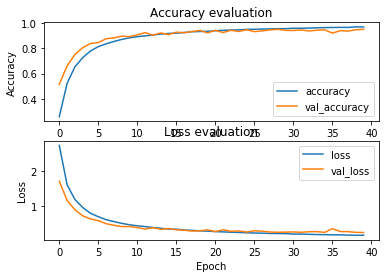

Train on 16089 samples, validate on 1788 samples
Epoch 1/40
12064/16089 [=====================>........] - ETA: 15s - loss: 0.2906 - accuracy: 0.906 - ETA: 15s - loss: 0.2294 - accuracy: 0.937 - ETA: 15s - loss: 0.1842 - accuracy: 0.956 - ETA: 15s - loss: 0.1658 - accuracy: 0.964 - ETA: 15s - loss: 0.1479 - accuracy: 0.972 - ETA: 14s - loss: 0.1611 - accuracy: 0.963 - ETA: 14s - loss: 0.1700 - accuracy: 0.961 - ETA: 14s - loss: 0.1722 - accuracy: 0.962 - ETA: 14s - loss: 0.1677 - accuracy: 0.963 - ETA: 14s - loss: 0.1622 - accuracy: 0.967 - ETA: 14s - loss: 0.1625 - accuracy: 0.967 - ETA: 14s - loss: 0.1575 - accuracy: 0.968 - ETA: 14s - loss: 0.1594 - accuracy: 0.968 - ETA: 14s - loss: 0.1587 - accuracy: 0.968 - ETA: 14s - loss: 0.1660 - accuracy: 0.966 - ETA: 14s - loss: 0.1611 - accuracy: 0.968 - ETA: 14s - loss: 0.1575 - accuracy: 0.970 - ETA: 14s - loss: 0.1575 - accuracy: 0.970 - ETA: 14s - loss: 0.1576 - accuracy: 0.970 - ETA: 14s - loss: 0.1587 - accuracy: 0.970 - ETA: 13s - lo

12128/16089 [=====================>........] - ETA: 14s - loss: 0.2458 - accuracy: 0.937 - ETA: 14s - loss: 0.2121 - accuracy: 0.958 - ETA: 15s - loss: 0.1914 - accuracy: 0.962 - ETA: 15s - loss: 0.1866 - accuracy: 0.959 - ETA: 14s - loss: 0.1711 - accuracy: 0.965 - ETA: 14s - loss: 0.1598 - accuracy: 0.968 - ETA: 14s - loss: 0.1593 - accuracy: 0.968 - ETA: 14s - loss: 0.1542 - accuracy: 0.970 - ETA: 14s - loss: 0.1547 - accuracy: 0.970 - ETA: 14s - loss: 0.1522 - accuracy: 0.972 - ETA: 14s - loss: 0.1596 - accuracy: 0.967 - ETA: 14s - loss: 0.1558 - accuracy: 0.968 - ETA: 14s - loss: 0.1550 - accuracy: 0.968 - ETA: 14s - loss: 0.1535 - accuracy: 0.968 - ETA: 14s - loss: 0.1500 - accuracy: 0.970 - ETA: 14s - loss: 0.1507 - accuracy: 0.968 - ETA: 14s - loss: 0.1507 - accuracy: 0.968 - ETA: 14s - loss: 0.1509 - accuracy: 0.967 - ETA: 13s - loss: 0.1514 - accuracy: 0.967 - ETA: 13s - loss: 0.1554 - accuracy: 0.967 - ETA: 13s - loss: 0.1556 - accuracy: 0.968 - ETA: 13s - loss: 0.1547 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1571 - accuracy: 0.97 - ETA: 3s - loss: 0.1570 - accuracy: 0.97 - ETA: 3s - loss: 0.1567 - accuracy: 0.97 - ETA: 3s - loss: 0.1569 - accuracy: 0.97 - ETA: 3s - loss: 0.1567 - accuracy: 0.97 - ETA: 3s - loss: 0.1566 - accuracy: 0.97 - ETA: 3s - loss: 0.1576 - accuracy: 0.97 - ETA: 3s - loss: 0.1574 - accuracy: 0.97 - ETA: 3s - loss: 0.1577 - accuracy: 0.97 - ETA: 3s - loss: 0.1577 - accuracy: 0.97 - ETA: 3s - loss: 0.1578 - accuracy: 0.97 - ETA: 2s - loss: 0.1577 - accuracy: 0.97 - ETA: 2s - loss: 0.1574 - accuracy: 0.97 - ETA: 2s - loss: 0.1570 - accuracy: 0.97 - ETA: 2s - loss: 0.1568 - accuracy: 0.97 - ETA: 2s - loss: 0.1575 - accuracy: 0.97 - ETA: 2s - loss: 0.1573 - accuracy: 0.97 - ETA: 2s - loss: 0.1575 - accuracy: 0.97 - ETA: 2s - loss: 0.1573 - accuracy: 0.97 - ETA: 2s - loss: 0.1579 - accuracy: 0.97 - ETA: 2s - loss: 0.1578 - accuracy: 0.97 - ETA: 2s - loss: 0.1581 - accuracy: 0.97 - ETA: 2s - loss: 0.1581 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.1551 - accuracy: 0.937 - ETA: 15s - loss: 0.1433 - accuracy: 0.968 - ETA: 15s - loss: 0.1604 - accuracy: 0.968 - ETA: 15s - loss: 0.1584 - accuracy: 0.968 - ETA: 15s - loss: 0.1480 - accuracy: 0.972 - ETA: 15s - loss: 0.1509 - accuracy: 0.971 - ETA: 15s - loss: 0.1413 - accuracy: 0.976 - ETA: 15s - loss: 0.1448 - accuracy: 0.972 - ETA: 15s - loss: 0.1489 - accuracy: 0.972 - ETA: 15s - loss: 0.1445 - accuracy: 0.973 - ETA: 15s - loss: 0.1453 - accuracy: 0.973 - ETA: 15s - loss: 0.1516 - accuracy: 0.971 - ETA: 15s - loss: 0.1494 - accuracy: 0.973 - ETA: 14s - loss: 0.1459 - accuracy: 0.974 - ETA: 14s - loss: 0.1456 - accuracy: 0.975 - ETA: 14s - loss: 0.1536 - accuracy: 0.971 - ETA: 14s - loss: 0.1527 - accuracy: 0.971 - ETA: 14s - loss: 0.1579 - accuracy: 0.968 - ETA: 14s - loss: 0.1618 - accuracy: 0.967 - ETA: 14s - loss: 0.1584 - accuracy: 0.969 - ETA: 14s - loss: 0.1566 - accuracy: 0.970 - ETA: 14s - loss: 0.1568 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1537 - accuracy: 0.97 - ETA: 3s - loss: 0.1538 - accuracy: 0.97 - ETA: 3s - loss: 0.1535 - accuracy: 0.97 - ETA: 3s - loss: 0.1531 - accuracy: 0.97 - ETA: 3s - loss: 0.1531 - accuracy: 0.97 - ETA: 3s - loss: 0.1529 - accuracy: 0.97 - ETA: 3s - loss: 0.1530 - accuracy: 0.97 - ETA: 3s - loss: 0.1529 - accuracy: 0.97 - ETA: 3s - loss: 0.1529 - accuracy: 0.97 - ETA: 3s - loss: 0.1533 - accuracy: 0.97 - ETA: 3s - loss: 0.1537 - accuracy: 0.97 - ETA: 3s - loss: 0.1537 - accuracy: 0.97 - ETA: 2s - loss: 0.1538 - accuracy: 0.97 - ETA: 2s - loss: 0.1536 - accuracy: 0.97 - ETA: 2s - loss: 0.1540 - accuracy: 0.97 - ETA: 2s - loss: 0.1541 - accuracy: 0.97 - ETA: 2s - loss: 0.1539 - accuracy: 0.97 - ETA: 2s - loss: 0.1540 - accuracy: 0.97 - ETA: 2s - loss: 0.1541 - accuracy: 0.97 - ETA: 2s - loss: 0.1545 - accuracy: 0.97 - ETA: 2s - loss: 0.1543 - accuracy: 0.97 - ETA: 2s - loss: 0.1541 - accuracy: 0.97 - ETA: 2s - loss: 0.1539 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.1649 - accuracy: 0.968 - ETA: 14s - loss: 0.1592 - accuracy: 0.968 - ETA: 14s - loss: 0.1642 - accuracy: 0.975 - ETA: 14s - loss: 0.1816 - accuracy: 0.973 - ETA: 14s - loss: 0.1766 - accuracy: 0.968 - ETA: 14s - loss: 0.1794 - accuracy: 0.963 - ETA: 14s - loss: 0.1758 - accuracy: 0.963 - ETA: 14s - loss: 0.1673 - accuracy: 0.966 - ETA: 14s - loss: 0.1571 - accuracy: 0.970 - ETA: 14s - loss: 0.1522 - accuracy: 0.973 - ETA: 14s - loss: 0.1586 - accuracy: 0.971 - ETA: 14s - loss: 0.1620 - accuracy: 0.971 - ETA: 14s - loss: 0.1588 - accuracy: 0.973 - ETA: 14s - loss: 0.1530 - accuracy: 0.975 - ETA: 14s - loss: 0.1505 - accuracy: 0.976 - ETA: 14s - loss: 0.1462 - accuracy: 0.977 - ETA: 14s - loss: 0.1513 - accuracy: 0.976 - ETA: 14s - loss: 0.1493 - accuracy: 0.977 - ETA: 14s - loss: 0.1518 - accuracy: 0.977 - ETA: 14s - loss: 0.1491 - accuracy: 0.978 - ETA: 14s - loss: 0.1525 - accuracy: 0.977 - ETA: 14s - loss: 0.1498 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1431 - accuracy: 0.97 - ETA: 3s - loss: 0.1435 - accuracy: 0.97 - ETA: 3s - loss: 0.1437 - accuracy: 0.97 - ETA: 3s - loss: 0.1434 - accuracy: 0.97 - ETA: 3s - loss: 0.1437 - accuracy: 0.97 - ETA: 3s - loss: 0.1437 - accuracy: 0.97 - ETA: 3s - loss: 0.1437 - accuracy: 0.97 - ETA: 3s - loss: 0.1437 - accuracy: 0.97 - ETA: 3s - loss: 0.1433 - accuracy: 0.97 - ETA: 3s - loss: 0.1436 - accuracy: 0.97 - ETA: 3s - loss: 0.1442 - accuracy: 0.97 - ETA: 3s - loss: 0.1440 - accuracy: 0.97 - ETA: 2s - loss: 0.1438 - accuracy: 0.97 - ETA: 2s - loss: 0.1436 - accuracy: 0.97 - ETA: 2s - loss: 0.1435 - accuracy: 0.97 - ETA: 2s - loss: 0.1435 - accuracy: 0.97 - ETA: 2s - loss: 0.1432 - accuracy: 0.97 - ETA: 2s - loss: 0.1429 - accuracy: 0.97 - ETA: 2s - loss: 0.1429 - accuracy: 0.97 - ETA: 2s - loss: 0.1434 - accuracy: 0.97 - ETA: 2s - loss: 0.1433 - accuracy: 0.97 - ETA: 2s - loss: 0.1431 - accuracy: 0.97 - ETA: 2s - loss: 0.1433 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0946 - accuracy: 1.000 - ETA: 14s - loss: 0.1347 - accuracy: 0.968 - ETA: 14s - loss: 0.1697 - accuracy: 0.968 - ETA: 14s - loss: 0.1704 - accuracy: 0.964 - ETA: 14s - loss: 0.1582 - accuracy: 0.968 - ETA: 14s - loss: 0.1541 - accuracy: 0.971 - ETA: 14s - loss: 0.1636 - accuracy: 0.966 - ETA: 14s - loss: 0.1565 - accuracy: 0.968 - ETA: 14s - loss: 0.1586 - accuracy: 0.966 - ETA: 14s - loss: 0.1536 - accuracy: 0.968 - ETA: 14s - loss: 0.1538 - accuracy: 0.968 - ETA: 14s - loss: 0.1488 - accuracy: 0.971 - ETA: 14s - loss: 0.1449 - accuracy: 0.973 - ETA: 14s - loss: 0.1456 - accuracy: 0.974 - ETA: 14s - loss: 0.1425 - accuracy: 0.976 - ETA: 14s - loss: 0.1481 - accuracy: 0.973 - ETA: 14s - loss: 0.1503 - accuracy: 0.971 - ETA: 14s - loss: 0.1487 - accuracy: 0.972 - ETA: 14s - loss: 0.1471 - accuracy: 0.973 - ETA: 13s - loss: 0.1449 - accuracy: 0.974 - ETA: 13s - loss: 0.1470 - accuracy: 0.972 - ETA: 13s - loss: 0.1483 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1389 - accuracy: 0.97 - ETA: 3s - loss: 0.1391 - accuracy: 0.97 - ETA: 3s - loss: 0.1395 - accuracy: 0.97 - ETA: 3s - loss: 0.1394 - accuracy: 0.97 - ETA: 3s - loss: 0.1397 - accuracy: 0.97 - ETA: 3s - loss: 0.1401 - accuracy: 0.97 - ETA: 3s - loss: 0.1400 - accuracy: 0.97 - ETA: 3s - loss: 0.1404 - accuracy: 0.97 - ETA: 3s - loss: 0.1402 - accuracy: 0.97 - ETA: 3s - loss: 0.1399 - accuracy: 0.97 - ETA: 3s - loss: 0.1400 - accuracy: 0.97 - ETA: 3s - loss: 0.1398 - accuracy: 0.97 - ETA: 3s - loss: 0.1398 - accuracy: 0.97 - ETA: 2s - loss: 0.1399 - accuracy: 0.97 - ETA: 2s - loss: 0.1402 - accuracy: 0.97 - ETA: 2s - loss: 0.1404 - accuracy: 0.97 - ETA: 2s - loss: 0.1402 - accuracy: 0.97 - ETA: 2s - loss: 0.1403 - accuracy: 0.97 - ETA: 2s - loss: 0.1408 - accuracy: 0.97 - ETA: 2s - loss: 0.1409 - accuracy: 0.97 - ETA: 2s - loss: 0.1407 - accuracy: 0.97 - ETA: 2s - loss: 0.1410 - accuracy: 0.97 - ETA: 2s - loss: 0.1409 - accu

12128/16089 [=====================>........] - ETA: 16s - loss: 0.0850 - accuracy: 1.000 - ETA: 15s - loss: 0.0847 - accuracy: 1.000 - ETA: 14s - loss: 0.1043 - accuracy: 0.993 - ETA: 14s - loss: 0.1157 - accuracy: 0.986 - ETA: 14s - loss: 0.1128 - accuracy: 0.989 - ETA: 14s - loss: 0.1190 - accuracy: 0.988 - ETA: 14s - loss: 0.1276 - accuracy: 0.985 - ETA: 14s - loss: 0.1263 - accuracy: 0.983 - ETA: 14s - loss: 0.1304 - accuracy: 0.979 - ETA: 14s - loss: 0.1332 - accuracy: 0.975 - ETA: 14s - loss: 0.1424 - accuracy: 0.971 - ETA: 14s - loss: 0.1445 - accuracy: 0.972 - ETA: 14s - loss: 0.1474 - accuracy: 0.972 - ETA: 14s - loss: 0.1552 - accuracy: 0.972 - ETA: 14s - loss: 0.1510 - accuracy: 0.973 - ETA: 14s - loss: 0.1474 - accuracy: 0.974 - ETA: 14s - loss: 0.1435 - accuracy: 0.976 - ETA: 14s - loss: 0.1406 - accuracy: 0.976 - ETA: 14s - loss: 0.1412 - accuracy: 0.976 - ETA: 13s - loss: 0.1419 - accuracy: 0.975 - ETA: 13s - loss: 0.1433 - accuracy: 0.974 - ETA: 13s - loss: 0.1424 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1395 - accuracy: 0.97 - ETA: 3s - loss: 0.1397 - accuracy: 0.97 - ETA: 3s - loss: 0.1395 - accuracy: 0.97 - ETA: 3s - loss: 0.1393 - accuracy: 0.97 - ETA: 3s - loss: 0.1391 - accuracy: 0.97 - ETA: 3s - loss: 0.1389 - accuracy: 0.97 - ETA: 3s - loss: 0.1392 - accuracy: 0.97 - ETA: 3s - loss: 0.1392 - accuracy: 0.97 - ETA: 3s - loss: 0.1394 - accuracy: 0.97 - ETA: 3s - loss: 0.1392 - accuracy: 0.97 - ETA: 3s - loss: 0.1392 - accuracy: 0.97 - ETA: 3s - loss: 0.1397 - accuracy: 0.97 - ETA: 2s - loss: 0.1399 - accuracy: 0.97 - ETA: 2s - loss: 0.1402 - accuracy: 0.97 - ETA: 2s - loss: 0.1400 - accuracy: 0.97 - ETA: 2s - loss: 0.1400 - accuracy: 0.97 - ETA: 2s - loss: 0.1400 - accuracy: 0.97 - ETA: 2s - loss: 0.1399 - accuracy: 0.97 - ETA: 2s - loss: 0.1400 - accuracy: 0.97 - ETA: 2s - loss: 0.1399 - accuracy: 0.97 - ETA: 2s - loss: 0.1402 - accuracy: 0.97 - ETA: 2s - loss: 0.1405 - accuracy: 0.97 - ETA: 2s - loss: 0.1414 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.1247 - accuracy: 0.968 - ETA: 15s - loss: 0.1162 - accuracy: 0.979 - ETA: 14s - loss: 0.1408 - accuracy: 0.975 - ETA: 14s - loss: 0.1601 - accuracy: 0.973 - ETA: 14s - loss: 0.1463 - accuracy: 0.979 - ETA: 14s - loss: 0.1500 - accuracy: 0.977 - ETA: 14s - loss: 0.1525 - accuracy: 0.978 - ETA: 14s - loss: 0.1602 - accuracy: 0.975 - ETA: 14s - loss: 0.1625 - accuracy: 0.970 - ETA: 14s - loss: 0.1581 - accuracy: 0.970 - ETA: 14s - loss: 0.1558 - accuracy: 0.971 - ETA: 14s - loss: 0.1557 - accuracy: 0.971 - ETA: 14s - loss: 0.1534 - accuracy: 0.971 - ETA: 14s - loss: 0.1559 - accuracy: 0.968 - ETA: 14s - loss: 0.1501 - accuracy: 0.970 - ETA: 14s - loss: 0.1500 - accuracy: 0.969 - ETA: 14s - loss: 0.1466 - accuracy: 0.971 - ETA: 13s - loss: 0.1469 - accuracy: 0.972 - ETA: 13s - loss: 0.1435 - accuracy: 0.973 - ETA: 13s - loss: 0.1430 - accuracy: 0.973 - ETA: 13s - loss: 0.1409 - accuracy: 0.974 - ETA: 13s - loss: 0.1390 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1353 - accuracy: 0.97 - ETA: 3s - loss: 0.1350 - accuracy: 0.97 - ETA: 3s - loss: 0.1351 - accuracy: 0.97 - ETA: 3s - loss: 0.1349 - accuracy: 0.97 - ETA: 3s - loss: 0.1349 - accuracy: 0.97 - ETA: 3s - loss: 0.1346 - accuracy: 0.97 - ETA: 3s - loss: 0.1352 - accuracy: 0.97 - ETA: 3s - loss: 0.1349 - accuracy: 0.97 - ETA: 3s - loss: 0.1348 - accuracy: 0.97 - ETA: 3s - loss: 0.1346 - accuracy: 0.97 - ETA: 3s - loss: 0.1356 - accuracy: 0.97 - ETA: 3s - loss: 0.1353 - accuracy: 0.97 - ETA: 2s - loss: 0.1352 - accuracy: 0.97 - ETA: 2s - loss: 0.1357 - accuracy: 0.97 - ETA: 2s - loss: 0.1357 - accuracy: 0.97 - ETA: 2s - loss: 0.1359 - accuracy: 0.97 - ETA: 2s - loss: 0.1358 - accuracy: 0.97 - ETA: 2s - loss: 0.1358 - accuracy: 0.97 - ETA: 2s - loss: 0.1357 - accuracy: 0.97 - ETA: 2s - loss: 0.1361 - accuracy: 0.97 - ETA: 2s - loss: 0.1359 - accuracy: 0.97 - ETA: 2s - loss: 0.1363 - accuracy: 0.97 - ETA: 2s - loss: 0.1361 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0972 - accuracy: 1.000 - ETA: 15s - loss: 0.1275 - accuracy: 0.968 - ETA: 15s - loss: 0.1116 - accuracy: 0.981 - ETA: 15s - loss: 0.0999 - accuracy: 0.986 - ETA: 15s - loss: 0.1062 - accuracy: 0.986 - ETA: 15s - loss: 0.1039 - accuracy: 0.988 - ETA: 14s - loss: 0.1063 - accuracy: 0.988 - ETA: 14s - loss: 0.1019 - accuracy: 0.989 - ETA: 14s - loss: 0.1047 - accuracy: 0.989 - ETA: 14s - loss: 0.1039 - accuracy: 0.990 - ETA: 14s - loss: 0.1087 - accuracy: 0.988 - ETA: 14s - loss: 0.1078 - accuracy: 0.987 - ETA: 14s - loss: 0.1087 - accuracy: 0.986 - ETA: 14s - loss: 0.1118 - accuracy: 0.983 - ETA: 14s - loss: 0.1142 - accuracy: 0.982 - ETA: 14s - loss: 0.1175 - accuracy: 0.981 - ETA: 14s - loss: 0.1204 - accuracy: 0.981 - ETA: 14s - loss: 0.1217 - accuracy: 0.979 - ETA: 14s - loss: 0.1222 - accuracy: 0.978 - ETA: 14s - loss: 0.1231 - accuracy: 0.979 - ETA: 14s - loss: 0.1213 - accuracy: 0.979 - ETA: 14s - loss: 0.1196 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1283 - accuracy: 0.97 - ETA: 3s - loss: 0.1281 - accuracy: 0.97 - ETA: 3s - loss: 0.1280 - accuracy: 0.97 - ETA: 3s - loss: 0.1284 - accuracy: 0.97 - ETA: 3s - loss: 0.1285 - accuracy: 0.97 - ETA: 3s - loss: 0.1283 - accuracy: 0.97 - ETA: 3s - loss: 0.1281 - accuracy: 0.97 - ETA: 3s - loss: 0.1286 - accuracy: 0.97 - ETA: 3s - loss: 0.1284 - accuracy: 0.97 - ETA: 3s - loss: 0.1284 - accuracy: 0.97 - ETA: 3s - loss: 0.1285 - accuracy: 0.97 - ETA: 3s - loss: 0.1284 - accuracy: 0.97 - ETA: 2s - loss: 0.1288 - accuracy: 0.97 - ETA: 2s - loss: 0.1292 - accuracy: 0.97 - ETA: 2s - loss: 0.1291 - accuracy: 0.97 - ETA: 2s - loss: 0.1295 - accuracy: 0.97 - ETA: 2s - loss: 0.1295 - accuracy: 0.97 - ETA: 2s - loss: 0.1293 - accuracy: 0.97 - ETA: 2s - loss: 0.1292 - accuracy: 0.97 - ETA: 2s - loss: 0.1291 - accuracy: 0.97 - ETA: 2s - loss: 0.1293 - accuracy: 0.97 - ETA: 2s - loss: 0.1296 - accuracy: 0.97 - ETA: 2s - loss: 0.1296 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0712 - accuracy: 1.000 - ETA: 15s - loss: 0.1538 - accuracy: 0.958 - ETA: 14s - loss: 0.1312 - accuracy: 0.968 - ETA: 14s - loss: 0.1808 - accuracy: 0.964 - ETA: 14s - loss: 0.1733 - accuracy: 0.961 - ETA: 14s - loss: 0.1559 - accuracy: 0.968 - ETA: 14s - loss: 0.1543 - accuracy: 0.968 - ETA: 14s - loss: 0.1511 - accuracy: 0.968 - ETA: 14s - loss: 0.1426 - accuracy: 0.972 - ETA: 14s - loss: 0.1404 - accuracy: 0.973 - ETA: 14s - loss: 0.1422 - accuracy: 0.971 - ETA: 14s - loss: 0.1404 - accuracy: 0.971 - ETA: 14s - loss: 0.1353 - accuracy: 0.973 - ETA: 14s - loss: 0.1388 - accuracy: 0.972 - ETA: 14s - loss: 0.1348 - accuracy: 0.974 - ETA: 14s - loss: 0.1353 - accuracy: 0.974 - ETA: 14s - loss: 0.1358 - accuracy: 0.974 - ETA: 14s - loss: 0.1335 - accuracy: 0.975 - ETA: 13s - loss: 0.1309 - accuracy: 0.976 - ETA: 13s - loss: 0.1299 - accuracy: 0.976 - ETA: 13s - loss: 0.1277 - accuracy: 0.977 - ETA: 13s - loss: 0.1258 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1244 - accuracy: 0.98 - ETA: 3s - loss: 0.1243 - accuracy: 0.98 - ETA: 3s - loss: 0.1246 - accuracy: 0.98 - ETA: 3s - loss: 0.1244 - accuracy: 0.98 - ETA: 3s - loss: 0.1242 - accuracy: 0.98 - ETA: 3s - loss: 0.1245 - accuracy: 0.98 - ETA: 3s - loss: 0.1244 - accuracy: 0.98 - ETA: 3s - loss: 0.1243 - accuracy: 0.98 - ETA: 3s - loss: 0.1243 - accuracy: 0.98 - ETA: 3s - loss: 0.1244 - accuracy: 0.98 - ETA: 3s - loss: 0.1245 - accuracy: 0.98 - ETA: 3s - loss: 0.1247 - accuracy: 0.98 - ETA: 2s - loss: 0.1245 - accuracy: 0.98 - ETA: 2s - loss: 0.1246 - accuracy: 0.98 - ETA: 2s - loss: 0.1243 - accuracy: 0.98 - ETA: 2s - loss: 0.1245 - accuracy: 0.98 - ETA: 2s - loss: 0.1244 - accuracy: 0.98 - ETA: 2s - loss: 0.1242 - accuracy: 0.98 - ETA: 2s - loss: 0.1242 - accuracy: 0.98 - ETA: 2s - loss: 0.1240 - accuracy: 0.98 - ETA: 2s - loss: 0.1239 - accuracy: 0.98 - ETA: 2s - loss: 0.1239 - accuracy: 0.98 - ETA: 2s - loss: 0.1238 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0693 - accuracy: 1.000 - ETA: 15s - loss: 0.0764 - accuracy: 1.000 - ETA: 15s - loss: 0.0813 - accuracy: 1.000 - ETA: 15s - loss: 0.1009 - accuracy: 0.991 - ETA: 15s - loss: 0.1128 - accuracy: 0.986 - ETA: 15s - loss: 0.1058 - accuracy: 0.988 - ETA: 14s - loss: 0.1008 - accuracy: 0.990 - ETA: 14s - loss: 0.0993 - accuracy: 0.989 - ETA: 14s - loss: 0.0981 - accuracy: 0.989 - ETA: 14s - loss: 0.0967 - accuracy: 0.988 - ETA: 14s - loss: 0.1008 - accuracy: 0.986 - ETA: 14s - loss: 0.1026 - accuracy: 0.985 - ETA: 14s - loss: 0.1062 - accuracy: 0.982 - ETA: 14s - loss: 0.1137 - accuracy: 0.978 - ETA: 14s - loss: 0.1128 - accuracy: 0.979 - ETA: 14s - loss: 0.1119 - accuracy: 0.980 - ETA: 14s - loss: 0.1100 - accuracy: 0.982 - ETA: 14s - loss: 0.1139 - accuracy: 0.982 - ETA: 14s - loss: 0.1115 - accuracy: 0.983 - ETA: 14s - loss: 0.1126 - accuracy: 0.982 - ETA: 14s - loss: 0.1141 - accuracy: 0.981 - ETA: 14s - loss: 0.1124 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1215 - accuracy: 0.97 - ETA: 3s - loss: 0.1214 - accuracy: 0.97 - ETA: 3s - loss: 0.1215 - accuracy: 0.97 - ETA: 3s - loss: 0.1215 - accuracy: 0.97 - ETA: 3s - loss: 0.1212 - accuracy: 0.97 - ETA: 3s - loss: 0.1211 - accuracy: 0.97 - ETA: 3s - loss: 0.1214 - accuracy: 0.98 - ETA: 3s - loss: 0.1214 - accuracy: 0.97 - ETA: 3s - loss: 0.1215 - accuracy: 0.97 - ETA: 3s - loss: 0.1215 - accuracy: 0.97 - ETA: 3s - loss: 0.1214 - accuracy: 0.97 - ETA: 3s - loss: 0.1216 - accuracy: 0.97 - ETA: 2s - loss: 0.1215 - accuracy: 0.97 - ETA: 2s - loss: 0.1216 - accuracy: 0.97 - ETA: 2s - loss: 0.1218 - accuracy: 0.97 - ETA: 2s - loss: 0.1215 - accuracy: 0.97 - ETA: 2s - loss: 0.1214 - accuracy: 0.97 - ETA: 2s - loss: 0.1221 - accuracy: 0.97 - ETA: 2s - loss: 0.1225 - accuracy: 0.97 - ETA: 2s - loss: 0.1224 - accuracy: 0.97 - ETA: 2s - loss: 0.1226 - accuracy: 0.97 - ETA: 2s - loss: 0.1227 - accuracy: 0.97 - ETA: 2s - loss: 0.1238 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.0611 - accuracy: 1.000 - ETA: 14s - loss: 0.0842 - accuracy: 0.989 - ETA: 14s - loss: 0.0777 - accuracy: 0.993 - ETA: 14s - loss: 0.0894 - accuracy: 0.995 - ETA: 14s - loss: 0.1084 - accuracy: 0.986 - ETA: 14s - loss: 0.1086 - accuracy: 0.985 - ETA: 14s - loss: 0.1109 - accuracy: 0.985 - ETA: 14s - loss: 0.1143 - accuracy: 0.983 - ETA: 14s - loss: 0.1108 - accuracy: 0.985 - ETA: 14s - loss: 0.1133 - accuracy: 0.983 - ETA: 14s - loss: 0.1177 - accuracy: 0.982 - ETA: 14s - loss: 0.1172 - accuracy: 0.982 - ETA: 14s - loss: 0.1183 - accuracy: 0.982 - ETA: 14s - loss: 0.1184 - accuracy: 0.981 - ETA: 14s - loss: 0.1201 - accuracy: 0.981 - ETA: 14s - loss: 0.1262 - accuracy: 0.978 - ETA: 14s - loss: 0.1238 - accuracy: 0.980 - ETA: 13s - loss: 0.1222 - accuracy: 0.980 - ETA: 13s - loss: 0.1209 - accuracy: 0.981 - ETA: 13s - loss: 0.1200 - accuracy: 0.981 - ETA: 13s - loss: 0.1190 - accuracy: 0.981 - ETA: 13s - loss: 0.1201 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1184 - accuracy: 0.98 - ETA: 3s - loss: 0.1186 - accuracy: 0.98 - ETA: 3s - loss: 0.1184 - accuracy: 0.98 - ETA: 3s - loss: 0.1184 - accuracy: 0.98 - ETA: 3s - loss: 0.1182 - accuracy: 0.98 - ETA: 3s - loss: 0.1181 - accuracy: 0.98 - ETA: 3s - loss: 0.1183 - accuracy: 0.98 - ETA: 3s - loss: 0.1182 - accuracy: 0.98 - ETA: 3s - loss: 0.1180 - accuracy: 0.98 - ETA: 3s - loss: 0.1180 - accuracy: 0.98 - ETA: 3s - loss: 0.1180 - accuracy: 0.98 - ETA: 3s - loss: 0.1188 - accuracy: 0.98 - ETA: 2s - loss: 0.1186 - accuracy: 0.98 - ETA: 2s - loss: 0.1189 - accuracy: 0.98 - ETA: 2s - loss: 0.1190 - accuracy: 0.98 - ETA: 2s - loss: 0.1189 - accuracy: 0.98 - ETA: 2s - loss: 0.1187 - accuracy: 0.98 - ETA: 2s - loss: 0.1190 - accuracy: 0.98 - ETA: 2s - loss: 0.1188 - accuracy: 0.98 - ETA: 2s - loss: 0.1189 - accuracy: 0.98 - ETA: 2s - loss: 0.1187 - accuracy: 0.98 - ETA: 2s - loss: 0.1187 - accuracy: 0.98 - ETA: 2s - loss: 0.1185 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0865 - accuracy: 1.000 - ETA: 15s - loss: 0.1359 - accuracy: 0.979 - ETA: 14s - loss: 0.1444 - accuracy: 0.981 - ETA: 14s - loss: 0.1279 - accuracy: 0.986 - ETA: 14s - loss: 0.1212 - accuracy: 0.986 - ETA: 14s - loss: 0.1228 - accuracy: 0.985 - ETA: 14s - loss: 0.1242 - accuracy: 0.983 - ETA: 14s - loss: 0.1173 - accuracy: 0.985 - ETA: 14s - loss: 0.1173 - accuracy: 0.985 - ETA: 14s - loss: 0.1177 - accuracy: 0.983 - ETA: 14s - loss: 0.1224 - accuracy: 0.983 - ETA: 14s - loss: 0.1230 - accuracy: 0.981 - ETA: 14s - loss: 0.1193 - accuracy: 0.982 - ETA: 14s - loss: 0.1194 - accuracy: 0.981 - ETA: 14s - loss: 0.1224 - accuracy: 0.978 - ETA: 14s - loss: 0.1214 - accuracy: 0.978 - ETA: 14s - loss: 0.1196 - accuracy: 0.980 - ETA: 14s - loss: 0.1181 - accuracy: 0.981 - ETA: 14s - loss: 0.1175 - accuracy: 0.980 - ETA: 14s - loss: 0.1181 - accuracy: 0.980 - ETA: 13s - loss: 0.1168 - accuracy: 0.981 - ETA: 13s - loss: 0.1162 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1120 - accuracy: 0.98 - ETA: 3s - loss: 0.1121 - accuracy: 0.98 - ETA: 3s - loss: 0.1119 - accuracy: 0.98 - ETA: 3s - loss: 0.1118 - accuracy: 0.98 - ETA: 3s - loss: 0.1119 - accuracy: 0.98 - ETA: 3s - loss: 0.1123 - accuracy: 0.98 - ETA: 3s - loss: 0.1121 - accuracy: 0.98 - ETA: 3s - loss: 0.1121 - accuracy: 0.98 - ETA: 3s - loss: 0.1125 - accuracy: 0.98 - ETA: 3s - loss: 0.1123 - accuracy: 0.98 - ETA: 3s - loss: 0.1124 - accuracy: 0.98 - ETA: 3s - loss: 0.1122 - accuracy: 0.98 - ETA: 2s - loss: 0.1123 - accuracy: 0.98 - ETA: 2s - loss: 0.1121 - accuracy: 0.98 - ETA: 2s - loss: 0.1119 - accuracy: 0.98 - ETA: 2s - loss: 0.1120 - accuracy: 0.98 - ETA: 2s - loss: 0.1119 - accuracy: 0.98 - ETA: 2s - loss: 0.1119 - accuracy: 0.98 - ETA: 2s - loss: 0.1117 - accuracy: 0.98 - ETA: 2s - loss: 0.1117 - accuracy: 0.98 - ETA: 2s - loss: 0.1124 - accuracy: 0.98 - ETA: 2s - loss: 0.1126 - accuracy: 0.98 - ETA: 2s - loss: 0.1126 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.0976 - accuracy: 1.000 - ETA: 14s - loss: 0.1020 - accuracy: 0.989 - ETA: 14s - loss: 0.1076 - accuracy: 0.981 - ETA: 14s - loss: 0.0994 - accuracy: 0.986 - ETA: 14s - loss: 0.0990 - accuracy: 0.986 - ETA: 14s - loss: 0.1039 - accuracy: 0.985 - ETA: 14s - loss: 0.1094 - accuracy: 0.985 - ETA: 14s - loss: 0.1033 - accuracy: 0.987 - ETA: 14s - loss: 0.1091 - accuracy: 0.985 - ETA: 14s - loss: 0.1058 - accuracy: 0.986 - ETA: 14s - loss: 0.1040 - accuracy: 0.986 - ETA: 14s - loss: 0.1017 - accuracy: 0.986 - ETA: 14s - loss: 0.1041 - accuracy: 0.985 - ETA: 14s - loss: 0.1075 - accuracy: 0.983 - ETA: 14s - loss: 0.1101 - accuracy: 0.982 - ETA: 14s - loss: 0.1076 - accuracy: 0.983 - ETA: 14s - loss: 0.1071 - accuracy: 0.984 - ETA: 14s - loss: 0.1064 - accuracy: 0.984 - ETA: 14s - loss: 0.1068 - accuracy: 0.984 - ETA: 13s - loss: 0.1046 - accuracy: 0.984 - ETA: 13s - loss: 0.1028 - accuracy: 0.985 - ETA: 13s - loss: 0.1024 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1204 - accuracy: 0.98 - ETA: 3s - loss: 0.1201 - accuracy: 0.98 - ETA: 3s - loss: 0.1200 - accuracy: 0.98 - ETA: 3s - loss: 0.1204 - accuracy: 0.98 - ETA: 3s - loss: 0.1202 - accuracy: 0.98 - ETA: 3s - loss: 0.1200 - accuracy: 0.98 - ETA: 3s - loss: 0.1198 - accuracy: 0.98 - ETA: 3s - loss: 0.1197 - accuracy: 0.98 - ETA: 3s - loss: 0.1196 - accuracy: 0.98 - ETA: 3s - loss: 0.1195 - accuracy: 0.98 - ETA: 3s - loss: 0.1196 - accuracy: 0.98 - ETA: 3s - loss: 0.1194 - accuracy: 0.98 - ETA: 2s - loss: 0.1193 - accuracy: 0.98 - ETA: 2s - loss: 0.1191 - accuracy: 0.98 - ETA: 2s - loss: 0.1188 - accuracy: 0.98 - ETA: 2s - loss: 0.1187 - accuracy: 0.98 - ETA: 2s - loss: 0.1186 - accuracy: 0.98 - ETA: 2s - loss: 0.1185 - accuracy: 0.98 - ETA: 2s - loss: 0.1184 - accuracy: 0.98 - ETA: 2s - loss: 0.1183 - accuracy: 0.98 - ETA: 2s - loss: 0.1183 - accuracy: 0.98 - ETA: 2s - loss: 0.1180 - accuracy: 0.98 - ETA: 2s - loss: 0.1179 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0836 - accuracy: 1.000 - ETA: 14s - loss: 0.0987 - accuracy: 0.989 - ETA: 14s - loss: 0.0955 - accuracy: 0.987 - ETA: 14s - loss: 0.1103 - accuracy: 0.986 - ETA: 14s - loss: 0.1144 - accuracy: 0.982 - ETA: 14s - loss: 0.1132 - accuracy: 0.983 - ETA: 14s - loss: 0.1070 - accuracy: 0.985 - ETA: 14s - loss: 0.1059 - accuracy: 0.985 - ETA: 14s - loss: 0.1073 - accuracy: 0.985 - ETA: 14s - loss: 0.1080 - accuracy: 0.985 - ETA: 14s - loss: 0.1048 - accuracy: 0.986 - ETA: 14s - loss: 0.1104 - accuracy: 0.983 - ETA: 14s - loss: 0.1087 - accuracy: 0.985 - ETA: 14s - loss: 0.1075 - accuracy: 0.985 - ETA: 14s - loss: 0.1068 - accuracy: 0.984 - ETA: 14s - loss: 0.1047 - accuracy: 0.985 - ETA: 13s - loss: 0.1027 - accuracy: 0.986 - ETA: 13s - loss: 0.1066 - accuracy: 0.984 - ETA: 13s - loss: 0.1071 - accuracy: 0.984 - ETA: 13s - loss: 0.1063 - accuracy: 0.985 - ETA: 13s - loss: 0.1084 - accuracy: 0.984 - ETA: 13s - loss: 0.1088 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1146 - accuracy: 0.98 - ETA: 3s - loss: 0.1145 - accuracy: 0.98 - ETA: 3s - loss: 0.1145 - accuracy: 0.98 - ETA: 3s - loss: 0.1143 - accuracy: 0.98 - ETA: 3s - loss: 0.1141 - accuracy: 0.98 - ETA: 3s - loss: 0.1143 - accuracy: 0.98 - ETA: 3s - loss: 0.1142 - accuracy: 0.98 - ETA: 3s - loss: 0.1141 - accuracy: 0.98 - ETA: 3s - loss: 0.1141 - accuracy: 0.98 - ETA: 3s - loss: 0.1140 - accuracy: 0.98 - ETA: 3s - loss: 0.1139 - accuracy: 0.98 - ETA: 3s - loss: 0.1136 - accuracy: 0.98 - ETA: 2s - loss: 0.1140 - accuracy: 0.98 - ETA: 2s - loss: 0.1138 - accuracy: 0.98 - ETA: 2s - loss: 0.1136 - accuracy: 0.98 - ETA: 2s - loss: 0.1135 - accuracy: 0.98 - ETA: 2s - loss: 0.1133 - accuracy: 0.98 - ETA: 2s - loss: 0.1133 - accuracy: 0.98 - ETA: 2s - loss: 0.1131 - accuracy: 0.98 - ETA: 2s - loss: 0.1129 - accuracy: 0.98 - ETA: 2s - loss: 0.1127 - accuracy: 0.98 - ETA: 2s - loss: 0.1125 - accuracy: 0.98 - ETA: 2s - loss: 0.1123 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0644 - accuracy: 1.000 - ETA: 15s - loss: 0.1009 - accuracy: 0.989 - ETA: 15s - loss: 0.0855 - accuracy: 0.993 - ETA: 15s - loss: 0.0950 - accuracy: 0.991 - ETA: 15s - loss: 0.0892 - accuracy: 0.993 - ETA: 15s - loss: 0.0899 - accuracy: 0.988 - ETA: 15s - loss: 0.0865 - accuracy: 0.990 - ETA: 14s - loss: 0.0867 - accuracy: 0.989 - ETA: 14s - loss: 0.0904 - accuracy: 0.987 - ETA: 14s - loss: 0.0885 - accuracy: 0.988 - ETA: 14s - loss: 0.0990 - accuracy: 0.985 - ETA: 14s - loss: 0.1003 - accuracy: 0.985 - ETA: 14s - loss: 0.0988 - accuracy: 0.985 - ETA: 14s - loss: 0.0986 - accuracy: 0.986 - ETA: 14s - loss: 0.0972 - accuracy: 0.987 - ETA: 14s - loss: 0.0967 - accuracy: 0.986 - ETA: 14s - loss: 0.0958 - accuracy: 0.987 - ETA: 14s - loss: 0.0972 - accuracy: 0.987 - ETA: 14s - loss: 0.0967 - accuracy: 0.988 - ETA: 14s - loss: 0.0980 - accuracy: 0.987 - ETA: 14s - loss: 0.0970 - accuracy: 0.987 - ETA: 14s - loss: 0.0954 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1037 - accuracy: 0.98 - ETA: 3s - loss: 0.1035 - accuracy: 0.98 - ETA: 3s - loss: 0.1035 - accuracy: 0.98 - ETA: 3s - loss: 0.1034 - accuracy: 0.98 - ETA: 3s - loss: 0.1033 - accuracy: 0.98 - ETA: 3s - loss: 0.1032 - accuracy: 0.98 - ETA: 3s - loss: 0.1032 - accuracy: 0.98 - ETA: 3s - loss: 0.1034 - accuracy: 0.98 - ETA: 3s - loss: 0.1033 - accuracy: 0.98 - ETA: 3s - loss: 0.1033 - accuracy: 0.98 - ETA: 3s - loss: 0.1033 - accuracy: 0.98 - ETA: 3s - loss: 0.1032 - accuracy: 0.98 - ETA: 2s - loss: 0.1031 - accuracy: 0.98 - ETA: 2s - loss: 0.1029 - accuracy: 0.98 - ETA: 2s - loss: 0.1031 - accuracy: 0.98 - ETA: 2s - loss: 0.1030 - accuracy: 0.98 - ETA: 2s - loss: 0.1029 - accuracy: 0.98 - ETA: 2s - loss: 0.1028 - accuracy: 0.98 - ETA: 2s - loss: 0.1027 - accuracy: 0.98 - ETA: 2s - loss: 0.1027 - accuracy: 0.98 - ETA: 2s - loss: 0.1026 - accuracy: 0.98 - ETA: 2s - loss: 0.1026 - accuracy: 0.98 - ETA: 2s - loss: 0.1027 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0737 - accuracy: 1.000 - ETA: 15s - loss: 0.0727 - accuracy: 1.000 - ETA: 15s - loss: 0.0793 - accuracy: 0.993 - ETA: 15s - loss: 0.1005 - accuracy: 0.991 - ETA: 15s - loss: 0.1159 - accuracy: 0.982 - ETA: 15s - loss: 0.1122 - accuracy: 0.983 - ETA: 15s - loss: 0.1079 - accuracy: 0.985 - ETA: 14s - loss: 0.1025 - accuracy: 0.987 - ETA: 14s - loss: 0.1045 - accuracy: 0.985 - ETA: 14s - loss: 0.1012 - accuracy: 0.986 - ETA: 14s - loss: 0.1014 - accuracy: 0.986 - ETA: 14s - loss: 0.1090 - accuracy: 0.983 - ETA: 14s - loss: 0.1149 - accuracy: 0.981 - ETA: 14s - loss: 0.1125 - accuracy: 0.982 - ETA: 14s - loss: 0.1098 - accuracy: 0.983 - ETA: 14s - loss: 0.1072 - accuracy: 0.984 - ETA: 14s - loss: 0.1064 - accuracy: 0.985 - ETA: 14s - loss: 0.1049 - accuracy: 0.985 - ETA: 14s - loss: 0.1027 - accuracy: 0.986 - ETA: 14s - loss: 0.1058 - accuracy: 0.983 - ETA: 14s - loss: 0.1053 - accuracy: 0.983 - ETA: 14s - loss: 0.1041 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1083 - accuracy: 0.98 - ETA: 3s - loss: 0.1081 - accuracy: 0.98 - ETA: 3s - loss: 0.1081 - accuracy: 0.98 - ETA: 3s - loss: 0.1087 - accuracy: 0.98 - ETA: 3s - loss: 0.1085 - accuracy: 0.98 - ETA: 3s - loss: 0.1086 - accuracy: 0.98 - ETA: 3s - loss: 0.1086 - accuracy: 0.98 - ETA: 3s - loss: 0.1084 - accuracy: 0.98 - ETA: 3s - loss: 0.1085 - accuracy: 0.98 - ETA: 3s - loss: 0.1086 - accuracy: 0.98 - ETA: 3s - loss: 0.1084 - accuracy: 0.98 - ETA: 3s - loss: 0.1085 - accuracy: 0.98 - ETA: 3s - loss: 0.1086 - accuracy: 0.98 - ETA: 2s - loss: 0.1085 - accuracy: 0.98 - ETA: 2s - loss: 0.1084 - accuracy: 0.98 - ETA: 2s - loss: 0.1082 - accuracy: 0.98 - ETA: 2s - loss: 0.1084 - accuracy: 0.98 - ETA: 2s - loss: 0.1082 - accuracy: 0.98 - ETA: 2s - loss: 0.1080 - accuracy: 0.98 - ETA: 2s - loss: 0.1080 - accuracy: 0.98 - ETA: 2s - loss: 0.1079 - accuracy: 0.98 - ETA: 2s - loss: 0.1079 - accuracy: 0.98 - ETA: 2s - loss: 0.1077 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0840 - accuracy: 1.000 - ETA: 14s - loss: 0.0831 - accuracy: 1.000 - ETA: 15s - loss: 0.0776 - accuracy: 1.000 - ETA: 14s - loss: 0.0718 - accuracy: 1.000 - ETA: 14s - loss: 0.0713 - accuracy: 1.000 - ETA: 14s - loss: 0.0751 - accuracy: 0.997 - ETA: 14s - loss: 0.0858 - accuracy: 0.992 - ETA: 14s - loss: 0.0839 - accuracy: 0.993 - ETA: 14s - loss: 0.0902 - accuracy: 0.990 - ETA: 14s - loss: 0.0887 - accuracy: 0.991 - ETA: 14s - loss: 0.0966 - accuracy: 0.989 - ETA: 14s - loss: 0.1012 - accuracy: 0.986 - ETA: 14s - loss: 0.0989 - accuracy: 0.986 - ETA: 14s - loss: 0.0994 - accuracy: 0.986 - ETA: 14s - loss: 0.0996 - accuracy: 0.984 - ETA: 14s - loss: 0.1078 - accuracy: 0.983 - ETA: 14s - loss: 0.1076 - accuracy: 0.983 - ETA: 14s - loss: 0.1062 - accuracy: 0.984 - ETA: 14s - loss: 0.1046 - accuracy: 0.985 - ETA: 14s - loss: 0.1034 - accuracy: 0.986 - ETA: 14s - loss: 0.1017 - accuracy: 0.987 - ETA: 13s - loss: 0.1071 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1029 - accuracy: 0.98 - ETA: 3s - loss: 0.1027 - accuracy: 0.98 - ETA: 3s - loss: 0.1030 - accuracy: 0.98 - ETA: 3s - loss: 0.1034 - accuracy: 0.98 - ETA: 3s - loss: 0.1034 - accuracy: 0.98 - ETA: 3s - loss: 0.1032 - accuracy: 0.98 - ETA: 3s - loss: 0.1032 - accuracy: 0.98 - ETA: 3s - loss: 0.1032 - accuracy: 0.98 - ETA: 3s - loss: 0.1031 - accuracy: 0.98 - ETA: 3s - loss: 0.1030 - accuracy: 0.98 - ETA: 3s - loss: 0.1028 - accuracy: 0.98 - ETA: 3s - loss: 0.1026 - accuracy: 0.98 - ETA: 3s - loss: 0.1026 - accuracy: 0.98 - ETA: 2s - loss: 0.1024 - accuracy: 0.98 - ETA: 2s - loss: 0.1024 - accuracy: 0.98 - ETA: 2s - loss: 0.1023 - accuracy: 0.98 - ETA: 2s - loss: 0.1025 - accuracy: 0.98 - ETA: 2s - loss: 0.1024 - accuracy: 0.98 - ETA: 2s - loss: 0.1026 - accuracy: 0.98 - ETA: 2s - loss: 0.1025 - accuracy: 0.98 - ETA: 2s - loss: 0.1025 - accuracy: 0.98 - ETA: 2s - loss: 0.1026 - accuracy: 0.98 - ETA: 2s - loss: 0.1028 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.0685 - accuracy: 1.000 - ETA: 14s - loss: 0.0872 - accuracy: 0.989 - ETA: 14s - loss: 0.1037 - accuracy: 0.981 - ETA: 14s - loss: 0.1002 - accuracy: 0.982 - ETA: 14s - loss: 0.0995 - accuracy: 0.979 - ETA: 14s - loss: 0.0952 - accuracy: 0.983 - ETA: 14s - loss: 0.0956 - accuracy: 0.980 - ETA: 14s - loss: 0.0913 - accuracy: 0.983 - ETA: 14s - loss: 0.0882 - accuracy: 0.985 - ETA: 14s - loss: 0.0865 - accuracy: 0.986 - ETA: 14s - loss: 0.0869 - accuracy: 0.985 - ETA: 14s - loss: 0.0867 - accuracy: 0.985 - ETA: 14s - loss: 0.0883 - accuracy: 0.985 - ETA: 14s - loss: 0.0863 - accuracy: 0.986 - ETA: 14s - loss: 0.0876 - accuracy: 0.986 - ETA: 14s - loss: 0.0860 - accuracy: 0.986 - ETA: 14s - loss: 0.0865 - accuracy: 0.986 - ETA: 14s - loss: 0.0856 - accuracy: 0.987 - ETA: 13s - loss: 0.0885 - accuracy: 0.986 - ETA: 13s - loss: 0.0877 - accuracy: 0.987 - ETA: 13s - loss: 0.0884 - accuracy: 0.987 - ETA: 13s - loss: 0.0882 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1014 - accuracy: 0.98 - ETA: 3s - loss: 0.1011 - accuracy: 0.98 - ETA: 3s - loss: 0.1011 - accuracy: 0.98 - ETA: 3s - loss: 0.1010 - accuracy: 0.98 - ETA: 3s - loss: 0.1013 - accuracy: 0.98 - ETA: 3s - loss: 0.1012 - accuracy: 0.98 - ETA: 3s - loss: 0.1011 - accuracy: 0.98 - ETA: 3s - loss: 0.1011 - accuracy: 0.98 - ETA: 3s - loss: 0.1010 - accuracy: 0.98 - ETA: 3s - loss: 0.1009 - accuracy: 0.98 - ETA: 3s - loss: 0.1008 - accuracy: 0.98 - ETA: 3s - loss: 0.1010 - accuracy: 0.98 - ETA: 2s - loss: 0.1012 - accuracy: 0.98 - ETA: 2s - loss: 0.1011 - accuracy: 0.98 - ETA: 2s - loss: 0.1013 - accuracy: 0.98 - ETA: 2s - loss: 0.1015 - accuracy: 0.98 - ETA: 2s - loss: 0.1014 - accuracy: 0.98 - ETA: 2s - loss: 0.1016 - accuracy: 0.98 - ETA: 2s - loss: 0.1015 - accuracy: 0.98 - ETA: 2s - loss: 0.1016 - accuracy: 0.98 - ETA: 2s - loss: 0.1016 - accuracy: 0.98 - ETA: 2s - loss: 0.1014 - accuracy: 0.98 - ETA: 2s - loss: 0.1014 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0634 - accuracy: 1.000 - ETA: 14s - loss: 0.0741 - accuracy: 0.989 - ETA: 14s - loss: 0.1314 - accuracy: 0.975 - ETA: 14s - loss: 0.1383 - accuracy: 0.973 - ETA: 14s - loss: 0.1214 - accuracy: 0.979 - ETA: 14s - loss: 0.1100 - accuracy: 0.983 - ETA: 14s - loss: 0.1109 - accuracy: 0.983 - ETA: 14s - loss: 0.1173 - accuracy: 0.981 - ETA: 14s - loss: 0.1159 - accuracy: 0.981 - ETA: 14s - loss: 0.1117 - accuracy: 0.983 - ETA: 14s - loss: 0.1105 - accuracy: 0.983 - ETA: 14s - loss: 0.1109 - accuracy: 0.982 - ETA: 14s - loss: 0.1151 - accuracy: 0.980 - ETA: 14s - loss: 0.1157 - accuracy: 0.980 - ETA: 14s - loss: 0.1156 - accuracy: 0.979 - ETA: 14s - loss: 0.1123 - accuracy: 0.980 - ETA: 14s - loss: 0.1093 - accuracy: 0.982 - ETA: 14s - loss: 0.1079 - accuracy: 0.982 - ETA: 14s - loss: 0.1064 - accuracy: 0.983 - ETA: 14s - loss: 0.1072 - accuracy: 0.982 - ETA: 13s - loss: 0.1057 - accuracy: 0.983 - ETA: 13s - loss: 0.1043 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.1052 - accuracy: 0.98 - ETA: 3s - loss: 0.1053 - accuracy: 0.98 - ETA: 3s - loss: 0.1051 - accuracy: 0.98 - ETA: 3s - loss: 0.1051 - accuracy: 0.98 - ETA: 3s - loss: 0.1052 - accuracy: 0.98 - ETA: 3s - loss: 0.1050 - accuracy: 0.98 - ETA: 3s - loss: 0.1049 - accuracy: 0.98 - ETA: 3s - loss: 0.1047 - accuracy: 0.98 - ETA: 3s - loss: 0.1046 - accuracy: 0.98 - ETA: 3s - loss: 0.1047 - accuracy: 0.98 - ETA: 3s - loss: 0.1044 - accuracy: 0.98 - ETA: 3s - loss: 0.1043 - accuracy: 0.98 - ETA: 3s - loss: 0.1046 - accuracy: 0.98 - ETA: 2s - loss: 0.1045 - accuracy: 0.98 - ETA: 2s - loss: 0.1045 - accuracy: 0.98 - ETA: 2s - loss: 0.1043 - accuracy: 0.98 - ETA: 2s - loss: 0.1041 - accuracy: 0.98 - ETA: 2s - loss: 0.1042 - accuracy: 0.98 - ETA: 2s - loss: 0.1039 - accuracy: 0.98 - ETA: 2s - loss: 0.1038 - accuracy: 0.98 - ETA: 2s - loss: 0.1037 - accuracy: 0.98 - ETA: 2s - loss: 0.1041 - accuracy: 0.98 - ETA: 2s - loss: 0.1042 - accu

12128/16089 [=====================>........] - ETA: 14s - loss: 0.1153 - accuracy: 0.968 - ETA: 14s - loss: 0.1555 - accuracy: 0.968 - ETA: 14s - loss: 0.1231 - accuracy: 0.981 - ETA: 14s - loss: 0.1176 - accuracy: 0.982 - ETA: 14s - loss: 0.1128 - accuracy: 0.986 - ETA: 14s - loss: 0.1033 - accuracy: 0.988 - ETA: 15s - loss: 0.0980 - accuracy: 0.990 - ETA: 14s - loss: 0.0931 - accuracy: 0.991 - ETA: 14s - loss: 0.0972 - accuracy: 0.990 - ETA: 14s - loss: 0.0944 - accuracy: 0.991 - ETA: 14s - loss: 0.0935 - accuracy: 0.992 - ETA: 14s - loss: 0.0937 - accuracy: 0.991 - ETA: 14s - loss: 0.0919 - accuracy: 0.992 - ETA: 14s - loss: 0.0907 - accuracy: 0.991 - ETA: 14s - loss: 0.0948 - accuracy: 0.990 - ETA: 14s - loss: 0.0931 - accuracy: 0.990 - ETA: 14s - loss: 0.0934 - accuracy: 0.991 - ETA: 14s - loss: 0.0920 - accuracy: 0.992 - ETA: 14s - loss: 0.0955 - accuracy: 0.991 - ETA: 14s - loss: 0.0954 - accuracy: 0.991 - ETA: 14s - loss: 0.0946 - accuracy: 0.991 - ETA: 14s - loss: 0.0931 - acc

16089/16089 [==============================] - ETA: 3s - loss: 0.0983 - accuracy: 0.98 - ETA: 3s - loss: 0.0984 - accuracy: 0.98 - ETA: 3s - loss: 0.0982 - accuracy: 0.98 - ETA: 3s - loss: 0.0983 - accuracy: 0.98 - ETA: 3s - loss: 0.0981 - accuracy: 0.98 - ETA: 3s - loss: 0.0984 - accuracy: 0.98 - ETA: 3s - loss: 0.0984 - accuracy: 0.98 - ETA: 3s - loss: 0.0987 - accuracy: 0.98 - ETA: 3s - loss: 0.0989 - accuracy: 0.98 - ETA: 3s - loss: 0.0991 - accuracy: 0.98 - ETA: 3s - loss: 0.0992 - accuracy: 0.98 - ETA: 3s - loss: 0.0990 - accuracy: 0.98 - ETA: 3s - loss: 0.0997 - accuracy: 0.98 - ETA: 2s - loss: 0.0995 - accuracy: 0.98 - ETA: 2s - loss: 0.0993 - accuracy: 0.98 - ETA: 2s - loss: 0.0991 - accuracy: 0.98 - ETA: 2s - loss: 0.0990 - accuracy: 0.98 - ETA: 2s - loss: 0.0989 - accuracy: 0.98 - ETA: 2s - loss: 0.0987 - accuracy: 0.98 - ETA: 2s - loss: 0.0986 - accuracy: 0.98 - ETA: 2s - loss: 0.0990 - accuracy: 0.98 - ETA: 2s - loss: 0.0990 - accuracy: 0.98 - ETA: 2s - loss: 0.0988 - accu

12128/16089 [=====================>........] - ETA: 15s - loss: 0.0645 - accuracy: 1.000 - ETA: 14s - loss: 0.0840 - accuracy: 0.989 - ETA: 14s - loss: 0.0826 - accuracy: 0.993 - ETA: 14s - loss: 0.0810 - accuracy: 0.995 - ETA: 14s - loss: 0.0784 - accuracy: 0.996 - ETA: 14s - loss: 0.0864 - accuracy: 0.991 - ETA: 14s - loss: 0.0849 - accuracy: 0.992 - ETA: 14s - loss: 0.0864 - accuracy: 0.993 - ETA: 14s - loss: 0.0904 - accuracy: 0.990 - ETA: 14s - loss: 0.0875 - accuracy: 0.991 - ETA: 14s - loss: 0.0851 - accuracy: 0.992 - ETA: 14s - loss: 0.0831 - accuracy: 0.993 - ETA: 14s - loss: 0.0820 - accuracy: 0.993 - ETA: 14s - loss: 0.0824 - accuracy: 0.994 - ETA: 14s - loss: 0.0818 - accuracy: 0.994 - ETA: 14s - loss: 0.0845 - accuracy: 0.994 - ETA: 14s - loss: 0.0853 - accuracy: 0.993 - ETA: 14s - loss: 0.0864 - accuracy: 0.992 - ETA: 14s - loss: 0.0863 - accuracy: 0.992 - ETA: 14s - loss: 0.0852 - accuracy: 0.992 - ETA: 14s - loss: 0.0847 - accuracy: 0.993 - ETA: 14s - loss: 0.0838 - acc

1987/1987 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.90 - ETA: 0s - loss: 0.2267 - accuracy: 0.95 - ETA: 0s - loss: 0.2455 - accuracy: 0.94 - ETA: 0s - loss: 0.2776 - accuracy: 0.94 - 0s 87us/sample - loss: 0.2863 - accuracy: 0.9426
test error: 0.28626580334821117, test accuracy: 0.9426270723342896 


In [34]:
def main():
    
    #load the training and test data spilt
    X_train, X_validation, X_test, Y_train, Y_validation, Y_test = get_data_splits(DATA_PATH)
    
    
    # build CNN model
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    model = build_model(input_shape, learning_rate)
    
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, Y_train, X_validation, Y_validation)
    #plot_history(history)
    
    # train the model
    model.fit(X_train, Y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, 
              validation_data=(X_validation, Y_validation))
                                      
    #evaluate the model
    test_error, test_accuracy = model.evaluate(X_test, Y_test)
    print(f"test error: {test_error}, test accuracy: {test_accuracy} ")
    
    # save the model
    model.save(SAVED_MODEL_PATH)

if __name__ == "__main__":
    main()

# Voice Word Detection Service

### This system is used for detection of word given a particular voice word data.

In [21]:
SAVED_MODEL_PATH = "model.h5"
SAMPLES_TO_CONSIDER = 22050

In [22]:
class _Keyword_Spotting_Service:

    model = None
    _mapping = [
"speech_commands\\bed",
        "speech_commands\\bird",
        "speech_commands\\cat",
        "speech_commands\\dog",
        "speech_commands\\down",
        "speech_commands\\eight",
        "speech_commands\\five",
        "speech_commands\\four",
        "speech_commands\\go",
        "speech_commands\\happy",
        "speech_commands\\house"
    ]
    _instance = None


    def predict(self, file_path):
        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # create a  4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
  

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T









In [23]:
def Keyword_Spotting_Service():

    #  instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance

In [24]:
if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    kss = Keyword_Spotting_Service()
    kss1 = Keyword_Spotting_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert kss is kss1

    # make a prediction
    keyword1 = kss.predict("speech_commands/test/birds.wav")
    print(keyword1)
    keyword2 = kss.predict("speech_commands/test/bed.wav")
    print(keyword2)
    keyword3 = kss.predict("speech_commands/test/cat.wav")
    print(keyword3)
    keyword4 = kss.predict("speech_commands/test/five.wav")
    print(keyword4)
    keyword5 = kss.predict("speech_commands/test/go.wav")
    print(keyword5)
    #keyword6 = kss.predict("speech_commands/test/nine.wav")
    #print(keyword6)
    

speech_commands\bird
speech_commands\bed
speech_commands\cat
speech_commands\five
speech_commands\go
